## Import library

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from SelfCalibration_class import SelfCalibration
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from SelfCalibration_class import SelfCalibration
training_paths = ["kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
parameters_path = "SensorsParams.csv"
samples_length = 300

## Get sensor sunrise value

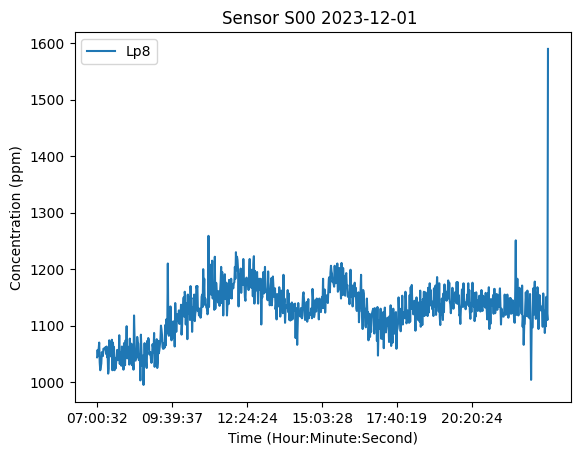

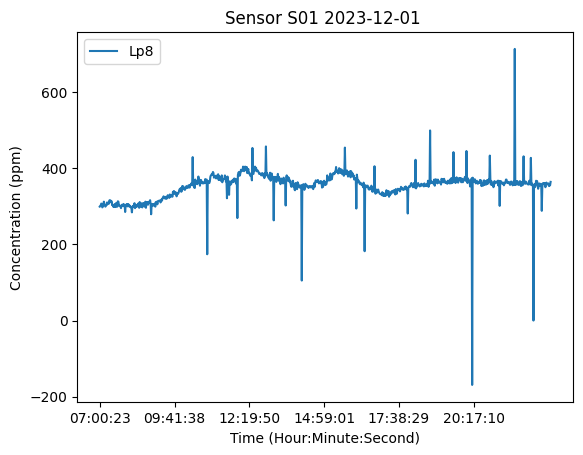

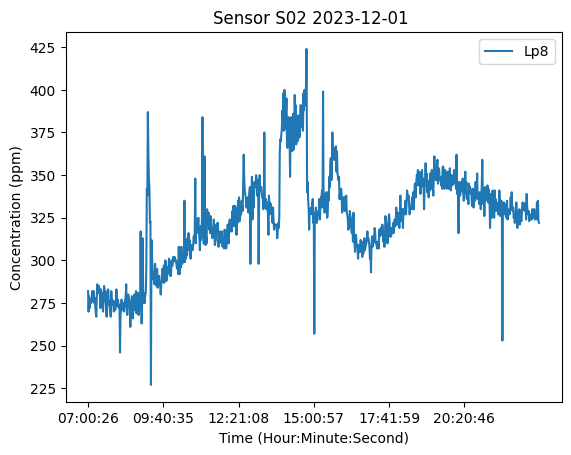

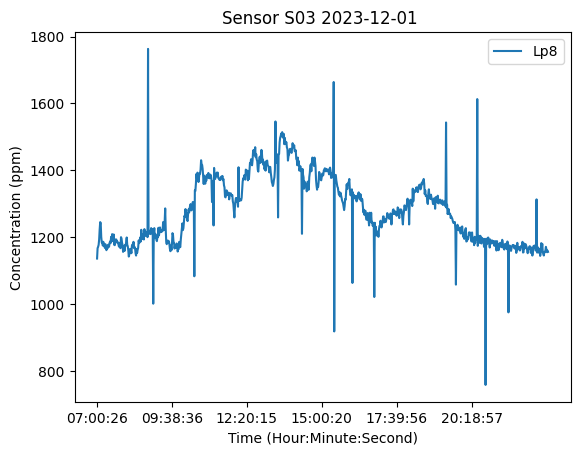

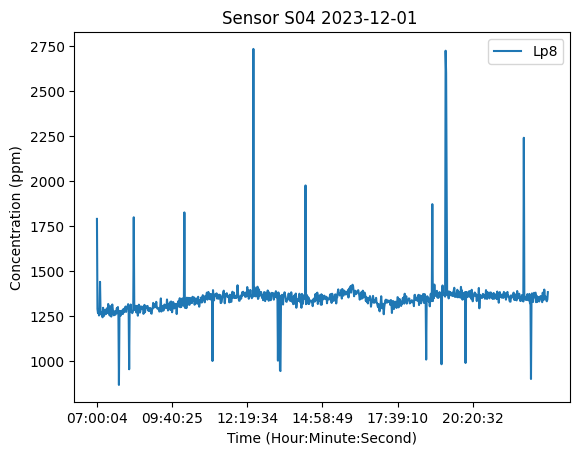

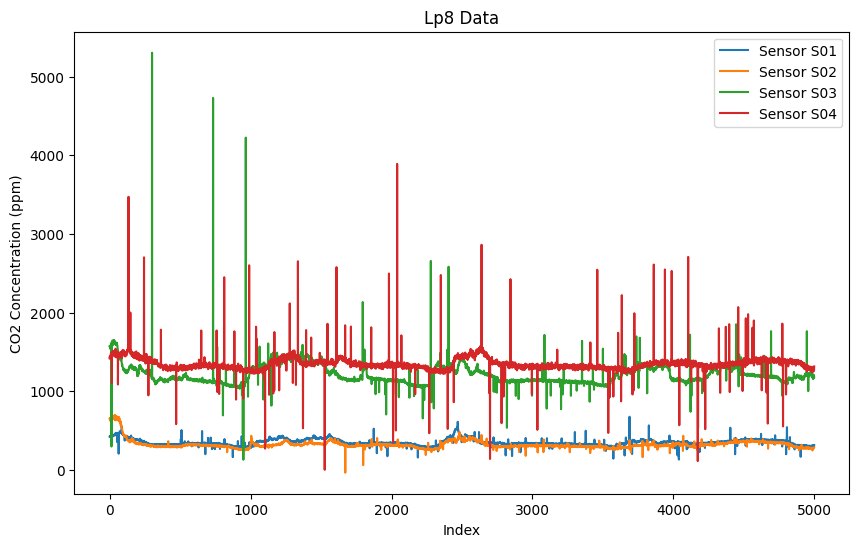

In [2]:
import matplotlib.animation as animation

training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
samples_length = 1000
lp8_vals = []

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0"+ str(i) +".csv").to_numpy()
    test_file = test_file_0[8000:]
    dates = (test_file[:,0])
    min_range_found = False
    for k, date in enumerate(dates):
        if min_range_found == False and date[11:13] == "07" and date[:10] == "2023-12-01":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-12-01":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
    
    lp8_co2_values = np.array([])
    N = test_file[:,10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    fig, ax = plt.subplots()
    for j in range(0, N-samples_length, samples_length):
        measurements = test_file[:,7][j:(j+samples_length)]
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        date_time = test_file[:,0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time,date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))

    lp8 = ax.plot(t[curr_range[0]:curr_range[1]], lp8_co2_values[curr_range[0]:curr_range[1]], label = "Lp8")
    
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step*k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    ax.set_xticks(tick_vals)
    ax.set_xticklabels(tick_labels)
    ax.set_xlabel("Time (Hour:Minute:Second)")
    ax.set_ylabel("Concentration (ppm)")
    ax.set_title("Sensor S0"+str(i)+" "+date[curr_range[0]])
            
    ax.legend()
    plt.show()
    lp8_vals.append(lp8_co2_values[:5000])

plt.figure(figsize=(10, 6))
lp8_vals = np.array(lp8_vals)
lp_labels = ["Sensor S01", "Sensor S02", "Sensor S03", "Sensor S04"]
plt.plot(lp8_vals[1:].T, label=lp_labels)
plt.legend(loc='upper right')
plt.xlabel("Index")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Lp8 Data")
plt.show()




## Get time value

In [3]:
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
samples_length = 1000
lp8_vals = []
time_vals = [] 
sunrise_vals = []
true_co2_values = np.array([])

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0"+ str(i) +".csv").to_numpy()
    test_file = test_file_0[8000:]
    dates = (test_file[:,0])
    min_range_found = False
    for k, date in enumerate(dates):
        if min_range_found == False and date[11:13] == "07" and date[:10] == "2023-12-01":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-12-01":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
    
    lp8_co2_values = np.array([])
    N = test_file[:,10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    for j in range(0, N-samples_length, samples_length):
        measurements = test_file[:,7][j:(j+samples_length)]
        true = (test_file[:,4][j:(j+samples_length)-15])
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        true_co2_values = np.append(true_co2_values, true)
        date_time = test_file[:,0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time,date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))
    
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step*k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    lp8_vals.append(lp8_co2_values[:5000])
    sunrise_vals.append(true_co2_values[:5000])
    time_vals.append(time[:5000]) 

lp8_vals = np.array(lp8_vals)
sunrise_vals = np.array(sunrise_vals)
data = lp8_vals[3, ] 
data = data.astype(float)
df = pd.DataFrame(data, columns=['Value'])
df['Time'] = time_vals[3] 


## ARIMA Parameter

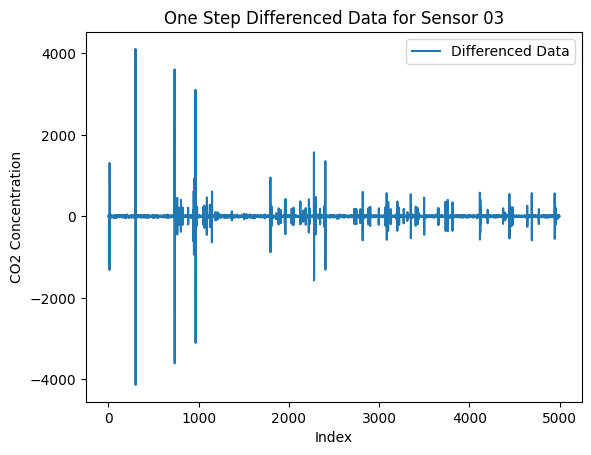

Is the time series stationary? Yes


d:\python3.7.7\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



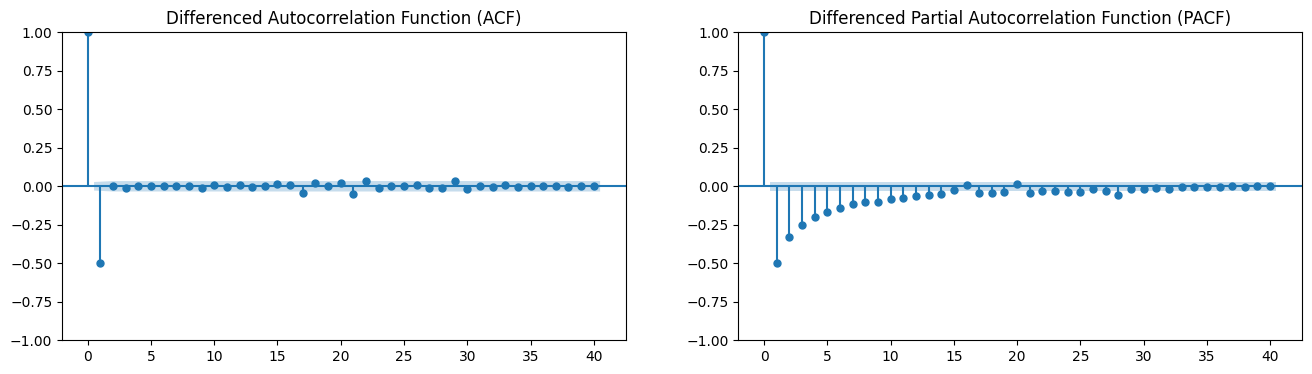

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

data = lp8_vals[3, ] 
diff_data = np.diff(data)

plt.plot(diff_data, label='Differenced Data')
plt.title('One Step Differenced Data for Sensor 03')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()
adf_result = adfuller(diff_data)
print('Is the time series stationary?', 'No' if adf_result[1] > 0.05 else 'Yes')

time_series = data  
diff_time_series = np.diff(time_series)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(diff_time_series, lags=40, ax=axes[0])
axes[0].set_title('Differenced Autocorrelation Function (ACF)')
plot_pacf(diff_time_series, lags=40, ax=axes[1])
axes[1].set_title('Differenced Partial Autocorrelation Function (PACF)')
plt.show()
adf_test = adfuller(diff_time_series)

## Outlier detection
Use arima to detct outlier and use linear interpolation

In [14]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

# Example data generation (assuming data is already loaded)
training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
samples_length = 1000
lp8_vals = []
time_vals = []

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0" + str(i) + ".csv").to_numpy()
    test_file = test_file_0[8000:]
    dates = test_file[:, 0]
    min_range_found = False
    for k, date in enumerate(dates):
        if not min_range_found and date[11:13] == "07" and date[:10] == "2023-12-01":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-12-01":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
    
    lp8_co2_values = np.array([])
    N = test_file[:, 10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    for j in range(0, N-samples_length, samples_length):
        measurements = test_file[:, 7][j:(j+samples_length)]
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        date_time = test_file[:, 0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time, date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))

    lp8 = lp8_co2_values[curr_range[0]:curr_range[1]]
    
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step * k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    lp8_vals.append(lp8_co2_values[:5000])
    time_vals.append(time[:5000]) 

lp8_vals = np.array(lp8_vals)
data = lp8_vals[3, ] 
data = data.astype(float)
df = pd.DataFrame(data, columns=['Value'])
df['Time'] = time_vals[3]

# Fitting the ARIMA model on original data
order = (1,1,1)  # ARIMA model orders
model_original = ARIMA(df['Value'], order=order)
results_original = model_original.fit()

# Forecasting with original data
forecast_original = results_original.predict(start=df.index[0], end=df.index[-1], typ='levels')

# Calculating residuals for original data
residuals_original = df['Value'] - forecast_original

# Using Z-score to detect outliers in original data
z_scores = np.abs(stats.zscore(residuals_original))
threshold = 1.5  # Setting the threshold
outliers = np.where(z_scores > threshold)[0]
outlier_values = df.iloc[outliers]

# Linear interpolation to handle outliers
df['Value_cleaned'] = df['Value']
df.loc[outliers, 'Value_cleaned'] = np.nan  # Set outliers to NaN
df['Value_cleaned'].interpolate(method='linear', inplace=True)  # Linear interpolation

# Plotting the results
fig = go.Figure()

# Plot the original time series data
fig.add_trace(go.Scatter(x=np.arange(len(data)), y=df['Value'], mode='lines', name='CO2 Concentration (Lp8)'))

# Plot the cleaned time series data
fig.add_trace(go.Scatter(x=np.arange(len(data)), y=df['Value_cleaned'], mode='lines', name='CO2 Concentration (Cleaned)'))

# Mark outliers
if len(outlier_values) > 0:
    outlier_x = [i for i in range(len(data)) if i in outliers]
    fig.add_trace(go.Scatter(x=outlier_x, y=outlier_values['Value'], mode='markers', marker=dict(color='red', symbol='x', size=5), name='Outliers'))

fig.update_layout(title='ARIMA Outlier Detection and Linear Interpolation', xaxis_title='Time', yaxis_title='CO2 Concentration')

# Set x-axis ticks
fig.update_xaxes(tickmode="array", tickvals=np.arange(len(data))[::300], ticktext=df['Time'][::300])  
fig.show()


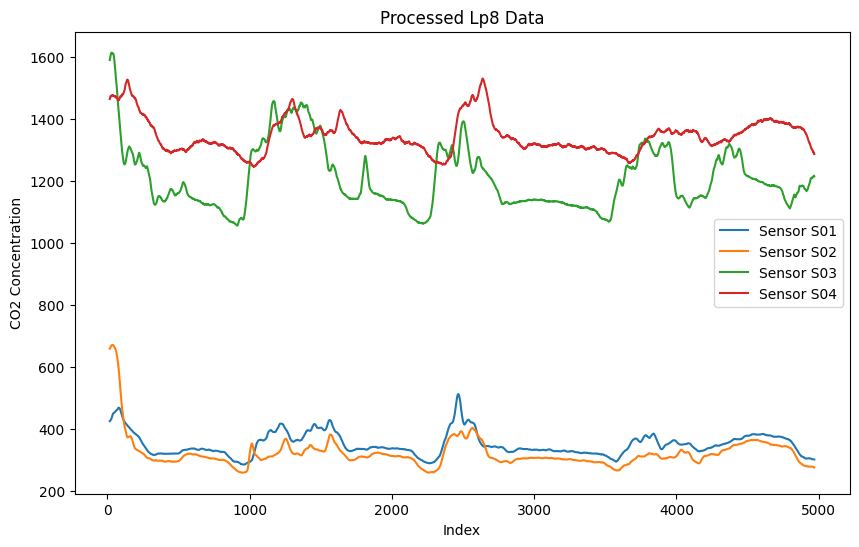

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

# Example data generation (assuming data is already loaded)
training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
samples_length = 1000
lp8_vals = []
time_vals = []

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0" + str(i) + ".csv").to_numpy()
    test_file = test_file_0[8000:]
    dates = test_file[:, 0]
    min_range_found = False
    for k, date in enumerate(dates):
        if not min_range_found and date[11:13] == "07" and date[:10] == "2023-12-01":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-12-01":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
    
    lp8_co2_values = np.array([])
    N = test_file[:, 10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    for j in range(0, N-samples_length, samples_length):
        measurements = test_file[:, 7][j:(j+samples_length)]
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        date_time = test_file[:, 0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time, date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))

    lp8 = lp8_co2_values[curr_range[0]:curr_range[1]]
    
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step * k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    lp8_vals.append(lp8_co2_values[:5000])
    time_vals.append(time[:5000]) 

lp8_vals = np.array(lp8_vals)

# Plotting the results for all sensors
plt.figure(figsize=(10, 6))

for sensor_index in range(1, 5):  # Loop through sensor01 to sensor04
    data = lp8_vals[sensor_index, :]
    data = data.astype(float)

    # Fitting the ARIMA model on original data
    order = (1, 1, 1)  # ARIMA model orders
    model_original = ARIMA(data, order=order)
    results_original = model_original.fit()

    # Forecasting with original data
    forecast_original = results_original.predict(start=0, end=len(data)-1, typ='levels')

    # Calculating residuals for original data
    residuals_original = data - forecast_original

    # Using Z-score to detect outliers in original data
    z_scores = np.abs(stats.zscore(residuals_original))
    threshold = 0.5  # Setting the threshold
    outliers = np.where(z_scores > threshold)[0]

    # Linear interpolation to handle outliers
    data_cleaned = data.copy()
    data_cleaned[outliers] = np.nan  # Set outliers to NaN
    data_cleaned = pd.Series(data_cleaned).interpolate().values  # Linear interpolation

    # Apply moving average to cleaned data
    window_size = 30
    moving_avg = np.convolve(data_cleaned, np.ones(window_size) / window_size, mode='same')

    # Plot the cleaned time series data and moving average
    #plt.plot(data_cleaned, label=f'Sensor S0{sensor_index} - Cleaned')
    plt.plot(moving_avg[0:4970], label=f'Sensor S0{sensor_index}')


plt.title('Processed Lp8 Data')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


## Evaluate ARIMA

In [65]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from sklearn.metrics import roc_curve, auc

# --- Actual Outlier Detection ---
data = lp8_vals[3, ]
data = data.astype(float)
df = pd.DataFrame(data, columns=['Value'])

# Calculate rolling mean
rolling_mean = df['Value'].rolling(window=51, min_periods=1, center=True).mean()

# Detect outliers (This is your "Actual Outlier Detection" method)
outlier_indices = []
for i in range(len(df)):
    if i < 25 or i >= len(df) - 25:
        continue
    if abs(df['Value'].iloc[i] - rolling_mean.iloc[i]) > 80 and  abs(df['Value'].iloc[i] - df['Value'].iloc[i + 1]) > 150:
        outlier_indices.append(i)
    if abs(df['Value'].iloc[i] - rolling_mean.iloc[i]) > 80 and abs(df['Value'].iloc[i] - df['Value'].iloc[i - 1]) > 150 :
        outlier_indices.append(i)

outlier_values = df.iloc[outlier_indices]

# Convert outlier indices to binary labels (true_outlier_labels)
true_outlier_labels = np.zeros(len(df))
true_outlier_labels[outlier_indices] = 1

# --- ARIMA Outlier Detection ---

# Fitting the ARIMA model
order = (1,1,1)  # ARIMA model orders
model = ARIMA(df, order=order)
results = model.fit()

# Forecasting data
forecast = results.predict(start=df.index[0], end=df.index[-1], typ='levels')

# Calculating residuals
residuals = df['Value'] - forecast

# Using Z-score to detect outliers
z_scores = np.abs(stats.zscore(residuals))
threshold = 1.5  # Setting the threshold
outliers_arima = np.where(z_scores > threshold)[0]

# Convert outlier indices to binary labels (outlier_labels_arima)
outlier_labels_arima = np.zeros(len(df))
outlier_labels_arima[outliers_arima] = 1

# --- ROC Curve Comparison ---

# Calculate ROC and AUC for both methods
fpr_arima, tpr_arima, thresholds_arima = roc_curve(true_outlier_labels, outlier_labels_arima)
roc_auc_arima = auc(fpr_arima, tpr_arima)

fpr_actual, tpr_actual, thresholds_actual = roc_curve(true_outlier_labels, true_outlier_labels)
roc_auc_actual = auc(fpr_actual, tpr_actual)

# Plot both ROC curves on the same graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_arima, y=tpr_arima, mode='lines', name='ARIMA (AUC = {:.2f})'.format(roc_auc_arima)))
fig.add_trace(go.Scatter(x=fpr_actual, y=tpr_actual, mode='lines', name='Actual (AUC = {:.2f})'.format(roc_auc_actual)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='gray', dash='dash'), name='Random Guess'))
fig.update_layout(
    title='ROC Curve Comparison',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=800,  
    height=600  
)
fig.show()


In [109]:
import numpy as np
import plotly.graph_objects as go

data = np.array(lp8_vals[3, ])
df = pd.DataFrame(data, columns=['Value'])
df['Time'] = time_vals[3] 
num_subsets = 20
subset_size = len(data) // num_subsets

# Creating a Figure object
fig = go.Figure()

# Adding the line plot of the total data
fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, mode='lines', name='CO2 Value'))  

# Detecting outliers for each subset and annotating them on the total data
outlier_indices = []
for idx in range(num_subsets):
    start_index = idx * subset_size
    end_index = (idx + 1) * subset_size
    subset_data = data[start_index:end_index].astype(float)
    
    # Computing the mean and standard deviation of the subset data
    mean = np.mean(subset_data)
    std_dev = np.std(subset_data)
    
    # Defining the threshold
    threshold = 2 * std_dev
    
    # Finding outliers
    for i, value in enumerate(subset_data):
        if abs(value - mean) > threshold:
            outlier_indices.append(start_index + i)  # Recording the index of outliers on the total data

# Highlighting outliers with a different marker
if len(outlier_indices) > 0:
    fig.add_trace(go.Scatter(x=np.array(outlier_indices), y=data[outlier_indices], mode='markers', 
                             marker=dict(color='red', symbol='x'), name='Outliers'))  

# Get the time stamp for the first subset
time_stamp = df['Time'][0]

# Updating the layout
fig.update_layout(title='Outlier Detection with 3 sigma', xaxis_title='Time', yaxis_title='CO2 Value')

# Set x-axis ticks
fig.update_xaxes(tickmode="array", tickvals=np.arange(len(data))[::300], ticktext=df['Time'][::300])  
fig.show()



## Outlier detection
Use arima to detct outlier and use linear interpolation

In [54]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN

# Example data generation (assuming data is already loaded)
training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
samples_length = 1000
lp8_vals = []
time_vals = []

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0" + str(i) + ".csv").to_numpy()
    test_file = test_file_0[8000:]
    dates = test_file[:, 0]
    min_range_found = False
    for k, date in enumerate(dates):
        if not min_range_found and date[11:13] == "07" and date[:10] == "2023-12-01":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-12-01":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
    
    lp8_co2_values = np.array([])
    N = test_file[:, 10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    for j in range(0, N-samples_length, samples_length):
        measurements = test_file[:, 7][j:(j+samples_length)]
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        date_time = test_file[:, 0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time, date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))

    lp8 = lp8_co2_values[curr_range[0]:curr_range[1]]
    
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step * k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    lp8_vals.append(lp8_co2_values[:5000])
    time_vals.append(time[:5000]) 

lp8_vals = np.array(lp8_vals)
data = lp8_vals[4, ] 
data = data.astype(float)
df = pd.DataFrame(data, columns=['Value'])
df['Time'] = time_vals[4]

# Using DBSCAN for outlier detection
# Normalize the data for DBSCAN
df_normalized = (df['Value'] - df['Value'].mean()) / df['Value'].std()
df_normalized = np.array(df_normalized).reshape(-1, 1)

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)  # You need to adjust these parameters based on your data

# Fit DBSCAN
dbscan.fit(df_normalized)

# Identify outliers (outlier points will have a cluster label of -1)
outliers_mask = dbscan.labels_ == -1
outliers_indices = np.where(outliers_mask)[0]
outlier_values = df.iloc[outliers_indices]

# Linear interpolation to handle outliers
df['Value_cleaned_dbscan'] = df['Value']
df.loc[outliers_indices, 'Value_cleaned_dbscan'] = np.nan  # Set outliers to NaN
df['Value_cleaned_dbscan'].interpolate(method='linear', inplace=True)  # Linear interpolation

# Plotting the results
fig = go.Figure()

# Plot the original time series data
fig.add_trace(go.Scatter(x=np.arange(len(data)), y=df['Value'], mode='lines', name='CO2 Value (Original)'))

# Plot the cleaned time series data using DBSCAN
fig.add_trace(go.Scatter(x=np.arange(len(data)), y=df['Value_cleaned_dbscan'], mode='lines', name='CO2 Value (Interpolated with DBSCAN)'))

# Mark outliers
if len(outlier_values) > 0:
    outlier_x = [i for i in range(len(data)) if i in outliers_indices]
    fig.add_trace(go.Scatter(x=outlier_x, y=outlier_values['Value'], mode='markers', marker=dict(color='red', symbol='x', size=5), name='Outliers (DBSCAN)'))

fig.update_layout(title='DBSCAN Outlier Detection and Linear Interpolation', xaxis_title='Time', yaxis_title='CO2 Value')

# Set x-axis ticks
fig.update_xaxes(tickmode="array", tickvals=np.arange(len(data))[::300], ticktext=df['Time'][::300])  
fig.show()


## DBSCAN Evaluation

In [55]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.metrics import roc_curve, auc
from scipy import stats

# --- Actual Outlier Detection ---
data = lp8_vals[3, ]
data = data.astype(float)
df = pd.DataFrame(data, columns=['Value'])

# Calculate rolling mean
rolling_mean = df['Value'].rolling(window=51, min_periods=1, center=True).mean()

# Detect outliers (This is your "Actual Outlier Detection" method)
outlier_indices = []
for i in range(len(df)):
    if i < 25 or i >= len(df) - 25:
        continue
    if abs(df['Value'].iloc[i] - rolling_mean.iloc[i]) > 80 and abs(df['Value'].iloc[i] - df['Value'].iloc[i + 1]) > 150:
        outlier_indices.append(i)
    if abs(df['Value'].iloc[i] - rolling_mean.iloc[i]) > 80 and abs(df['Value'].iloc[i] - df['Value'].iloc[i - 1]) > 150:
        outlier_indices.append(i)

outlier_values = df.iloc[outlier_indices]

# Convert outlier indices to binary labels (true_outlier_labels)
true_outlier_labels = np.zeros(len(df))
true_outlier_labels[outlier_indices] = 1

# --- DBSCAN Outlier Detection ---

# Normalize the data for DBSCAN
df_normalized = (df - df.mean()) / df.std()

# Fitting the DBSCAN model
db = DBSCAN(eps=0.5, min_samples=150).fit(df_normalized)

# Extracting labels (-1 is the label for outliers in DBSCAN)
labels = db.labels_
outliers_dbscan = np.where(labels == -1)[0]

# Convert outlier indices to binary labels (outlier_labels_dbscan)
outlier_labels_dbscan = np.zeros(len(df))
outlier_labels_dbscan[outliers_dbscan] = 1

# --- ROC Curve Comparison ---

# Calculate ROC and AUC for both methods
fpr_dbscan, tpr_dbscan, thresholds_dbscan = roc_curve(true_outlier_labels, outlier_labels_dbscan)
roc_auc_dbscan = auc(fpr_dbscan, tpr_dbscan)

fpr_actual, tpr_actual, thresholds_actual = roc_curve(true_outlier_labels, true_outlier_labels)
roc_auc_actual = auc(fpr_actual, tpr_actual)

# Plot both ROC curves on the same graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_dbscan, y=tpr_dbscan, mode='lines', name='DBSCAN (AUC = {:.2f})'.format(roc_auc_dbscan)))
fig.add_trace(go.Scatter(x=fpr_actual, y=tpr_actual, mode='lines', name='Actual (AUC = {:.2f})'.format(roc_auc_actual)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='gray', dash='dash'), name='Random Guess'))
fig.update_layout(
    title='ROC Curve Comparison',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=800,
    height=600
)
fig.show()


In [ ]:
lp8_vals = np.array(lp8_vals)
data = lp8_vals[3, ] 
data = data.astype(float)

## Get data

(5474,)
(5490,)
(5468,)
(5477,)
(5472,)


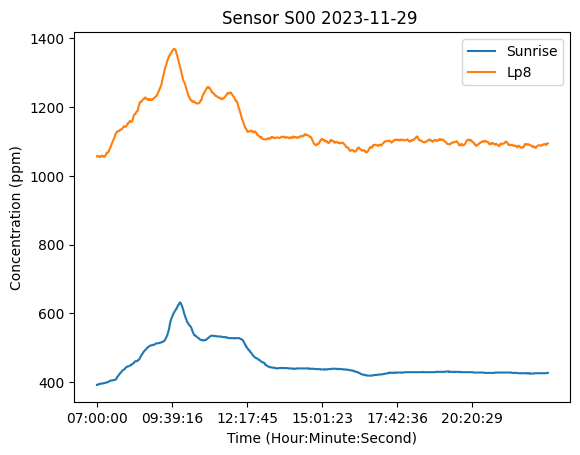

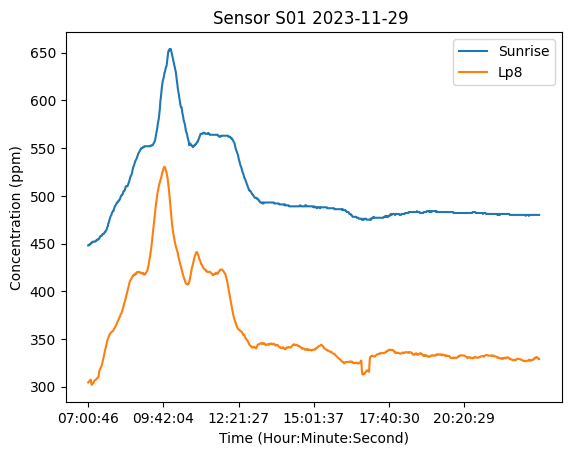

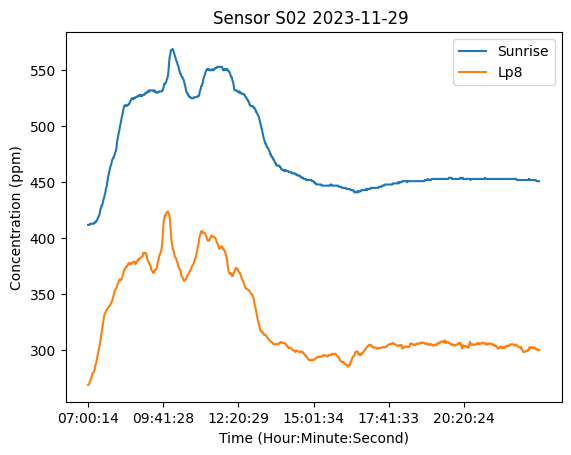

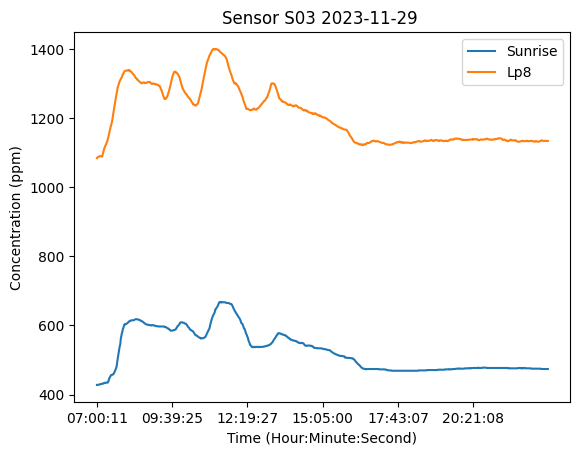

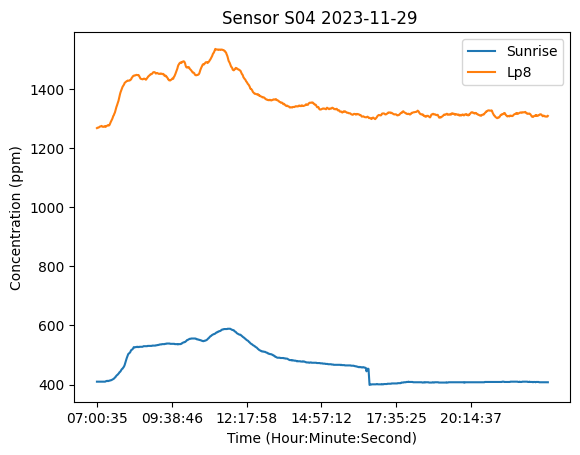

In [4]:
import matplotlib.animation as animation
from sklearn.gaussian_process import GaussianProcessRegressor

calibrator = SelfCalibration(training_paths, parameters_path, 28,
                            samples_length = 100,
                            hmm_iters = 20, hmm_tol = 1e0,
                            sample_until = 8000)
calibrator.supervised_fit()

def moving_average(x, n=15):
    ret = np.cumsum(x, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
parameters_path = "SensorsParams.csv"
from IPython import display 
samples_length = 1000
#07:00 -> 23:00, date: 11/24

sunrise_vals = []
lp8_vals = []
cal_vals = []
dt_vals = []

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0"+ str(i) +".csv").to_numpy()
    test_file_0 = test_file_0[8000:]
    test_file = calibrator.remove_outlier_rows(test_file_0)
    #test_file[:,4], test_file[:,7] = calibrator.calibrate_outside(test_file[:,4], test_file[:,7], test_file[:,0], ind=i)
    dates = (test_file[:,0])
    min_range_found = False
    for k, date in enumerate(dates):
        if min_range_found == False and date[11:13] == "07" and date[:10] == "2023-11-29":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-11-29":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
        
    co2_values = np.array([])
    true_co2_values = np.array([])
    lp8_co2_values = np.array([])
    dt_values = np.array([])
    N = test_file[:,10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    fig, ax = plt.subplots()
    for j in range(0, N-samples_length, samples_length):
        dT = test_file[:,10][j:(j+samples_length)]
        I = moving_average(test_file[:,9][j:(j+samples_length)])
        p = moving_average(test_file[:,3][j:(j+samples_length)])
        measurements = test_file[:,7][j:(j+samples_length)]
        measurements = moving_average(measurements)
        true = (test_file[:,4][j:(j+samples_length)-15])


        true_co2_values = np.append(true_co2_values, true)
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        dt_values = np.append(dt_values, I)
        date_time = test_file[:,0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time,date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))
    sunrise = ax.plot(t[curr_range[0]:curr_range[1]], true_co2_values[curr_range[0]:curr_range[1]], label = "Sunrise")
    lp8 = ax.plot(t[curr_range[0]:curr_range[1]], lp8_co2_values[curr_range[0]:curr_range[1]], label = "Lp8")
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step*k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    ax.set_xticks(tick_vals)
    ax.set_xticklabels(tick_labels)
    ax.set_xlabel("Time (Hour:Minute:Second)")
    ax.set_ylabel("Concentration (ppm)")
    ax.set_title("Sensor S0"+str(i)+" "+date[curr_range[0]])
            
    ax.legend()
    plt.show()
    sunrise_vals.append(true_co2_values[:5000])
    lp8_vals.append(lp8_co2_values[:5000])


sunrise_vals = np.array(sunrise_vals)
lp8_vals = np.array(lp8_vals)



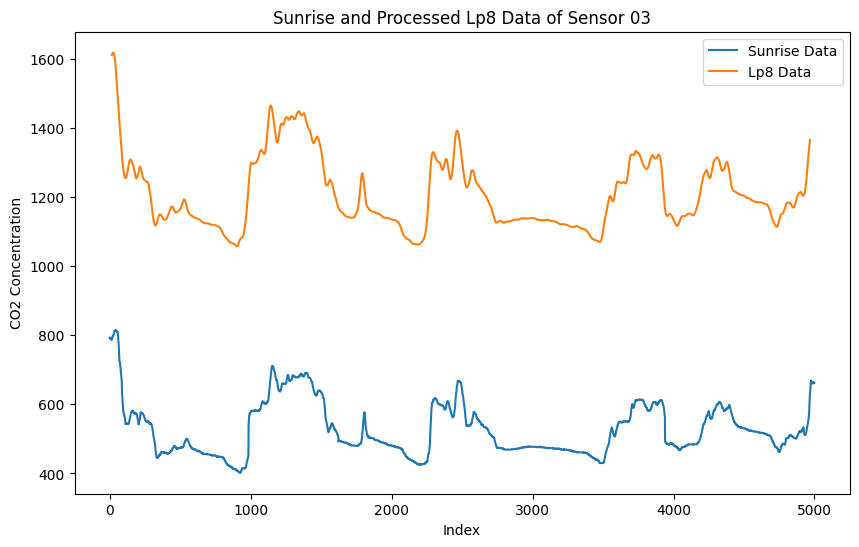

In [47]:
data = lp8_vals[3, :]
data = data.astype(float)

# Fitting the ARIMA model on original data
order = (1, 1, 1)  # ARIMA model orders
model_original = ARIMA(data, order=order)
results_original = model_original.fit()

# Forecasting with original data
forecast_original = results_original.predict(start=0, end=len(data)-1, typ='levels')

# Calculating residuals for original data
residuals_original = data - forecast_original

# Using Z-score to detect outliers in original data
z_scores = np.abs(stats.zscore(residuals_original))
threshold = 0.5  # Setting the threshold
outliers = np.where(z_scores > threshold)[0]

# Linear interpolation to handle outliers
data_cleaned = data.copy()
data_cleaned[outliers] = np.nan  # Set outliers to NaN
data_cleaned = pd.Series(data_cleaned).interpolate().values  # Linear interpolation

# Apply moving average to cleaned data
window_size = 30
moving_avg = np.convolve(data_cleaned, np.ones(window_size) / window_size, mode='same')

# Plot the cleaned time series data and moving average
#plt.plot(data_cleaned, label=f'Sensor S0{sensor_index} - Cleaned')

plt.figure(figsize=(10, 6))  # Set figure size if needed
plt.plot(sunrise_vals[3, ], label='Sunrise Data')
plt.plot(moving_avg[0:4970], label='Lp8 Data')

plt.title('Sunrise and Processed Lp8 Data of Sensor 03')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

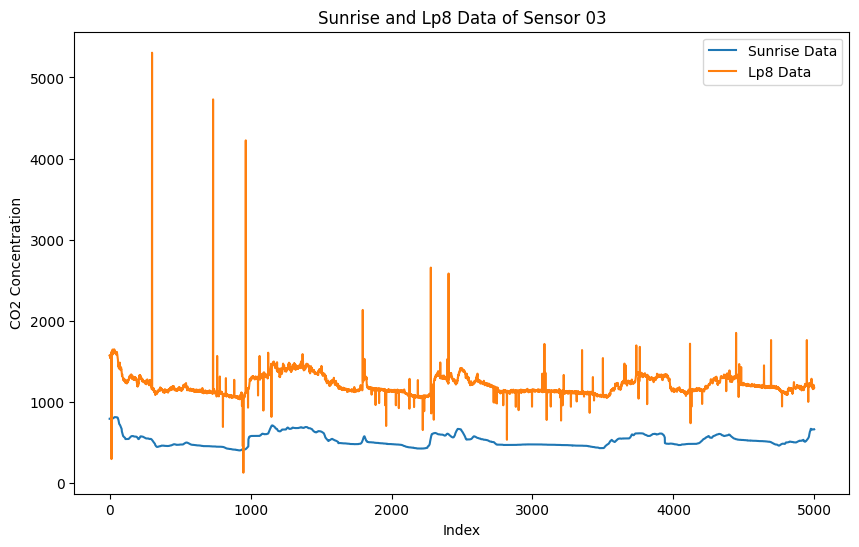

In [50]:
plt.figure(figsize=(10, 6))  # Set figure size if needed
plt.plot(sunrise_vals[3, ], label='Sunrise Data')
plt.plot(lp8_vals[3, ], label='Lp8 Data')

plt.title('Sunrise and Lp8 Data of Sensor 03')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

## Calibration

## Supervised
use all sunrise and lp8 data to calibrate

Epoch [1/100], Loss: 0.0007
Epoch [2/100], Loss: 0.0001
Epoch [3/100], Loss: 0.0010
Epoch [4/100], Loss: 0.0010
Epoch [5/100], Loss: 0.0013
Epoch [6/100], Loss: 0.0013
Epoch [7/100], Loss: 0.0014
Epoch [8/100], Loss: 0.0014
Epoch [9/100], Loss: 0.0014
Epoch [10/100], Loss: 0.0013
Epoch [11/100], Loss: 0.0013
Epoch [12/100], Loss: 0.0012
Epoch [13/100], Loss: 0.0012
Epoch [14/100], Loss: 0.0011
Epoch [15/100], Loss: 0.0011
Epoch [16/100], Loss: 0.0010
Epoch [17/100], Loss: 0.0010
Epoch [18/100], Loss: 0.0009
Epoch [19/100], Loss: 0.0009
Epoch [20/100], Loss: 0.0008
Epoch [21/100], Loss: 0.0008
Epoch [22/100], Loss: 0.0008
Epoch [23/100], Loss: 0.0007
Epoch [24/100], Loss: 0.0007
Epoch [25/100], Loss: 0.0007
Epoch [26/100], Loss: 0.0007
Epoch [27/100], Loss: 0.0007
Epoch [28/100], Loss: 0.0006
Epoch [29/100], Loss: 0.0006
Epoch [30/100], Loss: 0.0006
Epoch [31/100], Loss: 0.0006
Epoch [32/100], Loss: 0.0006
Epoch [33/100], Loss: 0.0006
Epoch [34/100], Loss: 0.0006
Epoch [35/100], Loss: 0

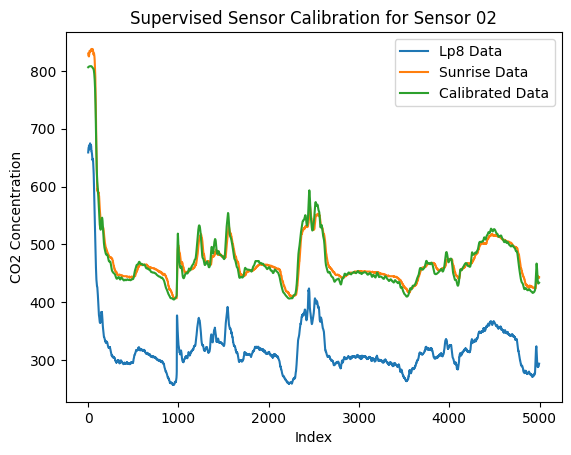

RMSE between calibrated data and original high precision data: 11.3814


In [92]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# --- Data Preprocessing ---

# Get the data segment
data_high_precision = sunrise_vals[2,].astype(float)  # Assuming the data is in the 4th row of `sunrise_vals`
data_low_precision = lp8_vals[2,].astype(float)  # Assuming the data is in the 4th row of `lp8_vals`

# Calculate the maximum and minimum values for normalization and denormalization
max_data = np.max(data_high_precision)
min_data = np.min(data_high_precision)

# Normalize the data
data_high_precision_normalized = (data_high_precision - min_data) / (max_data - min_data)
data_low_precision_normalized = (data_low_precision - min_data) / (max_data - min_data)

# Convert to PyTorch tensors
data_high_precision_tensor = torch.from_numpy(data_high_precision_normalized).float().view(-1, 1)
data_low_precision_tensor = torch.from_numpy(data_low_precision_normalized).float().view(-1, 1)

# --- Data Splitting ---
train_size = int(0.8 * len(data_low_precision_tensor))  # 80% for training
val_size = int(0.1 * len(data_low_precision_tensor))  # 10% for validation
test_size = len(data_low_precision_tensor) - train_size - val_size  # Remaining for testing

# Split the data into training, validation, and testing sets
train_inputs, val_inputs, test_inputs = torch.split(data_low_precision_tensor, [train_size, val_size, test_size])
train_targets, val_targets, test_targets = torch.split(data_high_precision_tensor, [train_size, val_size, test_size])

# --- Create Sliding Window Dataset ---
window_size = 5

def create_windowed_data(inputs, targets, window_size):
    """
    Creates a dataset with windowed inputs and corresponding target values.
    
    Args:
        inputs: Input data tensor.
        targets: Target data tensor.
        window_size: Size of the sliding window.
    
    Returns:
        windowed_inputs: Tensor with windowed inputs.
        windowed_targets: Tensor with corresponding target values.
    """
    windowed_inputs = []
    windowed_targets = []
    for i in range(len(inputs) - window_size + 1):
        windowed_inputs.append(inputs[i:i + window_size])
        windowed_targets.append(targets[i + window_size - 1])
    return torch.stack(windowed_inputs), torch.stack(windowed_targets)

# Create windowed datasets
train_inputs, train_targets = create_windowed_data(train_inputs, train_targets, window_size)
val_inputs, val_targets = create_windowed_data(val_inputs, val_targets, window_size)
test_inputs, test_targets = create_windowed_data(test_inputs, test_targets, window_size)

# --- Define DeepCM Model ---
class DeepCM(nn.Module):
    """
    Deep Convolutional Memory (DeepCM) model for time series calibration.
    """
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size, skip_period):
        """
        Initializes the DeepCM model.
        
        Args:
            input_dim: Dimension of input features.
            hidden_dim: Dimension of hidden states.
            output_dim: Dimension of output features.
            kernel_size: Size of the convolutional kernel.
            skip_period: Period for the recurrent skip connection.
        """
        super(DeepCM, self).__init__()
        
        # Convolutional module
        self.conv_layer = nn.Conv2d(in_channels=1,  # Input channels (1 for single feature)
                                   out_channels=hidden_dim,  # Number of output channels (hidden features)
                                   kernel_size=kernel_size,  # Convolutional kernel size
                                   padding=(0, 1))  # Padding to maintain sequence length

        # Recurrent module (GRU)
        self.rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                hidden_size=hidden_dim,  # Hidden state size for GRU
                                batch_first=True)  # Input data is in [batch, sequence, feature] format

        # Recurrent skip module (GRU)
        self.skip_rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                     hidden_size=hidden_dim,  # Hidden state size for GRU
                                     batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.skip_period = skip_period  # Period for the skip connection

        # Decoder module (GRU and fully connected layer)
        self.decoder_gru = nn.GRU(input_size=hidden_dim * 3 + input_dim,  # Input size for GRU (concatenated features)
                                   hidden_size=hidden_dim,  # Hidden state size for GRU
                                   batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer for final output

    def forward(self, x, x_initial):
        """
        Forward pass of the DeepCM model.
        
        Args:
            x: Input data tensor [batch_size, seq_len, input_dim].
            x_initial: Initial input for the decoder [batch_size, input_dim].
        
        Returns:
            y_pred: Predicted output tensor [batch_size, output_dim].
        """
        # 1. Encoder
        # 1.1 Convolutional Module
        x = x.unsqueeze(1)  # Add a channel dimension [batch_size, 1, seq_len, input_dim]
        h_conv = self.conv_layer(x).squeeze(3)  # Convolution output [batch_size, hidden_dim, seq_len]
        h_conv = h_conv.permute(0, 2, 1)  # Reshape for RNN [batch_size, seq_len, hidden_dim]

        # 1.2 Recurrent Module (GRU)
        h_rnn, _ = self.rnn_layer(h_conv)  # RNN output [batch_size, seq_len, hidden_dim]

        # 1.3 Recurrent Skip Module (GRU)
        h_skip_rnn = self.recurrent_skip(h_conv)  # Skip RNN output [batch_size, seq_len, hidden_dim]

        # 1.4 Concatenate features
        h_enc = torch.cat((h_rnn[:, -1, :], h_skip_rnn[:, -1, :], h_skip_rnn[:, -2, :]), dim=1)  # Concatenate final states
        
        # 2. Decoder
        h_dec, _ = self.decoder_gru(torch.cat((h_enc, x_initial), dim=1).unsqueeze(1))  # Decode concatenated features
        y_pred = self.fc(h_dec.squeeze(1))  # Final output prediction [batch_size, output_dim]
        
        return y_pred

    def recurrent_skip(self, h_conv):
        """
        Implements the recurrent skip connection.
        
        Args:
            h_conv: Convolutional output tensor [batch_size, seq_len, hidden_dim].
        
        Returns:
            h_skip: Output tensor with skip connections [batch_size, seq_len, hidden_dim].
        """
        batch_size, seq_len, hidden_dim = h_conv.size()
        h_skip = h_conv[:, 0:1, :].repeat(1, self.skip_period, 1)  # Initialize skip state
        for i in range(self.skip_period, seq_len):
            h_skip_prev = h_skip[:, i - self.skip_period:i, :]  # Previous skip states
            _, h_skip_new = self.skip_rnn_layer(h_conv[:, i:i + 1, :], h_skip_prev[:, -1:, :])  # Skip RNN output
            h_skip = torch.cat((h_skip, h_skip_new), dim=1)  # Concatenate skip states
        return h_skip

# --- Model Parameters ---
input_dim = 1  # Dimension of input features (single feature)
hidden_dim = 16  # Dimension of hidden states
output_dim = 1  # Dimension of output features (single feature)
kernel_size = (1, 3)  # Size of the convolutional kernel
skip_period = 20  # Period for the recurrent skip connection

# --- Model Instantiation, Loss Function, and Optimizer ---
model = DeepCM(input_dim, hidden_dim, output_dim, kernel_size, skip_period)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# --- Model Training ---
epochs = 100  # Number of training epochs
batch_size = 16  # Batch size for training

for epoch in range(epochs):
    # Iterate through batches
    for i in range(0, len(train_inputs) - batch_size, batch_size):
        input_batch = train_inputs[i:i + batch_size]  # Input data batch
        target_batch = train_targets[i:i + batch_size]  # Target data batch
        inputs_initial = input_batch[:, -1, :]  # Initial input for decoder

        # Forward pass
        outputs = model(input_batch, inputs_initial)

        # Calculate loss
        loss = criterion(outputs, target_batch)

        # Backward pass and parameter update
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Calculate gradients
        optimizer.step()  # Update model parameters

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch and loss

# --- Model Evaluation (Using New Test Set) ---
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # New test data (replace with actual data)
    new_test_data_high_precision = sunrise_vals[2,].astype(float)
    new_test_data_low_precision = lp8_vals[2,].astype(float)

    # Normalize the new test data
    new_max_data = np.max(new_test_data_high_precision)
    new_min_data = np.min(new_test_data_high_precision)
    new_test_data_high_precision_normalized = (new_test_data_high_precision - new_min_data) / (new_max_data - new_min_data)
    new_test_data_low_precision_normalized = (new_test_data_low_precision - new_min_data) / (new_max_data - new_min_data)

    # Convert to PyTorch tensors
    new_test_data_high_precision_tensor = torch.from_numpy(new_test_data_high_precision_normalized).float().view(-1, 1)
    new_test_data_low_precision_tensor = torch.from_numpy(new_test_data_low_precision_normalized).float().view(-1, 1)

    # Create windowed samples
    new_test_inputs, new_test_targets = create_windowed_data(new_test_data_low_precision_tensor, new_test_data_high_precision_tensor, window_size)

    # Model evaluation
    new_test_inputs_initial = new_test_inputs[:, -1, :]
    new_test_outputs = model(new_test_inputs, new_test_inputs_initial)

    # Denormalize model outputs
    new_test_outputs_unnormalized = new_test_outputs * (new_max_data - new_min_data) + new_min_data
    

# --- Visualize Results (Using New Test Set) ---
plt.plot(new_test_data_low_precision[window_size - 1:], label='Lp8 Data')
plt.plot(new_test_data_high_precision[window_size - 1:], label='Sunrise Data')
plt.plot(detect_and_remove_outliers(new_test_outputs_unnormalized.view(-1).detach().numpy(), order=(1,1,1), threshold=1.5, window_size=12), label='Calibrated Data')
plt.title('Supervised Sensor Calibration for Sensor 02')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

# Calculate RMSE between calibrated data and original high-precision data
rmse = np.sqrt(np.mean((new_test_outputs_unnormalized.view(-1).detach().numpy() - sunrise_vals[2,4:5000])**2))
print(f"RMSE between calibrated data and original high precision data: {rmse:.4f}")

## 2% data supervised
use 2% sunrise and lp8 data to train model, then use model to calibrate

Epoch [1/100], Loss: 0.3373
Epoch [2/100], Loss: 0.2078
Epoch [3/100], Loss: 0.1350
Epoch [4/100], Loss: 0.1005
Epoch [5/100], Loss: 0.0884
Epoch [6/100], Loss: 0.0886
Epoch [7/100], Loss: 0.0954
Epoch [8/100], Loss: 0.1048
Epoch [9/100], Loss: 0.1137
Epoch [10/100], Loss: 0.1202
Epoch [11/100], Loss: 0.1233
Epoch [12/100], Loss: 0.1231
Epoch [13/100], Loss: 0.1204
Epoch [14/100], Loss: 0.1162
Epoch [15/100], Loss: 0.1116
Epoch [16/100], Loss: 0.1073
Epoch [17/100], Loss: 0.1037
Epoch [18/100], Loss: 0.1011
Epoch [19/100], Loss: 0.0994
Epoch [20/100], Loss: 0.0983
Epoch [21/100], Loss: 0.0975
Epoch [22/100], Loss: 0.0968
Epoch [23/100], Loss: 0.0960
Epoch [24/100], Loss: 0.0950
Epoch [25/100], Loss: 0.0938
Epoch [26/100], Loss: 0.0925
Epoch [27/100], Loss: 0.0910
Epoch [28/100], Loss: 0.0896
Epoch [29/100], Loss: 0.0882
Epoch [30/100], Loss: 0.0869
Epoch [31/100], Loss: 0.0857
Epoch [32/100], Loss: 0.0845
Epoch [33/100], Loss: 0.0832
Epoch [34/100], Loss: 0.0820
Epoch [35/100], Loss: 0

C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:222: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:223: RuntimeWarning: divide by zero encountered in true_divide


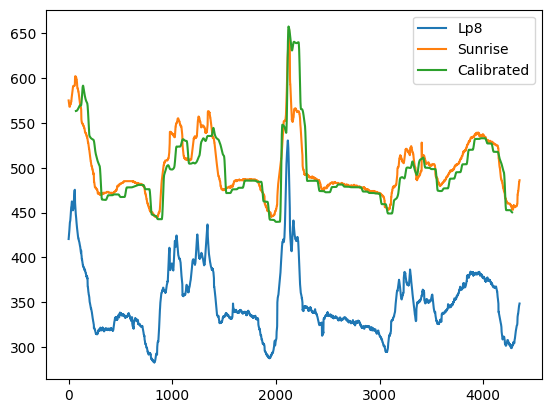

RMSE: 21.9942
MAE: 12.6356


In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --- Data Preprocessing ---

# Get the data segment
data_high_precision = sunrise_vals[1, 1:100].astype(float)  # Assuming the data is in the 4th row of `sunrise_vals`
data_low_precision = lp8_vals[1, 1:100].astype(float)  # Assuming the data is in the 4th row of `lp8_vals`

# Calculate the maximum and minimum values for normalization and denormalization
max_data = np.max(data_high_precision)
min_data = np.min(data_high_precision)

# Normalize the data
data_high_precision_normalized = (data_high_precision - min_data) / (max_data - min_data)
data_low_precision_normalized = (data_low_precision - min_data) / (max_data - min_data)

# Convert to PyTorch tensors
data_high_precision_tensor = torch.from_numpy(data_high_precision_normalized).float().view(-1, 1)
data_low_precision_tensor = torch.from_numpy(data_low_precision_normalized).float().view(-1, 1)

# --- Data Splitting ---
train_size = int(0.8 * len(data_low_precision_tensor))  # 80% for training
val_size = int(0.1 * len(data_low_precision_tensor))  # 10% for validation
test_size = len(data_low_precision_tensor) - train_size - val_size  # Remaining for testing

# Split the data into training, validation, and testing sets
train_inputs, val_inputs, test_inputs = torch.split(data_low_precision_tensor, [train_size, val_size, test_size])
train_targets, val_targets, test_targets = torch.split(data_high_precision_tensor, [train_size, val_size, test_size])

# --- Create Sliding Window Dataset ---
window_size = 5

def create_windowed_data(inputs, targets, window_size):
    """
    Creates a dataset with windowed inputs and corresponding target values.
    
    Args:
        inputs: Input data tensor.
        targets: Target data tensor.
        window_size: Size of the sliding window.
    
    Returns:
        windowed_inputs: Tensor with windowed inputs.
        windowed_targets: Tensor with corresponding target values.
    """
    windowed_inputs = []
    windowed_targets = []
    for i in range(len(inputs) - window_size + 1):
        windowed_inputs.append(inputs[i:i + window_size])
        windowed_targets.append(targets[i + window_size - 1])
    return torch.stack(windowed_inputs), torch.stack(windowed_targets)

# Create windowed datasets
train_inputs, train_targets = create_windowed_data(train_inputs, train_targets, window_size)
val_inputs, val_targets = create_windowed_data(val_inputs, val_targets, window_size)
test_inputs, test_targets = create_windowed_data(test_inputs, test_targets, window_size)

# --- Define DeepCM Model ---
class DeepCM(nn.Module):
    """
    Deep Convolutional Memory (DeepCM) model for time series calibration.
    """
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size, skip_period):
        """
        Initializes the DeepCM model.
        
        Args:
            input_dim: Dimension of input features.
            hidden_dim: Dimension of hidden states.
            output_dim: Dimension of output features.
            kernel_size: Size of the convolutional kernel.
            skip_period: Period for the recurrent skip connection.
        """
        super(DeepCM, self).__init__()
        
        # Convolutional module
        self.conv_layer = nn.Conv2d(in_channels=1,  # Input channels (1 for single feature)
                                   out_channels=hidden_dim,  # Number of output channels (hidden features)
                                   kernel_size=kernel_size,  # Convolutional kernel size
                                   padding=(0, 1))  # Padding to maintain sequence length

        # Recurrent module (GRU)
        self.rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                hidden_size=hidden_dim,  # Hidden state size for GRU
                                batch_first=True)  # Input data is in [batch, sequence, feature] format

        # Recurrent skip module (GRU)
        self.skip_rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                     hidden_size=hidden_dim,  # Hidden state size for GRU
                                     batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.skip_period = skip_period  # Period for the skip connection

        # Decoder module (GRU and fully connected layer)
        self.decoder_gru = nn.GRU(input_size=hidden_dim * 3 + input_dim,  # Input size for GRU (concatenated features)
                                   hidden_size=hidden_dim,  # Hidden state size for GRU
                                   batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer for final output

    def forward(self, x, x_initial):
        """
        Forward pass of the DeepCM model.
        
        Args:
            x: Input data tensor [batch_size, seq_len, input_dim].
            x_initial: Initial input for the decoder [batch_size, input_dim].
        
        Returns:
            y_pred: Predicted output tensor [batch_size, output_dim].
        """
        # 1. Encoder
        # 1.1 Convolutional Module
        x = x.unsqueeze(1)  # Add a channel dimension [batch_size, 1, seq_len, input_dim]
        h_conv = self.conv_layer(x).squeeze(3)  # Convolution output [batch_size, hidden_dim, seq_len]
        h_conv = h_conv.permute(0, 2, 1)  # Reshape for RNN [batch_size, seq_len, hidden_dim]

        # 1.2 Recurrent Module (GRU)
        h_rnn, _ = self.rnn_layer(h_conv)  # RNN output [batch_size, seq_len, hidden_dim]

        # 1.3 Recurrent Skip Module (GRU)
        h_skip_rnn = self.recurrent_skip(h_conv)  # Skip RNN output [batch_size, seq_len, hidden_dim]

        # 1.4 Concatenate features
        h_enc = torch.cat((h_rnn[:, -1, :], h_skip_rnn[:, -1, :], h_skip_rnn[:, -2, :]), dim=1)  # Concatenate final states
        
        # 2. Decoder
        h_dec, _ = self.decoder_gru(torch.cat((h_enc, x_initial), dim=1).unsqueeze(1))  # Decode concatenated features
        y_pred = self.fc(h_dec.squeeze(1))  # Final output prediction [batch_size, output_dim]
        
        return y_pred

    def recurrent_skip(self, h_conv):
        """
        Implements the recurrent skip connection.
        
        Args:
            h_conv: Convolutional output tensor [batch_size, seq_len, hidden_dim].
        
        Returns:
            h_skip: Output tensor with skip connections [batch_size, seq_len, hidden_dim].
        """
        batch_size, seq_len, hidden_dim = h_conv.size()
        h_skip = h_conv[:, 0:1, :].repeat(1, self.skip_period, 1)  # Initialize skip state
        for i in range(self.skip_period, seq_len):
            h_skip_prev = h_skip[:, i - self.skip_period:i, :]  # Previous skip states
            _, h_skip_new = self.skip_rnn_layer(h_conv[:, i:i + 1, :], h_skip_prev[:, -1:, :])  # Skip RNN output
            h_skip = torch.cat((h_skip, h_skip_new), dim=1)  # Concatenate skip states
        return h_skip

# --- Model Parameters ---
input_dim = 1  # Dimension of input features (single feature)
hidden_dim = 16  # Dimension of hidden states
output_dim = 1  # Dimension of output features (single feature)
kernel_size = (1, 3)  # Size of the convolutional kernel
skip_period = 20  # Period for the recurrent skip connection

# --- Model Instantiation, Loss Function, and Optimizer ---
model = DeepCM(input_dim, hidden_dim, output_dim, kernel_size, skip_period)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# --- Model Training ---
epochs = 100  # Number of training epochs
batch_size = 16  # Batch size for training

for epoch in range(epochs):
    # Iterate through batches
    for i in range(0, len(train_inputs) - batch_size, batch_size):
        input_batch = train_inputs[i:i + batch_size]  # Input data batch
        target_batch = train_targets[i:i + batch_size]  # Target data batch
        inputs_initial = input_batch[:, -1, :]  # Initial input for decoder

        # Forward pass
        outputs = model(input_batch, inputs_initial)

        # Calculate loss
        loss = criterion(outputs, target_batch)

        # Backward pass and parameter update
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Calculate gradients
        optimizer.step()  # Update model parameters

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch and loss

def create_windowed_data(inputs, targets, window_size):
    input_windows = []
    target_windows = []
    for i in range(len(inputs) - window_size):
        input_windows.append(inputs[i:i + window_size])
        target_windows.append(targets[i + window_size])
    return torch.stack(input_windows), torch.stack(target_windows)

# Set model to evaluation mode
model.eval()

# Initialize lists to store results
all_lp8_data = []
all_sunrise_data = []
all_calibrated_data = []

# Sequence length
sequence_length = 5000

# Iterate through the entire sequence, processing 50 data points at a time
for start_idx in range(0, sequence_length, 70):
    end_idx = start_idx + 70
    if end_idx > sequence_length:
        end_idx = sequence_length  # Ensure index does not go out of range

    with torch.no_grad():
        # Extract current window of data
        new_test_data_high_precision = sunrise_vals[1, start_idx:end_idx].astype(float)
        new_test_data_low_precision = lp8_vals[1, start_idx:end_idx].astype(float)

        # Normalize the test data
        new_max_data = np.max(new_test_data_high_precision)
        new_min_data = np.min(new_test_data_high_precision)
        new_test_data_high_precision_normalized = (new_test_data_high_precision - new_min_data) / (new_max_data - new_min_data)
        new_test_data_low_precision_normalized = (new_test_data_low_precision - new_min_data) / (new_max_data - new_min_data)

        # Convert to PyTorch tensors
        new_test_data_high_precision_tensor = torch.from_numpy(new_test_data_high_precision_normalized).float().view(-1, 1)
        new_test_data_low_precision_tensor = torch.from_numpy(new_test_data_low_precision_normalized).float().view(-1, 1)

        # Create windowed samples
        window_size = 10  # Assume window size is 10, adjust as needed
        new_test_inputs, new_test_targets = create_windowed_data(new_test_data_low_precision_tensor, new_test_data_high_precision_tensor, window_size)

        # Model evaluation
        new_test_inputs_initial = new_test_inputs[:, -1, :]
        new_test_outputs = model(new_test_inputs, new_test_inputs_initial)

        # Denormalize model outputs
        new_test_outputs_unnormalized = new_test_outputs * (new_max_data - new_min_data) + new_min_data

        # Append results to lists
        all_lp8_data.extend(new_test_data_low_precision[window_size - 1:])
        all_sunrise_data.extend(new_test_data_high_precision[window_size - 1:])
        all_calibrated_data.extend(new_test_outputs_unnormalized.view(-1).detach().numpy())

# Convert results to numpy arrays for plotting
all_lp8_data = np.array(all_lp8_data)
all_sunrise_data = np.array(all_sunrise_data)
all_calibrated_data = np.array(all_calibrated_data)

all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)
all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)

# Shift the calibrated data to the right by 50
shifted_calibrated_data = np.roll(all_calibrated_data, 70)
shifted_calibrated_data[:70] = np.nan  # Fill the first 50 positions with NaN

# Visualize the results
plt.plot(all_lp8_data, label='Lp8')
plt.plot(all_sunrise_data, label='Sunrise')
plt.plot(shifted_calibrated_data, label='Calibrated')
plt.legend()
plt.show()

# Calculate RMSE
valid_indices = ~np.isnan(shifted_calibrated_data)  # Find indices of non-NaN values
calibrated_data_1 = shifted_calibrated_data[valid_indices]  # Corresponding calibrated data

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_sunrise_data[0:len(calibrated_data_1)], calibrated_data_1))
print(f'RMSE: {rmse:.4f}')
mae = np.mean(np.abs(all_sunrise_data[0:len(calibrated_data_1)] - calibrated_data_1))
print(f'MAE: {mae:.4f}')


Epoch [1/100], Loss: 0.4440
Epoch [2/100], Loss: 0.3312
Epoch [3/100], Loss: 0.2363
Epoch [4/100], Loss: 0.1569
Epoch [5/100], Loss: 0.0929
Epoch [6/100], Loss: 0.0452
Epoch [7/100], Loss: 0.0152
Epoch [8/100], Loss: 0.0019
Epoch [9/100], Loss: 0.0007
Epoch [10/100], Loss: 0.0041
Epoch [11/100], Loss: 0.0058
Epoch [12/100], Loss: 0.0044
Epoch [13/100], Loss: 0.0020
Epoch [14/100], Loss: 0.0005
Epoch [15/100], Loss: 0.0001
Epoch [16/100], Loss: 0.0004
Epoch [17/100], Loss: 0.0007
Epoch [18/100], Loss: 0.0007
Epoch [19/100], Loss: 0.0005
Epoch [20/100], Loss: 0.0003
Epoch [21/100], Loss: 0.0002
Epoch [22/100], Loss: 0.0001
Epoch [23/100], Loss: 0.0001
Epoch [24/100], Loss: 0.0001
Epoch [25/100], Loss: 0.0001
Epoch [26/100], Loss: 0.0001
Epoch [27/100], Loss: 0.0002
Epoch [28/100], Loss: 0.0002
Epoch [29/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0002
Epoch [31/100], Loss: 0.0002
Epoch [32/100], Loss: 0.0002
Epoch [33/100], Loss: 0.0002
Epoch [34/100], Loss: 0.0002
Epoch [35/100], Loss: 0

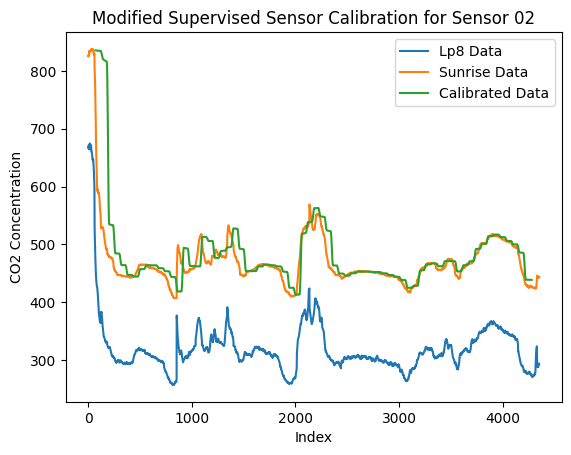

RMSE: 28.4216
MAE: 12.2661


In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --- Data Preprocessing ---

# Get the data segment
data_high_precision = sunrise_vals[2, 1:100].astype(float)  # Assuming the data is in the 4th row of `sunrise_vals`
data_low_precision = lp8_vals[2, 1:100].astype(float)  # Assuming the data is in the 4th row of `lp8_vals`

# Calculate the maximum and minimum values for normalization and denormalization
max_data = np.max(data_high_precision)
min_data = np.min(data_high_precision)

# Normalize the data
data_high_precision_normalized = (data_high_precision - min_data) / (max_data - min_data)
data_low_precision_normalized = (data_low_precision - min_data) / (max_data - min_data)

# Convert to PyTorch tensors
data_high_precision_tensor = torch.from_numpy(data_high_precision_normalized).float().view(-1, 1)
data_low_precision_tensor = torch.from_numpy(data_low_precision_normalized).float().view(-1, 1)

# --- Data Splitting ---
train_size = int(0.8 * len(data_low_precision_tensor))  # 80% for training
val_size = int(0.1 * len(data_low_precision_tensor))  # 10% for validation
test_size = len(data_low_precision_tensor) - train_size - val_size  # Remaining for testing

# Split the data into training, validation, and testing sets
train_inputs, val_inputs, test_inputs = torch.split(data_low_precision_tensor, [train_size, val_size, test_size])
train_targets, val_targets, test_targets = torch.split(data_high_precision_tensor, [train_size, val_size, test_size])

# --- Create Sliding Window Dataset ---
window_size = 5

def create_windowed_data(inputs, targets, window_size):
    """
    Creates a dataset with windowed inputs and corresponding target values.
    
    Args:
        inputs: Input data tensor.
        targets: Target data tensor.
        window_size: Size of the sliding window.
    
    Returns:
        windowed_inputs: Tensor with windowed inputs.
        windowed_targets: Tensor with corresponding target values.
    """
    windowed_inputs = []
    windowed_targets = []
    for i in range(len(inputs) - window_size + 1):
        windowed_inputs.append(inputs[i:i + window_size])
        windowed_targets.append(targets[i + window_size - 1])
    return torch.stack(windowed_inputs), torch.stack(windowed_targets)

# Create windowed datasets
train_inputs, train_targets = create_windowed_data(train_inputs, train_targets, window_size)
val_inputs, val_targets = create_windowed_data(val_inputs, val_targets, window_size)
test_inputs, test_targets = create_windowed_data(test_inputs, test_targets, window_size)

# --- Define DeepCM Model ---
class DeepCM(nn.Module):
    """
    Deep Convolutional Memory (DeepCM) model for time series calibration.
    """
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size, skip_period):
        """
        Initializes the DeepCM model.
        
        Args:
            input_dim: Dimension of input features.
            hidden_dim: Dimension of hidden states.
            output_dim: Dimension of output features.
            kernel_size: Size of the convolutional kernel.
            skip_period: Period for the recurrent skip connection.
        """
        super(DeepCM, self).__init__()
        
        # Convolutional module
        self.conv_layer = nn.Conv2d(in_channels=1,  # Input channels (1 for single feature)
                                   out_channels=hidden_dim,  # Number of output channels (hidden features)
                                   kernel_size=kernel_size,  # Convolutional kernel size
                                   padding=(0, 1))  # Padding to maintain sequence length

        # Recurrent module (GRU)
        self.rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                hidden_size=hidden_dim,  # Hidden state size for GRU
                                batch_first=True)  # Input data is in [batch, sequence, feature] format

        # Recurrent skip module (GRU)
        self.skip_rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                     hidden_size=hidden_dim,  # Hidden state size for GRU
                                     batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.skip_period = skip_period  # Period for the skip connection

        # Decoder module (GRU and fully connected layer)
        self.decoder_gru = nn.GRU(input_size=hidden_dim * 3 + input_dim,  # Input size for GRU (concatenated features)
                                   hidden_size=hidden_dim,  # Hidden state size for GRU
                                   batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer for final output

    def forward(self, x, x_initial):
        """
        Forward pass of the DeepCM model.
        
        Args:
            x: Input data tensor [batch_size, seq_len, input_dim].
            x_initial: Initial input for the decoder [batch_size, input_dim].
        
        Returns:
            y_pred: Predicted output tensor [batch_size, output_dim].
        """
        # 1. Encoder
        # 1.1 Convolutional Module
        x = x.unsqueeze(1)  # Add a channel dimension [batch_size, 1, seq_len, input_dim]
        h_conv = self.conv_layer(x).squeeze(3)  # Convolution output [batch_size, hidden_dim, seq_len]
        h_conv = h_conv.permute(0, 2, 1)  # Reshape for RNN [batch_size, seq_len, hidden_dim]

        # 1.2 Recurrent Module (GRU)
        h_rnn, _ = self.rnn_layer(h_conv)  # RNN output [batch_size, seq_len, hidden_dim]

        # 1.3 Recurrent Skip Module (GRU)
        h_skip_rnn = self.recurrent_skip(h_conv)  # Skip RNN output [batch_size, seq_len, hidden_dim]

        # 1.4 Concatenate features
        h_enc = torch.cat((h_rnn[:, -1, :], h_skip_rnn[:, -1, :], h_skip_rnn[:, -2, :]), dim=1)  # Concatenate final states
        
        # 2. Decoder
        h_dec, _ = self.decoder_gru(torch.cat((h_enc, x_initial), dim=1).unsqueeze(1))  # Decode concatenated features
        y_pred = self.fc(h_dec.squeeze(1))  # Final output prediction [batch_size, output_dim]
        
        return y_pred

    def recurrent_skip(self, h_conv):
        """
        Implements the recurrent skip connection.
        
        Args:
            h_conv: Convolutional output tensor [batch_size, seq_len, hidden_dim].
        
        Returns:
            h_skip: Output tensor with skip connections [batch_size, seq_len, hidden_dim].
        """
        batch_size, seq_len, hidden_dim = h_conv.size()
        h_skip = h_conv[:, 0:1, :].repeat(1, self.skip_period, 1)  # Initialize skip state
        for i in range(self.skip_period, seq_len):
            h_skip_prev = h_skip[:, i - self.skip_period:i, :]  # Previous skip states
            _, h_skip_new = self.skip_rnn_layer(h_conv[:, i:i + 1, :], h_skip_prev[:, -1:, :])  # Skip RNN output
            h_skip = torch.cat((h_skip, h_skip_new), dim=1)  # Concatenate skip states
        return h_skip

# --- Model Parameters ---
input_dim = 1  # Dimension of input features (single feature)
hidden_dim = 16  # Dimension of hidden states
output_dim = 1  # Dimension of output features (single feature)
kernel_size = (1, 3)  # Size of the convolutional kernel
skip_period = 20  # Period for the recurrent skip connection

# --- Model Instantiation, Loss Function, and Optimizer ---
model = DeepCM(input_dim, hidden_dim, output_dim, kernel_size, skip_period)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# --- Model Training ---
epochs = 100  # Number of training epochs
batch_size = 16  # Batch size for training

for epoch in range(epochs):
    # Iterate through batches
    for i in range(0, len(train_inputs) - batch_size, batch_size):
        input_batch = train_inputs[i:i + batch_size]  # Input data batch
        target_batch = train_targets[i:i + batch_size]  # Target data batch
        inputs_initial = input_batch[:, -1, :]  # Initial input for decoder

        # Forward pass
        outputs = model(input_batch, inputs_initial)

        # Calculate loss
        loss = criterion(outputs, target_batch)

        # Backward pass and parameter update
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Calculate gradients
        optimizer.step()  # Update model parameters

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch and loss

def create_windowed_data(inputs, targets, window_size):
    input_windows = []
    target_windows = []
    for i in range(len(inputs) - window_size):
        input_windows.append(inputs[i:i + window_size])
        target_windows.append(targets[i + window_size])
    return torch.stack(input_windows), torch.stack(target_windows)

# Set model to evaluation mode
model.eval()

# Initialize lists to store results
all_lp8_data = []
all_sunrise_data = []
all_calibrated_data = []

# Sequence length
sequence_length = 5000

# Iterate through the entire sequence, processing 50 data points at a time
for start_idx in range(0, sequence_length, 70):
    end_idx = start_idx + 70
    if end_idx > sequence_length:
        end_idx = sequence_length  # Ensure index does not go out of range

    with torch.no_grad():
        # Extract current window of data
        new_test_data_high_precision = sunrise_vals[2, start_idx:end_idx].astype(float)
        new_test_data_low_precision = lp8_vals[2, start_idx:end_idx].astype(float)

        # Normalize the test data
        new_max_data = np.max(new_test_data_high_precision)
        new_min_data = np.min(new_test_data_high_precision)
        new_test_data_high_precision_normalized = (new_test_data_high_precision - new_min_data) / (new_max_data - new_min_data)
        new_test_data_low_precision_normalized = (new_test_data_low_precision - new_min_data) / (new_max_data - new_min_data)

        # Convert to PyTorch tensors
        new_test_data_high_precision_tensor = torch.from_numpy(new_test_data_high_precision_normalized).float().view(-1, 1)
        new_test_data_low_precision_tensor = torch.from_numpy(new_test_data_low_precision_normalized).float().view(-1, 1)

        # Create windowed samples
        window_size = 10  # Assume window size is 10, adjust as needed
        new_test_inputs, new_test_targets = create_windowed_data(new_test_data_low_precision_tensor, new_test_data_high_precision_tensor, window_size)

        # Model evaluation
        new_test_inputs_initial = new_test_inputs[:, -1, :]
        new_test_outputs = model(new_test_inputs, new_test_inputs_initial)

        # Denormalize model outputs
        new_test_outputs_unnormalized = new_test_outputs * (new_max_data - new_min_data) + new_min_data

        # Append results to lists
        all_lp8_data.extend(new_test_data_low_precision[window_size - 1:])
        all_sunrise_data.extend(new_test_data_high_precision[window_size - 1:])
        all_calibrated_data.extend(new_test_outputs_unnormalized.view(-1).detach().numpy())

# Convert results to numpy arrays for plotting
all_lp8_data = np.array(all_lp8_data)
all_sunrise_data = np.array(all_sunrise_data)
all_calibrated_data = np.array(all_calibrated_data)

all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)
all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)

# Shift the calibrated data to the right by 50
shifted_calibrated_data = np.roll(all_calibrated_data, 70)
shifted_calibrated_data[:70] = np.nan  # Fill the first 50 positions with NaN

# Visualize the results
plt.plot(all_lp8_data, label='Lp8 Data')
plt.plot(all_sunrise_data, label='Sunrise Data')
plt.plot(shifted_calibrated_data, label='Calibrated Data')
plt.title('Modified Supervised Sensor Calibration for Sensor 02')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.legend()
plt.show()

# Calculate RMSE
valid_indices = ~np.isnan(shifted_calibrated_data)  # Find indices of non-NaN values
calibrated_data_2 = shifted_calibrated_data[valid_indices]  # Corresponding calibrated data

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_sunrise_data[0:len(calibrated_data_2)], calibrated_data_2))
print(f'RMSE: {rmse:.4f}')
mae = np.mean(np.abs(all_sunrise_data[0:len(calibrated_data_2)] - calibrated_data_2))
print(f'MAE: {mae:.4f}')


Epoch [1/100], Loss: 0.8345
Epoch [2/100], Loss: 0.4773
Epoch [3/100], Loss: 0.2431
Epoch [4/100], Loss: 0.1061
Epoch [5/100], Loss: 0.0390
Epoch [6/100], Loss: 0.0185
Epoch [7/100], Loss: 0.0223
Epoch [8/100], Loss: 0.0328
Epoch [9/100], Loss: 0.0405
Epoch [10/100], Loss: 0.0422
Epoch [11/100], Loss: 0.0394
Epoch [12/100], Loss: 0.0346
Epoch [13/100], Loss: 0.0299
Epoch [14/100], Loss: 0.0263
Epoch [15/100], Loss: 0.0239
Epoch [16/100], Loss: 0.0224
Epoch [17/100], Loss: 0.0217
Epoch [18/100], Loss: 0.0215
Epoch [19/100], Loss: 0.0216
Epoch [20/100], Loss: 0.0219
Epoch [21/100], Loss: 0.0223
Epoch [22/100], Loss: 0.0228
Epoch [23/100], Loss: 0.0232
Epoch [24/100], Loss: 0.0235
Epoch [25/100], Loss: 0.0236
Epoch [26/100], Loss: 0.0236
Epoch [27/100], Loss: 0.0235
Epoch [28/100], Loss: 0.0233
Epoch [29/100], Loss: 0.0232
Epoch [30/100], Loss: 0.0230
Epoch [31/100], Loss: 0.0229
Epoch [32/100], Loss: 0.0228
Epoch [33/100], Loss: 0.0227
Epoch [34/100], Loss: 0.0227
Epoch [35/100], Loss: 0

d:\python3.7.7\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\python3.7.7\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


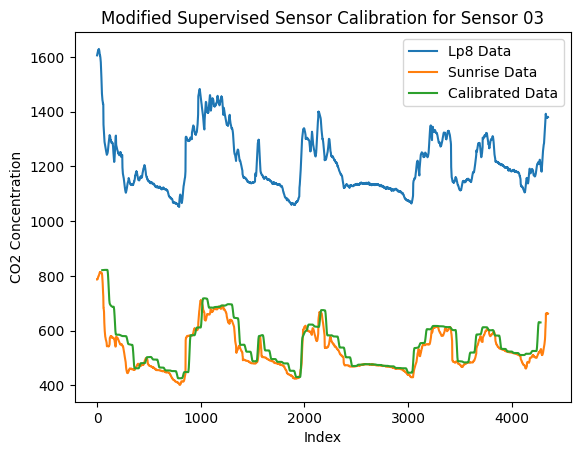

RMSE: 40.8506
MAE: 24.6166


In [19]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --- Data Preprocessing ---

# Get the data segment
data_high_precision = sunrise_vals[3, 1:90].astype(float)  # Assuming the data is in the 4th row of `sunrise_vals`
data_low_precision = lp8_vals[3, 1:90].astype(float)  # Assuming the data is in the 4th row of `lp8_vals`

# Calculate the maximum and minimum values for normalization and denormalization
max_data = np.max(data_high_precision)
min_data = np.min(data_high_precision)

# Normalize the data
data_high_precision_normalized = (data_high_precision - min_data) / (max_data - min_data)
data_low_precision_normalized = (data_low_precision - min_data) / (max_data - min_data)

# Convert to PyTorch tensors
data_high_precision_tensor = torch.from_numpy(data_high_precision_normalized).float().view(-1, 1)
data_low_precision_tensor = torch.from_numpy(data_low_precision_normalized).float().view(-1, 1)

# --- Data Splitting ---
train_size = int(0.8 * len(data_low_precision_tensor))  # 80% for training
val_size = int(0.1 * len(data_low_precision_tensor))  # 10% for validation
test_size = len(data_low_precision_tensor) - train_size - val_size  # Remaining for testing

# Split the data into training, validation, and testing sets
train_inputs, val_inputs, test_inputs = torch.split(data_low_precision_tensor, [train_size, val_size, test_size])
train_targets, val_targets, test_targets = torch.split(data_high_precision_tensor, [train_size, val_size, test_size])

# --- Create Sliding Window Dataset ---
window_size = 5

def create_windowed_data(inputs, targets, window_size):
    """
    Creates a dataset with windowed inputs and corresponding target values.
    
    Args:
        inputs: Input data tensor.
        targets: Target data tensor.
        window_size: Size of the sliding window.
    
    Returns:
        windowed_inputs: Tensor with windowed inputs.
        windowed_targets: Tensor with corresponding target values.
    """
    windowed_inputs = []
    windowed_targets = []
    for i in range(len(inputs) - window_size + 1):
        windowed_inputs.append(inputs[i:i + window_size])
        windowed_targets.append(targets[i + window_size - 1])
    return torch.stack(windowed_inputs), torch.stack(windowed_targets)

# Create windowed datasets
train_inputs, train_targets = create_windowed_data(train_inputs, train_targets, window_size)
val_inputs, val_targets = create_windowed_data(val_inputs, val_targets, window_size)
test_inputs, test_targets = create_windowed_data(test_inputs, test_targets, window_size)

# --- Define DeepCM Model ---
class DeepCM(nn.Module):
    """
    Deep Convolutional Memory (DeepCM) model for time series calibration.
    """
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size, skip_period):
        """
        Initializes the DeepCM model.
        
        Args:
            input_dim: Dimension of input features.
            hidden_dim: Dimension of hidden states.
            output_dim: Dimension of output features.
            kernel_size: Size of the convolutional kernel.
            skip_period: Period for the recurrent skip connection.
        """
        super(DeepCM, self).__init__()
        
        # Convolutional module
        self.conv_layer = nn.Conv2d(in_channels=1,  # Input channels (1 for single feature)
                                   out_channels=hidden_dim,  # Number of output channels (hidden features)
                                   kernel_size=kernel_size,  # Convolutional kernel size
                                   padding=(0, 1))  # Padding to maintain sequence length

        # Recurrent module (GRU)
        self.rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                hidden_size=hidden_dim,  # Hidden state size for GRU
                                batch_first=True)  # Input data is in [batch, sequence, feature] format

        # Recurrent skip module (GRU)
        self.skip_rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                     hidden_size=hidden_dim,  # Hidden state size for GRU
                                     batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.skip_period = skip_period  # Period for the skip connection

        # Decoder module (GRU and fully connected layer)
        self.decoder_gru = nn.GRU(input_size=hidden_dim * 3 + input_dim,  # Input size for GRU (concatenated features)
                                   hidden_size=hidden_dim,  # Hidden state size for GRU
                                   batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer for final output

    def forward(self, x, x_initial):
        """
        Forward pass of the DeepCM model.
        
        Args:
            x: Input data tensor [batch_size, seq_len, input_dim].
            x_initial: Initial input for the decoder [batch_size, input_dim].
        
        Returns:
            y_pred: Predicted output tensor [batch_size, output_dim].
        """
        # 1. Encoder
        # 1.1 Convolutional Module
        x = x.unsqueeze(1)  # Add a channel dimension [batch_size, 1, seq_len, input_dim]
        h_conv = self.conv_layer(x).squeeze(3)  # Convolution output [batch_size, hidden_dim, seq_len]
        h_conv = h_conv.permute(0, 2, 1)  # Reshape for RNN [batch_size, seq_len, hidden_dim]

        # 1.2 Recurrent Module (GRU)
        h_rnn, _ = self.rnn_layer(h_conv)  # RNN output [batch_size, seq_len, hidden_dim]

        # 1.3 Recurrent Skip Module (GRU)
        h_skip_rnn = self.recurrent_skip(h_conv)  # Skip RNN output [batch_size, seq_len, hidden_dim]

        # 1.4 Concatenate features
        h_enc = torch.cat((h_rnn[:, -1, :], h_skip_rnn[:, -1, :], h_skip_rnn[:, -2, :]), dim=1)  # Concatenate final states
        
        # 2. Decoder
        h_dec, _ = self.decoder_gru(torch.cat((h_enc, x_initial), dim=1).unsqueeze(1))  # Decode concatenated features
        y_pred = self.fc(h_dec.squeeze(1))  # Final output prediction [batch_size, output_dim]
        
        return y_pred

    def recurrent_skip(self, h_conv):
        """
        Implements the recurrent skip connection.
        
        Args:
            h_conv: Convolutional output tensor [batch_size, seq_len, hidden_dim].
        
        Returns:
            h_skip: Output tensor with skip connections [batch_size, seq_len, hidden_dim].
        """
        batch_size, seq_len, hidden_dim = h_conv.size()
        h_skip = h_conv[:, 0:1, :].repeat(1, self.skip_period, 1)  # Initialize skip state
        for i in range(self.skip_period, seq_len):
            h_skip_prev = h_skip[:, i - self.skip_period:i, :]  # Previous skip states
            _, h_skip_new = self.skip_rnn_layer(h_conv[:, i:i + 1, :], h_skip_prev[:, -1:, :])  # Skip RNN output
            h_skip = torch.cat((h_skip, h_skip_new), dim=1)  # Concatenate skip states
        return h_skip

# --- Model Parameters ---
input_dim = 1  # Dimension of input features (single feature)
hidden_dim = 16  # Dimension of hidden states
output_dim = 1  # Dimension of output features (single feature)
kernel_size = (1, 3)  # Size of the convolutional kernel
skip_period = 20  # Period for the recurrent skip connection

# --- Model Instantiation, Loss Function, and Optimizer ---
model = DeepCM(input_dim, hidden_dim, output_dim, kernel_size, skip_period)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# --- Model Training ---
epochs = 100  # Number of training epochs
batch_size = 16  # Batch size for training

for epoch in range(epochs):
    # Iterate through batches
    for i in range(0, len(train_inputs) - batch_size, batch_size):
        input_batch = train_inputs[i:i + batch_size]  # Input data batch
        target_batch = train_targets[i:i + batch_size]  # Target data batch
        inputs_initial = input_batch[:, -1, :]  # Initial input for decoder

        # Forward pass
        outputs = model(input_batch, inputs_initial)

        # Calculate loss
        loss = criterion(outputs, target_batch)

        # Backward pass and parameter update
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Calculate gradients
        optimizer.step()  # Update model parameters

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch and loss

def create_windowed_data(inputs, targets, window_size):
    input_windows = []
    target_windows = []
    for i in range(len(inputs) - window_size):
        input_windows.append(inputs[i:i + window_size])
        target_windows.append(targets[i + window_size])
    return torch.stack(input_windows), torch.stack(target_windows)

# Set model to evaluation mode
model.eval()

# Initialize lists to store results
all_lp8_data = []
all_sunrise_data = []
all_calibrated_data = []

# Sequence length
sequence_length = 5000

# Iterate through the entire sequence, processing 50 data points at a time
for start_idx in range(0, sequence_length, 70):
    end_idx = start_idx + 70
    if end_idx > sequence_length:
        end_idx = sequence_length  # Ensure index does not go out of range

    with torch.no_grad():
        # Extract current window of data
        new_test_data_high_precision = sunrise_vals[3, start_idx:end_idx].astype(float)
        new_test_data_low_precision = lp8_vals[3, start_idx:end_idx].astype(float)

        # Normalize the test data
        new_max_data = np.max(new_test_data_high_precision)
        new_min_data = np.min(new_test_data_high_precision)
        new_test_data_high_precision_normalized = (new_test_data_high_precision - new_min_data) / (new_max_data - new_min_data)
        new_test_data_low_precision_normalized = (new_test_data_low_precision - new_min_data) / (new_max_data - new_min_data)

        # Convert to PyTorch tensors
        new_test_data_high_precision_tensor = torch.from_numpy(new_test_data_high_precision_normalized).float().view(-1, 1)
        new_test_data_low_precision_tensor = torch.from_numpy(new_test_data_low_precision_normalized).float().view(-1, 1)

        # Create windowed samples
        window_size = 10  # Assume window size is 10, adjust as needed
        new_test_inputs, new_test_targets = create_windowed_data(new_test_data_low_precision_tensor, new_test_data_high_precision_tensor, window_size)

        # Model evaluation
        new_test_inputs_initial = new_test_inputs[:, -1, :]
        new_test_outputs = model(new_test_inputs, new_test_inputs_initial)

        # Denormalize model outputs
        new_test_outputs_unnormalized = new_test_outputs * (new_max_data - new_min_data) + new_min_data

        # Append results to lists
        all_lp8_data.extend(new_test_data_low_precision[window_size - 1:])
        all_sunrise_data.extend(new_test_data_high_precision[window_size - 1:])
        all_calibrated_data.extend(new_test_outputs_unnormalized.view(-1).detach().numpy())

# Convert results to numpy arrays for plotting
all_lp8_data = np.array(all_lp8_data)
all_sunrise_data = np.array(all_sunrise_data)
all_calibrated_data = np.array(all_calibrated_data)

all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)
all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)

# Shift the calibrated data to the right by 50
shifted_calibrated_data = np.roll(all_calibrated_data, 50)
shifted_calibrated_data[:50] = np.nan  # Fill the first 50 positions with NaN

# Visualize the results
plt.plot(all_lp8_data, label='Lp8 Data')
plt.plot(all_sunrise_data, label='Sunrise Data')
plt.plot(shifted_calibrated_data, label='Calibrated Data')
plt.title('Modified Supervised Sensor Calibration for Sensor 03')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

# Calculate RMSE
valid_indices = ~np.isnan(shifted_calibrated_data)  # Find indices of non-NaN values
data_3 = shifted_calibrated_data[valid_indices]  # Corresponding calibrated data
calibrated_data_3 = data_3

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_sunrise_data[0:len(data_3)], data_3))
print(f'RMSE: {rmse:.4f}')
mae = np.mean(np.abs(all_sunrise_data[0:len(data_3)] - data_3))
print(f'MAE: {mae:.4f}')


Epoch [1/100], Loss: 0.4809
Epoch [2/100], Loss: 0.2705
Epoch [3/100], Loss: 0.1850
Epoch [4/100], Loss: 0.1279
Epoch [5/100], Loss: 0.0833
Epoch [6/100], Loss: 0.0514
Epoch [7/100], Loss: 0.0334
Epoch [8/100], Loss: 0.0258
Epoch [9/100], Loss: 0.0244
Epoch [10/100], Loss: 0.0264
Epoch [11/100], Loss: 0.0303
Epoch [12/100], Loss: 0.0348
Epoch [13/100], Loss: 0.0388
Epoch [14/100], Loss: 0.0418
Epoch [15/100], Loss: 0.0435
Epoch [16/100], Loss: 0.0441
Epoch [17/100], Loss: 0.0438
Epoch [18/100], Loss: 0.0430
Epoch [19/100], Loss: 0.0421
Epoch [20/100], Loss: 0.0411
Epoch [21/100], Loss: 0.0404
Epoch [22/100], Loss: 0.0399
Epoch [23/100], Loss: 0.0396
Epoch [24/100], Loss: 0.0396
Epoch [25/100], Loss: 0.0397
Epoch [26/100], Loss: 0.0399
Epoch [27/100], Loss: 0.0400
Epoch [28/100], Loss: 0.0402
Epoch [29/100], Loss: 0.0403
Epoch [30/100], Loss: 0.0404
Epoch [31/100], Loss: 0.0405
Epoch [32/100], Loss: 0.0405
Epoch [33/100], Loss: 0.0404
Epoch [34/100], Loss: 0.0404
Epoch [35/100], Loss: 0

C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:222: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:223: RuntimeWarning: divide by zero encountered in true_divide


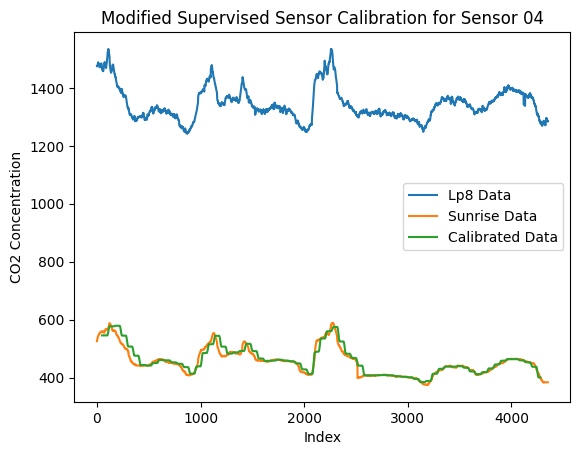

RMSE: 14.3335
MAE: 9.0432


In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --- Data Preprocessing ---

# Get the data segment
data_high_precision = sunrise_vals[4, 1:100].astype(float)  # Assuming the data is in the 4th row of `sunrise_vals`
data_low_precision = lp8_vals[4, 1:100].astype(float)  # Assuming the data is in the 4th row of `lp8_vals`

# Calculate the maximum and minimum values for normalization and denormalization
max_data = np.max(data_high_precision)
min_data = np.min(data_high_precision)

# Normalize the data
data_high_precision_normalized = (data_high_precision - min_data) / (max_data - min_data)
data_low_precision_normalized = (data_low_precision - min_data) / (max_data - min_data)

# Convert to PyTorch tensors
data_high_precision_tensor = torch.from_numpy(data_high_precision_normalized).float().view(-1, 1)
data_low_precision_tensor = torch.from_numpy(data_low_precision_normalized).float().view(-1, 1)

# --- Data Splitting ---
train_size = int(0.8 * len(data_low_precision_tensor))  # 80% for training
val_size = int(0.1 * len(data_low_precision_tensor))  # 10% for validation
test_size = len(data_low_precision_tensor) - train_size - val_size  # Remaining for testing

# Split the data into training, validation, and testing sets
train_inputs, val_inputs, test_inputs = torch.split(data_low_precision_tensor, [train_size, val_size, test_size])
train_targets, val_targets, test_targets = torch.split(data_high_precision_tensor, [train_size, val_size, test_size])

# --- Create Sliding Window Dataset ---
window_size = 5

def create_windowed_data(inputs, targets, window_size):
    """
    Creates a dataset with windowed inputs and corresponding target values.
    
    Args:
        inputs: Input data tensor.
        targets: Target data tensor.
        window_size: Size of the sliding window.
    
    Returns:
        windowed_inputs: Tensor with windowed inputs.
        windowed_targets: Tensor with corresponding target values.
    """
    windowed_inputs = []
    windowed_targets = []
    for i in range(len(inputs) - window_size + 1):
        windowed_inputs.append(inputs[i:i + window_size])
        windowed_targets.append(targets[i + window_size - 1])
    return torch.stack(windowed_inputs), torch.stack(windowed_targets)

# Create windowed datasets
train_inputs, train_targets = create_windowed_data(train_inputs, train_targets, window_size)
val_inputs, val_targets = create_windowed_data(val_inputs, val_targets, window_size)
test_inputs, test_targets = create_windowed_data(test_inputs, test_targets, window_size)

# --- Define DeepCM Model ---
class DeepCM(nn.Module):
    """
    Deep Convolutional Memory (DeepCM) model for time series calibration.
    """
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size, skip_period):
        """
        Initializes the DeepCM model.
        
        Args:
            input_dim: Dimension of input features.
            hidden_dim: Dimension of hidden states.
            output_dim: Dimension of output features.
            kernel_size: Size of the convolutional kernel.
            skip_period: Period for the recurrent skip connection.
        """
        super(DeepCM, self).__init__()
        
        # Convolutional module
        self.conv_layer = nn.Conv2d(in_channels=1,  # Input channels (1 for single feature)
                                   out_channels=hidden_dim,  # Number of output channels (hidden features)
                                   kernel_size=kernel_size,  # Convolutional kernel size
                                   padding=(0, 1))  # Padding to maintain sequence length

        # Recurrent module (GRU)
        self.rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                hidden_size=hidden_dim,  # Hidden state size for GRU
                                batch_first=True)  # Input data is in [batch, sequence, feature] format

        # Recurrent skip module (GRU)
        self.skip_rnn_layer = nn.GRU(input_size=hidden_dim,  # Input size for GRU
                                     hidden_size=hidden_dim,  # Hidden state size for GRU
                                     batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.skip_period = skip_period  # Period for the skip connection

        # Decoder module (GRU and fully connected layer)
        self.decoder_gru = nn.GRU(input_size=hidden_dim * 3 + input_dim,  # Input size for GRU (concatenated features)
                                   hidden_size=hidden_dim,  # Hidden state size for GRU
                                   batch_first=True)  # Input data is in [batch, sequence, feature] format
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer for final output

    def forward(self, x, x_initial):
        """
        Forward pass of the DeepCM model.
        
        Args:
            x: Input data tensor [batch_size, seq_len, input_dim].
            x_initial: Initial input for the decoder [batch_size, input_dim].
        
        Returns:
            y_pred: Predicted output tensor [batch_size, output_dim].
        """
        # 1. Encoder
        # 1.1 Convolutional Module
        x = x.unsqueeze(1)  # Add a channel dimension [batch_size, 1, seq_len, input_dim]
        h_conv = self.conv_layer(x).squeeze(3)  # Convolution output [batch_size, hidden_dim, seq_len]
        h_conv = h_conv.permute(0, 2, 1)  # Reshape for RNN [batch_size, seq_len, hidden_dim]

        # 1.2 Recurrent Module (GRU)
        h_rnn, _ = self.rnn_layer(h_conv)  # RNN output [batch_size, seq_len, hidden_dim]

        # 1.3 Recurrent Skip Module (GRU)
        h_skip_rnn = self.recurrent_skip(h_conv)  # Skip RNN output [batch_size, seq_len, hidden_dim]

        # 1.4 Concatenate features
        h_enc = torch.cat((h_rnn[:, -1, :], h_skip_rnn[:, -1, :], h_skip_rnn[:, -2, :]), dim=1)  # Concatenate final states
        
        # 2. Decoder
        h_dec, _ = self.decoder_gru(torch.cat((h_enc, x_initial), dim=1).unsqueeze(1))  # Decode concatenated features
        y_pred = self.fc(h_dec.squeeze(1))  # Final output prediction [batch_size, output_dim]
        
        return y_pred

    def recurrent_skip(self, h_conv):
        """
        Implements the recurrent skip connection.
        
        Args:
            h_conv: Convolutional output tensor [batch_size, seq_len, hidden_dim].
        
        Returns:
            h_skip: Output tensor with skip connections [batch_size, seq_len, hidden_dim].
        """
        batch_size, seq_len, hidden_dim = h_conv.size()
        h_skip = h_conv[:, 0:1, :].repeat(1, self.skip_period, 1)  # Initialize skip state
        for i in range(self.skip_period, seq_len):
            h_skip_prev = h_skip[:, i - self.skip_period:i, :]  # Previous skip states
            _, h_skip_new = self.skip_rnn_layer(h_conv[:, i:i + 1, :], h_skip_prev[:, -1:, :])  # Skip RNN output
            h_skip = torch.cat((h_skip, h_skip_new), dim=1)  # Concatenate skip states
        return h_skip

# --- Model Parameters ---
input_dim = 1  # Dimension of input features (single feature)
hidden_dim = 16  # Dimension of hidden states
output_dim = 1  # Dimension of output features (single feature)
kernel_size = (1, 3)  # Size of the convolutional kernel
skip_period = 20  # Period for the recurrent skip connection

# --- Model Instantiation, Loss Function, and Optimizer ---
model = DeepCM(input_dim, hidden_dim, output_dim, kernel_size, skip_period)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# --- Model Training ---
epochs = 100  # Number of training epochs
batch_size = 16  # Batch size for training

for epoch in range(epochs):
    # Iterate through batches
    for i in range(0, len(train_inputs) - batch_size, batch_size):
        input_batch = train_inputs[i:i + batch_size]  # Input data batch
        target_batch = train_targets[i:i + batch_size]  # Target data batch
        inputs_initial = input_batch[:, -1, :]  # Initial input for decoder

        # Forward pass
        outputs = model(input_batch, inputs_initial)

        # Calculate loss
        loss = criterion(outputs, target_batch)

        # Backward pass and parameter update
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Calculate gradients
        optimizer.step()  # Update model parameters

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch and loss

def create_windowed_data(inputs, targets, window_size):
    input_windows = []
    target_windows = []
    for i in range(len(inputs) - window_size):
        input_windows.append(inputs[i:i + window_size])
        target_windows.append(targets[i + window_size])
    return torch.stack(input_windows), torch.stack(target_windows)

# Set model to evaluation mode
model.eval()

# Initialize lists to store results
all_lp8_data = []
all_sunrise_data = []
all_calibrated_data = []

# Sequence length
sequence_length = 5000

# Iterate through the entire sequence, processing 50 data points at a time
for start_idx in range(0, sequence_length, 70):
    end_idx = start_idx + 70
    if end_idx > sequence_length:
        end_idx = sequence_length  # Ensure index does not go out of range

    with torch.no_grad():
        # Extract current window of data
        new_test_data_high_precision = sunrise_vals[4, start_idx:end_idx].astype(float)
        new_test_data_low_precision = lp8_vals[4, start_idx:end_idx].astype(float)

        # Normalize the test data
        new_max_data = np.max(new_test_data_high_precision)
        new_min_data = np.min(new_test_data_high_precision)
        new_test_data_high_precision_normalized = (new_test_data_high_precision - new_min_data) / (new_max_data - new_min_data)
        new_test_data_low_precision_normalized = (new_test_data_low_precision - new_min_data) / (new_max_data - new_min_data)

        # Convert to PyTorch tensors
        new_test_data_high_precision_tensor = torch.from_numpy(new_test_data_high_precision_normalized).float().view(-1, 1)
        new_test_data_low_precision_tensor = torch.from_numpy(new_test_data_low_precision_normalized).float().view(-1, 1)

        # Create windowed samples
        window_size = 10  # Assume window size is 10, adjust as needed
        new_test_inputs, new_test_targets = create_windowed_data(new_test_data_low_precision_tensor, new_test_data_high_precision_tensor, window_size)

        # Model evaluation
        new_test_inputs_initial = new_test_inputs[:, -1, :]
        new_test_outputs = model(new_test_inputs, new_test_inputs_initial)

        # Denormalize model outputs
        new_test_outputs_unnormalized = new_test_outputs * (new_max_data - new_min_data) + new_min_data

        # Append results to lists
        all_lp8_data.extend(new_test_data_low_precision[window_size - 1:])
        all_sunrise_data.extend(new_test_data_high_precision[window_size - 1:])
        all_calibrated_data.extend(new_test_outputs_unnormalized.view(-1).detach().numpy())

# Convert results to numpy arrays for plotting
all_lp8_data = np.array(all_lp8_data)
all_sunrise_data = np.array(all_sunrise_data)
all_calibrated_data = np.array(all_calibrated_data)

all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)
all_calibrated_data = detect_and_remove_outliers(all_calibrated_data, order=(1,1,1), threshold=1.5, window_size=12)

# Shift the calibrated data to the right by 50
shifted_calibrated_data = np.roll(all_calibrated_data, 50)
shifted_calibrated_data[:50] = np.nan  # Fill the first 50 positions with NaN

# Visualize the results
plt.plot(all_lp8_data, label='Lp8 Data')
plt.plot(all_sunrise_data, label='Sunrise Data')
plt.plot(shifted_calibrated_data, label='Calibrated Data')
plt.title('Modified Supervised Sensor Calibration for Sensor 04')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

# Calculate RMSE
valid_indices = ~np.isnan(shifted_calibrated_data)  # Find indices of non-NaN values
calibrated_data_4 = shifted_calibrated_data[valid_indices]  # Corresponding calibrated data

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_sunrise_data[0:len(calibrated_data_4)], calibrated_data_4))
print(f'RMSE: {rmse:.4f}')
mae = np.mean(np.abs(all_sunrise_data[0:len(calibrated_data_4)] - calibrated_data_4))
print(f'MAE: {mae:.4f}')


## Sliding window all supervised

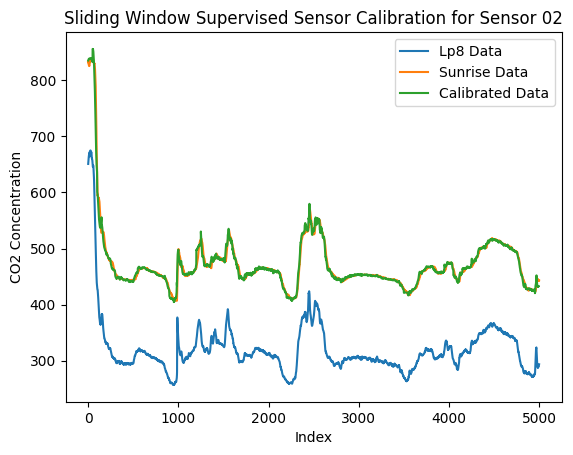

RMSE between calibrated data and original high precision data: 4.5606


In [96]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class DeepCM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size, skip_period):
        super(DeepCM, self).__init__()
        self.conv_layer = nn.Conv2d(1, hidden_dim, kernel_size, padding=(0, 1))
        self.rnn_layer = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        self.skip_rnn_layer = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        self.skip_period = skip_period
        self.decoder_gru = nn.GRU(hidden_dim * 3 + input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, x_initial):
        x = x.unsqueeze(1)
        h_conv = self.conv_layer(x).squeeze(3)
        h_conv = h_conv.permute(0, 2, 1)
        h_rnn, _ = self.rnn_layer(h_conv)
        h_skip_rnn = self.recurrent_skip(h_conv)
        h_enc = torch.cat((h_rnn[:, -1, :], h_skip_rnn[:, -1, :], h_skip_rnn[:, -2, :]), dim=1)
        h_dec, _ = self.decoder_gru(torch.cat((h_enc, x_initial), dim=1).unsqueeze(1))
        y_pred = self.fc(h_dec.squeeze(1))
        return y_pred

    def recurrent_skip(self, h_conv):
        batch_size, seq_len, hidden_dim = h_conv.size()
        h_skip = h_conv[:, 0:1, :].repeat(1, self.skip_period, 1)
        for i in range(self.skip_period, seq_len):
            h_skip_prev = h_skip[:, i - self.skip_period:i, :]
            _, h_skip_new = self.skip_rnn_layer(h_conv[:, i:i + 1, :], h_skip_prev[:, -1:, :])
            h_skip = torch.cat((h_skip, h_skip_new), dim=1)
        return h_skip

def create_windowed_data(inputs, targets, window_size):
    windowed_inputs = []
    windowed_targets = []
    for i in range(len(inputs) - window_size + 1):
        windowed_inputs.append(inputs[i:i + window_size])
        windowed_targets.append(targets[i + window_size - 1])
    return torch.stack(windowed_inputs), torch.stack(windowed_targets)

input_dim = 1
hidden_dim = 16
output_dim = 1
kernel_size = (1, 3)
skip_period = 20
window_size = 5
epochs = 100
batch_size = 16
calibration_window_size = 100
overlap_size = 50

data_high_precision = sunrise_vals[2,].astype(float)
data_low_precision = lp8_vals[2,].astype(float)

max_data = np.max(data_high_precision)
min_data = np.min(data_high_precision)

data_high_precision_normalized = (data_high_precision - min_data) / (max_data - min_data)
data_low_precision_normalized = (data_low_precision - min_data) / (max_data - min_data)

data_high_precision_tensor = torch.from_numpy(data_high_precision_normalized).float().view(-1, 1)
data_low_precision_tensor = torch.from_numpy(data_low_precision_normalized).float().view(-1, 1)

model = DeepCM(input_dim, hidden_dim, output_dim, kernel_size, skip_period)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

calibrated_data = data_low_precision.copy()

for start_idx in range(0, len(data_low_precision) - calibration_window_size + 1, 
                       calibration_window_size - overlap_size):
    end_idx = min(start_idx + calibration_window_size, len(data_low_precision))
    
    train_data_high_precision = sunrise_vals[2, start_idx:end_idx].astype(float)
    train_data_low_precision = lp8_vals[2, start_idx:end_idx].astype(float)

    train_data_high_precision_normalized = (train_data_high_precision - min_data) / (max_data - min_data)
    train_data_low_precision_normalized = (train_data_low_precision - min_data) / (max_data - min_data)

    train_inputs_tensor = torch.from_numpy(train_data_low_precision_normalized).float().view(-1, 1)
    train_targets_tensor = torch.from_numpy(train_data_high_precision_normalized).float().view(-1, 1)

    train_inputs, train_targets = create_windowed_data(train_inputs_tensor, train_targets_tensor, window_size)

    for epoch in range(epochs):
        for i in range(0, len(train_inputs) - batch_size, batch_size):
            input_batch = train_inputs[i:i + batch_size]
            target_batch = train_targets[i:i + batch_size]
            inputs_initial = input_batch[:, -1, :]
            outputs = model(input_batch, inputs_initial)
            loss = criterion(outputs, target_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        calibration_inputs, _ = create_windowed_data(
            data_low_precision_tensor[start_idx:end_idx], 
            data_high_precision_tensor[start_idx:end_idx],
            window_size
        )
        calibration_inputs_initial = calibration_inputs[:, -1, :]
        calibration_outputs = model(calibration_inputs, calibration_inputs_initial)

        # Corrected indexing:
        calibrated_data[start_idx + window_size - 1: end_idx] = (
            calibration_outputs.view(-1).detach().numpy() * (max_data - min_data) + min_data
        )

plt.plot(data_low_precision, label='Lp8 Data')
plt.plot(sunrise_vals[2,], label='Sunrise Data')
plt.plot(calibrated_data[5:5000], label='Calibrated Data')
plt.title('Sliding Window Supervised Sensor Calibration for Sensor 02')
plt.xlabel('Index')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show() 

# Calculate RMSE between calibrated data and original high-precision data
rmse = np.sqrt(np.mean((calibrated_data[5:5000] - sunrise_vals[2, 5:5000])**2))
print(f"RMSE between calibrated data and original high precision data: {rmse:.4f}")

In [423]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

# Example data generation (assuming data is already loaded)
training_paths = ["kth_logger_00.csv", "kth_logger_01.csv", "kth_logger_02.csv", "kth_logger_03.csv", "kth_logger_04.csv"]
samples_length = 1000
lp8_vals = []
time_vals = []

for i in range(5):
    test_file_0 = pd.read_csv("kth_logger_0" + str(i) + ".csv").to_numpy()
    test_file = test_file_0[8000:]
    dates = test_file[:, 0]
    min_range_found = False
    for k, date in enumerate(dates):
        if not min_range_found and date[11:13] == "07" and date[:10] == "2023-12-01":
            min_range = k
            min_range_found = True
        elif date[11:13] == "23" and date[:10] == "2023-12-01":
            max_range = k
            break
    
    curr_range = np.array([min_range, max_range])
    
    lp8_co2_values = np.array([])
    N = test_file[:, 10].shape[0]
    t = np.array([])
    time = np.array([])
    date = np.array([])
    for j in range(0, N-samples_length, samples_length):
        measurements = test_file[:, 7][j:(j+samples_length)]
        lp8_co2_values = np.append(lp8_co2_values, measurements)
        date_time = test_file[:, 0][j:(j+samples_length)]
        curr_time = np.array([])
        curr_date = np.array([])
        for k in range(date_time.shape[0]):
            curr_time = np.append(curr_time, date_time[k][11:])
            curr_date = np.append(curr_date, date_time[k][:11])
        time = np.append(time, curr_time)
        date = np.append(date, curr_date)
        t = np.append(t, np.arange(j, j+samples_length))

    lp8 = lp8_co2_values[curr_range[0]:curr_range[1]]
    
    tick_vals = []
    tick_labels = []
    step = int((curr_range[1] - curr_range[0]) / 6)
    for k in range(6):
        tick_vals.append(step * k + curr_range[0])
        tick_labels.append(time[tick_vals[-1]])
    lp8_vals.append(lp8_co2_values[:5000])
    time_vals.append(time[:5000]) 

lp8_vals = np.array(lp8_vals)
data = lp8_vals[3, ] 
data = data.astype(float)

# Fitting the ARIMA model on original data
order = (1,1,1)  # ARIMA model orders
model_original = ARIMA(data, order=order)
results_original = model_original.fit()

# Forecasting with original data
forecast_original = results_original.predict(start=0, end=len(data)-1, typ='levels')

# Calculating residuals for original data
residuals_original = data - forecast_original

# Using Z-score to detect outliers in original data
z_scores = np.abs(stats.zscore(residuals_original))
threshold = 1.5  # Setting the threshold
outliers = np.where(z_scores > threshold)[0]
outlier_values = data[outliers]

# Linear interpolation to handle outliers
data_cleaned = data.copy()
data_cleaned[outliers] = np.nan  # Set outliers to NaN
data_cleaned = pd.Series(data_cleaned).interpolate(method='linear').values  # Linear interpolation

In [428]:
def moving_average(data, window_size):
    """ Compute moving average of given data using a window size """
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

window_size = 25


In [8]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from scipy import stats

def detect_and_remove_outliers(data, order=(1,1,1), threshold=1, window_size=5):
    """
    Detects outliers in time series data using ARIMA model residuals and removes them using linear interpolation.
    
    Parameters:
    - data (array-like): Time series data to process.
    - order (tuple): ARIMA model orders (p, d, q).
    - threshold (float): Z-score threshold for outlier detection.
    - window_size (int): Window size for moving average smoothing.
    
    Returns:
    - processed_data (array-like): Processed data with outliers removed and smoothed.
    """
    # Fitting the ARIMA model on original data
    model = ARIMA(data, order=order)
    results = model.fit()
    
    # Forecasting with original data
    forecast = results.predict(start=0, end=len(data)-1, typ='levels')
    
    # Calculating residuals for original data
    residuals = data - forecast
    
    # Using Z-score to detect outliers in original data
    z_scores = np.abs(stats.zscore(residuals))
    outliers = np.where(z_scores > threshold)[0]
    
    # Linear interpolation to handle outliers
    data_cleaned = data.copy()
    data_cleaned[outliers] = np.nan  # Set outliers to NaN
    data_cleaned = pd.Series(data_cleaned).interpolate(method='linear').values  # Linear interpolation
    
    # Smoothing the data using moving average
    smoothed_data = pd.Series(data_cleaned).rolling(window=window_size, min_periods=1, center=True).mean().values
    
    return smoothed_data



## LSTM

Epoch 1/30, Training Loss: 0.9049039483070374, Validation Loss: 0.6139956116676331
Epoch 2/30, Training Loss: 0.8229662179946899, Validation Loss: 0.6239992380142212
Epoch 3/30, Training Loss: 0.8466808199882507, Validation Loss: 0.634727954864502
Epoch 4/30, Training Loss: 0.859062522649765, Validation Loss: 0.6461110711097717
Epoch 5/30, Training Loss: 0.8222048282623291, Validation Loss: 0.6584762334823608
Epoch 6/30, Training Loss: 0.8672214150428772, Validation Loss: 0.6722654700279236
Epoch 7/30, Training Loss: 0.7585260272026062, Validation Loss: 0.6876903772354126
Epoch 8/30, Training Loss: 0.6225424408912659, Validation Loss: 0.7063652276992798
Epoch 9/30, Training Loss: 0.7604178190231323, Validation Loss: 0.7282723784446716
Epoch 10/30, Training Loss: 0.6672767400741577, Validation Loss: 0.7534400820732117
Epoch 11/30, Training Loss: 0.5650756657123566, Validation Loss: 0.7837230563163757
Epoch 12/30, Training Loss: 0.47234344482421875, Validation Loss: 0.8214384317398071
Ep

d:\python3.7.7\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

d:\python3.7.7\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



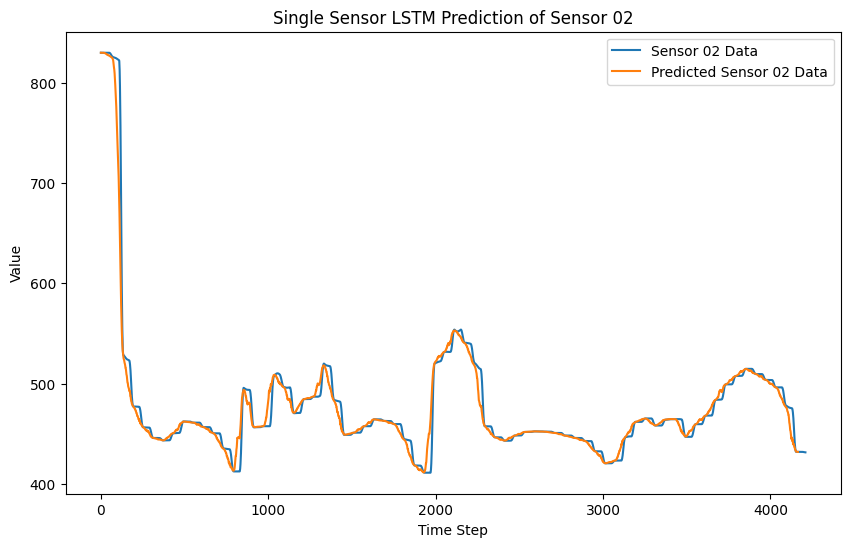

In [99]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

class LSTMTimeSeriesPredictor:
    def __init__(self, input_size=1, hidden_size=128, lstm_layers=3, output_size=1, dropout_rate=0.2,
                 batch_size=32, learning_rate=0.001, epochs=30, patience=200):
        """
        Initialize the LSTM time series predictor.

        Args:
            input_size (int, optional): Input size for each time step in the LSTM. Defaults to 1.
            hidden_size (int, optional): Number of units in the hidden state of the LSTM. Defaults to 128.
            lstm_layers (int, optional): Number of LSTM layers stacked on top of each other. Defaults to 3.
            output_size (int, optional): Output size of the LSTM model. Defaults to 1.
            dropout_rate (float, optional): Dropout rate to prevent overfitting. Defaults to 0.2.
            batch_size (int, optional): Batch size for training and evaluation. Defaults to 32.
            learning_rate (float, optional): Learning rate for the optimizer. Defaults to 0.001.
            epochs (int, optional): Number of epochs for training. Defaults to 30.
            patience (int, optional): Number of epochs without improvement before early stopping. Defaults to 200.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm_layers = lstm_layers
        self.output_size = output_size
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience
        self.model = None
        self.scaler = None

    def preprocess_data(self, data, target=None):
        """
        Preprocesses the input data and target.

        Args:
            data (np.ndarray): Input data to be preprocessed.
            target (np.ndarray, optional): Target data to be preprocessed. Defaults to None.

        Returns:
            tuple: Preprocessed input data, preprocessed target data (if target is not None), and scaler object.
        """
        scaler = MinMaxScaler(feature_range=(-1, 1))
        data_normalized = scaler.fit_transform(data.reshape(-1, 1)).reshape(data.shape)
        
        if target is not None:
            target_normalized = scaler.transform(target.reshape(-1, 1)).flatten()
            return data_normalized, target_normalized, scaler
        else:
            return data_normalized, scaler

    def train_model(self, train_data, train_target, val_data, val_target):
        """
        Trains the LSTM model.

        Args:
            train_data (np.ndarray): Training input data.
            train_target (np.ndarray): Training target data.
            val_data (np.ndarray): Validation input data.
            val_target (np.ndarray): Validation target data.
        """
        # Preprocess data
        train_data_normalized, train_target_normalized, self.scaler = self.preprocess_data(train_data, train_target)
        val_data_normalized, val_target_normalized, _ = self.preprocess_data(val_data, val_target)

        # Convert data to PyTorch Tensor type and adjust the shape of input data
        train_data_tensor = torch.Tensor(train_data_normalized).unsqueeze(-1)
        train_target_tensor = torch.Tensor(train_target_normalized)
        val_data_tensor = torch.Tensor(val_data_normalized).unsqueeze(-1)
        val_target_tensor = torch.Tensor(val_target_normalized)

        # Create data loaders
        train_dataset = TensorDataset(train_data_tensor, train_target_tensor)
        val_dataset = TensorDataset(val_data_tensor, val_target_tensor)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

        # Initialize the model
        self.model = LSTMModel(self.input_size, self.hidden_size, self.lstm_layers,
                               self.output_size, self.dropout_rate)

        # Define loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = Adam(self.model.parameters(), lr=self.learning_rate)

        # Train the model
        self.train_model_loop(self.model, train_loader, val_loader, criterion, optimizer)

    def train_model_loop(self, model, train_loader, val_loader, criterion, optimizer):
        """
        Trains the model in a loop with early stopping.

        Args:
            model (nn.Module): The LSTM model.
            train_loader (DataLoader): DataLoader for training data.
            val_loader (DataLoader): DataLoader for validation data.
            criterion (nn.Module): Loss function.
            optimizer (torch.optim.Optimizer): Optimizer for training.
        """
        best_val_loss = float('inf')
        epochs_without_improvement = 0
        for epoch in range(self.epochs):
            model.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1, 1))
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            model.eval()
            with torch.no_grad():
                val_loss = 0.0
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs, val_labels.view(-1, 1)).item()

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            print(f"Epoch {epoch+1}/{self.epochs}, Training Loss: {running_loss}, Validation Loss: {val_loss}")

            if epochs_without_improvement >= self.patience:
                print("Early stopping triggered!")
                break

    def evaluate_model(self, test_data):
        """
        Evaluates the trained LSTM model on test data.

        Args:
            test_data (np.ndarray): Test input data.

        Returns:
            np.ndarray: Predicted values on the test data.
        """
        with torch.no_grad():
            test_data_normalized, _ = self.preprocess_data(test_data) 
            test_data_tensor = torch.Tensor(test_data_normalized).unsqueeze(-1)
            outputs = self.model(test_data_tensor)

        predictions = self.scaler.inverse_transform(outputs.squeeze().numpy().reshape(-1, 1)).flatten()
        return predictions

    def predict(self, test_data):
        """
        Predicts values for the given test data.

        Args:
            test_data (np.ndarray): Test input data.

        Returns:
            np.ndarray: Predicted values on the test data.
        """
        if self.model is None:
            raise ValueError("Model is not trained yet. Please train the model first.")
        predictions = self.evaluate_model(test_data)
        return predictions



# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, lstm_layers, output_size, dropout_rate):
        """
        Initialize the LSTM model.

        Parameters:
        - input_size: Input size for each time step in the LSTM.
        - hidden_size: Number of units in the hidden state of the LSTM.
        - lstm_layers: Number of LSTM layers stacked on top of each other.
        - output_size: Output size of the LSTM model.
        - dropout_rate: Dropout rate to prevent overfitting.
        """
        super(LSTMModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm_layers = lstm_layers
        self.output_size = output_size
        self.dropout_rate = dropout_rate

        # Define LSTM layer and fully connected layer
        self.lstm = nn.LSTM(input_size, hidden_size, lstm_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        """
        Forward pass of the LSTM model.

        Parameters:
        - x: Input data tensor.

        Returns:
        - out: Output tensor from the LSTM model.
        """
        # Forward pass through LSTM and fully connected layers
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Take only the last output of the sequence
        return out

def visualize_results(self, actual, predicted):
    """
    Visualizes actual vs predicted values.

    Args:
        actual (np.ndarray): Actual values.
        predicted (np.ndarray): Predicted values.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    # Customize plot appearance
    plt.gca().set_facecolor('white')  # Set background color to white
    plt.grid(False)  # Turn off gridlines
    plt.show()
    
# Example usage:
if __name__ == "__main__":

    datas = calibrated_data_2
    datas = datas.astype(float)
    data = datas[:-1].reshape(-1, 1)  # Input data for the LSTM model (time series)
    target = datas[1:].reshape(-1, 1)  # Target data for the LSTM model (time series)
    predictions = []
    window_size = 50
    step_size = int(window_size/10)

    for i in range(0, len(datas) - window_size + 1, step_size):
        window_data = datas[i:i+window_size]
        window_target = datas[i:i+window_size]

        train_size = int(0.8 * len(window_data))
        val_size = int(0.1 * len(window_data))

        train_data, train_target = window_data[:train_size], window_target[:train_size]
        val_data, val_target = window_data[train_size:train_size+val_size], window_target[train_size:train_size+val_size]
        test_data, test_target = window_data[train_size+val_size:], window_target[train_size+val_size:] 
        train_data, train_target = train_data.reshape(-1, 1), train_target.reshape(-1, 1)
        val_data, val_target = val_data.reshape(-1, 1), val_target.reshape(-1, 1)
        test_data, test_target = test_data.reshape(-1, 1), test_target.reshape(-1, 1)
      
        # Initialize and train the predictor
        predictor = LSTMTimeSeriesPredictor()
        predictor.train_model(train_data, train_target, val_data, val_target)
    
        # Evaluate and visualize the results
        predicted_window = predictor.predict(test_data)
        predictions.extend(predicted_window)
    
    smoothed_predictions = detect_and_remove_outliers(np.array(predictions).reshape(1,-1).flatten().astype(float), order=(1,1,1), threshold=1.5, window_size=15)
    plt.figure(figsize=(10, 6))
    plt.plot(datas, label='Sensor 02 Data')
    plt.plot(smoothed_predictions, label='Predicted Sensor 02 Data')
    plt.title('Single Sensor LSTM Prediction of Sensor 02')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [101]:
absolute_errors = np.abs(datas[0:4165] - smoothed_predictions)
mae = np.mean(np.abs(datas[0:4165] - smoothed_predictions))
rmse = np.sqrt(np.mean((datas[0:4165] - smoothed_predictions) ** 2))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 5.482078773218999
RMSE: 13.158358906124183


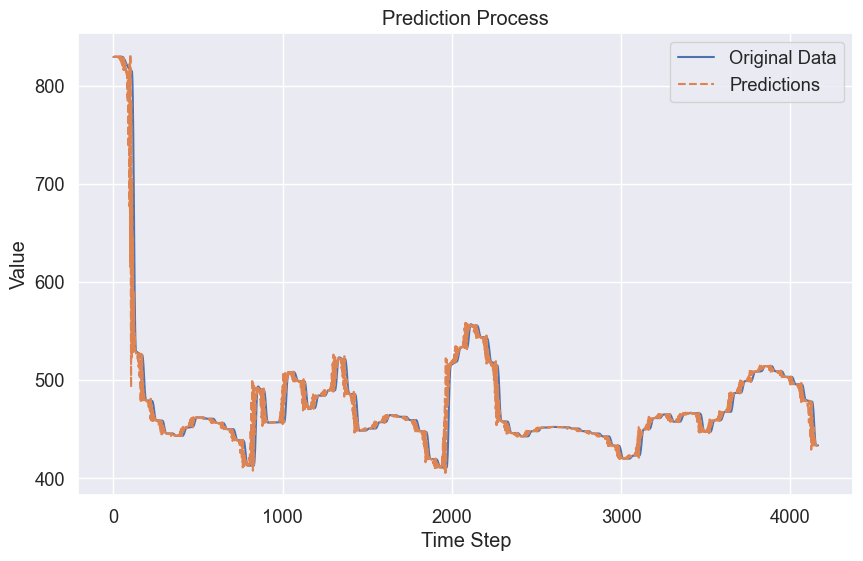

In [1196]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Function to update the plot for each step
def update_plot(i):
    plt.cla()  # Clear the current plot
    plt.plot(actual[0:4165], label='Original Data')
    plt.plot(predictions[:i], label='Predictions', linestyle='--')
    plt.title('Prediction Process')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()

# Create the animation
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update_plot, frames=len(predictions), interval=20)

# If you want to save the animation as a GIF
ani.save('prediction_process.gif', writer='pillow')

# If you want to display the animation in Jupyter Notebook
# HTML(ani.to_html5_video())

plt.show()


## Single sensor LSTM ED

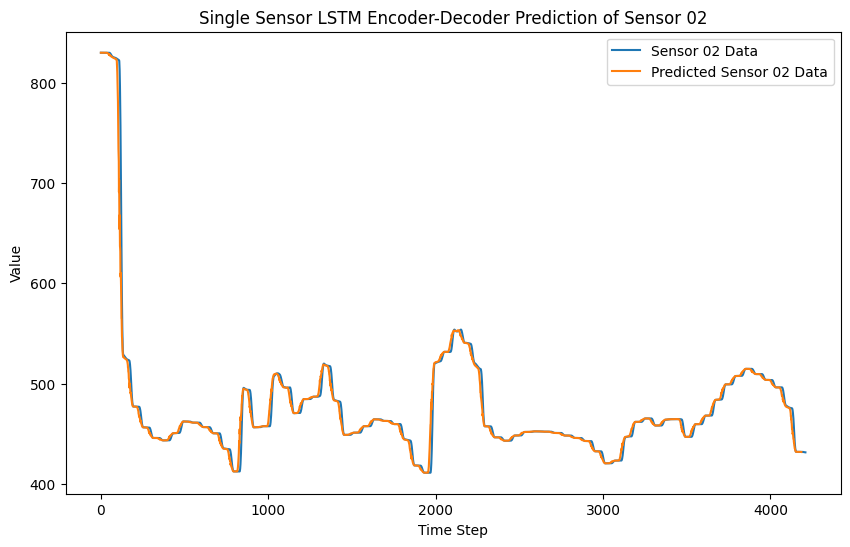

In [102]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Define the Encoder class, which is an LSTM network that processes the input sequence
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate):
        """
        Initialize the Encoder LSTM model.

        Parameters:
        - input_size: Input size for each time step in the LSTM.
        - hidden_size: Number of units in the hidden state of the LSTM.
        - num_layers: Number of LSTM layers stacked on top of each other.
        - dropout_rate: Dropout rate to prevent overfitting.
        """
        super(Encoder, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate,
        )

    def forward(self, x):
        """
        Pass the input sequence through the LSTM and return the hidden and cell states.

        Parameters:
        - x: Input sequence tensor.

        Returns:
        - hidden: Hidden state of the LSTM.
        - cell: Cell state of the LSTM.
        """
        output, (hidden, cell) = self.lstm(x)
        return hidden, cell   

# Define the Decoder class, which is an LSTM network that generates the output sequence
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size, num_layers, dropout_rate):
        """
        Initialize the Decoder LSTM model.

        Parameters:
        - hidden_size: Number of units in the hidden state of the LSTM.
        - output_size: Output size of the LSTM model.
        - num_layers: Number of LSTM layers stacked on top of each other.
        - dropout_rate: Dropout rate to prevent overfitting.
        """
        super(Decoder, self).__init__()
        self.lstm = nn.LSTM(
            input_size=output_size, 
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate,
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden, cell):
        """
        Pass the input sequence, hidden state, and cell state through the LSTM and return the prediction, hidden state, and cell state.

        Parameters:
        - x: Input sequence tensor.
        - hidden: Hidden state of the LSTM.
        - cell: Cell state of the LSTM.

        Returns:
        - prediction: Output sequence prediction.
        - hidden: Hidden state of the LSTM.
        - cell: Cell state of the LSTM.
        """
        output, (hidden, cell) = self.lstm(x, (hidden, cell))
        prediction = self.fc(output)
        return prediction, hidden, cell

# Define the EncoderDecoderLSTM class, which combines the Encoder and Decoder to form the entire network
class EncoderDecoderLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate):
        """
        Initialize the EncoderDecoderLSTM model.

        Parameters:
        - input_size: Input size for each time step in the LSTM.
        - hidden_size: Number of units in the hidden state of the LSTM.
        - output_size: Output size of the LSTM model.
        - num_layers: Number of LSTM layers stacked on top of each other.
        - dropout_rate: Dropout rate to prevent overfitting.
        """
        super(EncoderDecoderLSTM, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, num_layers, dropout_rate)
        self.decoder = Decoder(hidden_size, output_size, num_layers, dropout_rate)

    def forward(self, x, target_len):
        """
        Pass the input sequence and target length through the EncoderDecoderLSTM model.

        Parameters:
        - x: Input sequence tensor.
        - target_len: Length of the output sequence.

        Returns:
        - outputs: Output sequence prediction tensor.
        """
        batch_size = x.size(0)
        hidden, cell = self.encoder(x)
        outputs = torch.zeros(batch_size, target_len, 1).to(x.device)
        decoder_input = torch.zeros(batch_size, 1, 1).to(x.device)
        
        for t in range(target_len):
            output, hidden, cell = self.decoder(decoder_input, hidden, cell)
            outputs[:, t, :] = output.squeeze(-1) 
            decoder_input = output 
        return outputs

# Define the LSTMTimeSeriesPredictor class, which handles data preprocessing, model training, evaluation, and prediction
class LSTMTimeSeriesPredictor:
    def __init__(self, input_size=1, hidden_size=128, lstm_layers=3, output_size=1, dropout_rate=0.2,
                 batch_size=32, learning_rate=0.001, epochs=30, patience=200):
        """
        Initialize the LSTMTimeSeriesPredictor model.

        Parameters:
        - input_size: Input size for each time step in the LSTM.
        - hidden_size: Number of units in the hidden state of the LSTM.
        - lstm_layers: Number of LSTM layers stacked on top of each other.
        - output_size: Output size of the LSTM model.
        - dropout_rate: Dropout rate to prevent overfitting.
        - batch_size: Batch size for training.
        - learning_rate: Learning rate for the optimizer.
        - epochs: Number of training epochs.
        - patience: Number of epochs without improvement before early stopping.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm_layers = lstm_layers
        self.output_size = output_size
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience
        self.model = None
        self.scaler = None

    # Preprocess the data by normalizing it and taking the difference
    def preprocess_data(self, data, target=None):
        """
        Preprocess the data by normalizing it and taking the difference.

        Parameters:
        - data: Input data to be preprocessed.
        - target: Target data to be preprocessed (optional).

        Returns:
        - data_processed: Preprocessed input data.
        - target_processed: Preprocessed target data (if target is provided).
        - scaler: MinMaxScaler used for normalization.
        """
        scaler = MinMaxScaler(feature_range=(-1, 1))
        data_normalized = scaler.fit_transform(data.reshape(-1, 1)).reshape(data.shape)
        data_processed = np.diff(data_normalized, axis=0)

        if target is not None:
            target_normalized = scaler.transform(target.reshape(-1, 1)).reshape(target.shape)
            target_processed = np.diff(target_normalized, axis=0)  
            return data_processed, target_processed, scaler
        else:
            return data_processed, scaler

    # Train the model using the provided training and validation data
    def train_model(self, train_data, train_target, val_data, val_target):
        """
        Train the LSTM model using the provided training and validation data.

        Parameters:
        - train_data: Training input data.
        - train_target: Training target data.
        - val_data: Validation input data.
        - val_target: Validation target data.
        """
        train_data_normalized, train_target_normalized, self.scaler = self.preprocess_data(train_data, train_target)
        val_data_normalized, val_target_normalized, _ = self.preprocess_data(val_data, val_target)

        train_data_tensor = torch.Tensor(train_data_normalized).unsqueeze(-1)
        train_target_tensor = torch.Tensor(train_target_normalized).unsqueeze(-1)
        val_data_tensor = torch.Tensor(val_data_normalized).unsqueeze(-1)
        val_target_tensor = torch.Tensor(val_target_normalized).unsqueeze(-1)

        train_dataset = TensorDataset(train_data_tensor, train_target_tensor)
        val_dataset = TensorDataset(val_data_tensor, val_target_tensor)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

        self.model = EncoderDecoderLSTM(
            input_size=self.input_size, 
            hidden_size=self.hidden_size, 
            output_size=self.output_size, 
            num_layers=self.lstm_layers, 
            dropout_rate=self.dropout_rate
        )

        criterion = nn.MSELoss()
        optimizer = Adam(self.model.parameters(), lr=self.learning_rate)

        best_val_loss = float('inf')
        epochs_without_improvement = 0
        for epoch in range(self.epochs):
            self.model.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs, labels.shape[1]) 
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            self.model.eval()
            with torch.no_grad():
                val_loss = 0.0
                for val_inputs, val_labels in val_loader:
                    val_outputs = self.model(val_inputs, val_labels.shape[1])
                    val_loss += criterion(val_outputs, val_labels).item()

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement >= self.patience:
                print("Early stopping triggered!")
                break

    # Evaluate the model using the provided test data
    def evaluate_model(self, test_data, target_len):
        """
        Evaluate the LSTM model using the provided test data.

        Parameters:
        - test_data: Test input data.
        - target_len: Length of the output sequence.

        Returns:
        - predictions: Output sequence predictions.
        """
        with torch.no_grad():
            test_data_normalized, _ = self.preprocess_data(test_data) 
            test_data_tensor = torch.Tensor(test_data_normalized).unsqueeze(-1)
            outputs = self.model(test_data_tensor, target_len) 

        predictions = self.scaler.inverse_transform(outputs.squeeze().numpy().reshape(-1, 1)).flatten()
        return predictions

    # Predict the future values using the provided test data and target length
    def predict(self, test_data, target_len):
        """
        Predict future values using the provided test data and target length.

        Parameters:
        - test_data: Test input data.
        - target_len: Length of the output sequence.

        Returns:
        - predictions: Output sequence predictions.
        """
        if self.model is None:
            raise ValueError("Model is not trained yet. Please train the model first.")
        predictions = self.evaluate_model(test_data, target_len)
        return predictions

def visualize_results(self, actual, predicted):
    """
    Visualize the actual and predicted values.

    Parameters:
    - actual: Actual values of the time series.
    - predicted: Predicted values of the time series.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    

# Example usage
if __name__ == "__main__":
    # Load the data and select a portion
    data = calibrated_data_2 
    # Convert the data to floats
    data = data.astype(float)

    # Define the window size and target length
    window_size = 20
    target_len = 5

    # Initialize an empty list to store the predictions
    predictions = []
    
    # Iterate over the data with a sliding window
    for i in range(window_size, len(data)-target_len+1):        
        # Extract the window data
        window_data = data[i-window_size:i].reshape(-1, 1)

        # Split the window data into training and validation sets
        train_size = int(0.8 * len(window_data))
        train_data, train_target = window_data[:train_size], window_data[1:train_size+1]
        val_data, val_target = window_data[train_size:-1], window_data[train_size+1:]

        # Create an instance of the LSTMTimeSeriesPredictor
        predictor = LSTMTimeSeriesPredictor(lstm_layers=2, hidden_size=64, dropout_rate=0.3)  # Adjust hyperparameters
        # Train the model using the training and validation data
        predictor.train_model(train_data, train_target, val_data, val_target)

        # Extract the test data
        test_data = data[i:i+target_len].reshape(-1, 1)
        # Predict the future values using the test data and target length
        predicted_window = predictor.predict(test_data, target_len)
        
        # Append the last predicted value to the predictions list
        predictions.append(predicted_window[-1])

   # Visualize the actual and predicted values
    actual = calibrated_data_2
    predicted = predictions 
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Sensor 02 Data')
    plt.plot(predicted, label='Predicted Sensor 02 Data')
    plt.title('Single Sensor LSTM Encoder-Decoder Prediction of Sensor 02')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()



In [103]:
absolute_errors = np.abs(actual[0:4186] - predicted)
mae = np.mean(np.abs(actual[0:4186] - predicted))
rmse = np.sqrt(np.mean((actual[0:4186] - predicted) ** 2))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 3.0176557643120163
RMSE: 10.39727461666103


## Multi sensor LSTM ED

topological relationship

Sensor Sensor 1 neighbors: ['Sensor 2', 'Sensor 4']
Sensor Sensor 2 neighbors: ['Sensor 1']
Sensor Sensor 4 neighbors: ['Sensor 1', 'Sensor 3']
Sensor Sensor 3 neighbors: ['Sensor 4']


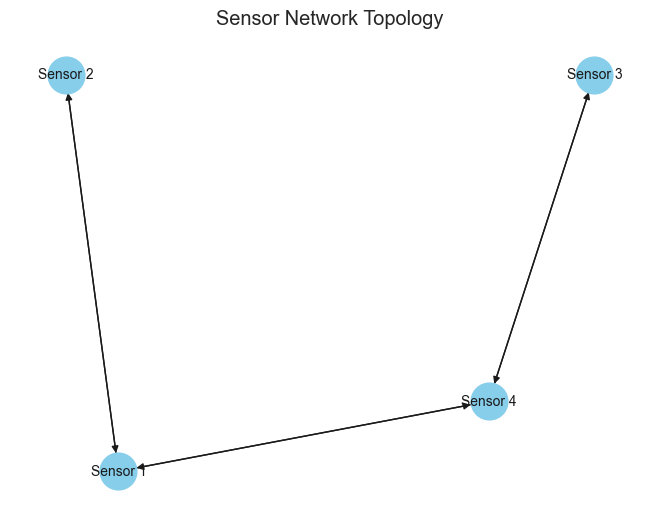

In [116]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Assume known sensor coordinates and gas concentration data
sensor_data = {
    'Sensor 1': {'coords': [0, 9], 'gas_concentration': np.array(calibrated_data_1)},
    'Sensor 2': {'coords': [-2, 26], 'gas_concentration': np.array(calibrated_data_2)},
    'Sensor 3': {'coords': [18, 26], 'gas_concentration': np.array(calibrated_data_3[0:4210])},
    'Sensor 4': {'coords': [14, 12], 'gas_concentration': np.array(calibrated_data_4[0:4210])}
}

# Define distance threshold and correlation coefficient threshold
distance_threshold = 18
correlation_threshold = 0.3  # Using correlation coefficient threshold, adjust according to your actual scenario

# Build directed graph
graph = nx.DiGraph()
for sensor1, data1 in sensor_data.items():
    graph.add_node(sensor1, pos=tuple(data1['coords']))  # Note: passing tuple as coordinates
    for sensor2, data2 in sensor_data.items():
        if sensor1 != sensor2:
            # Calculate Euclidean distance
            distance = np.sqrt((data1['coords'][0] - data2['coords'][0]) ** 2 + (data1['coords'][1] - data2['coords'][1]) ** 2)
            # Calculate correlation coefficient of gas concentration data
            correlation_coef = np.abs(pearsonr(data1['gas_concentration'], data2['gas_concentration'])[0])
            # Add edge if distance is less than threshold and correlation coefficient satisfies threshold
            if distance < distance_threshold and correlation_coef > correlation_threshold:
                graph.add_edge(sensor1, sensor2)

# Print neighbors of each sensor
for sensor in graph.nodes:
    neighbors = list(graph.neighbors(sensor))
    if len(neighbors) == 0:
        print(f"Sensor {sensor} has no neighboring sensors")
    else:
        print(f"Sensor {sensor} neighbors: {neighbors}")

# Draw sensor network topology
pos = nx.get_node_attributes(graph, 'pos')  # Get node positions
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
plt.title('Sensor Network Topology')
plt.show()


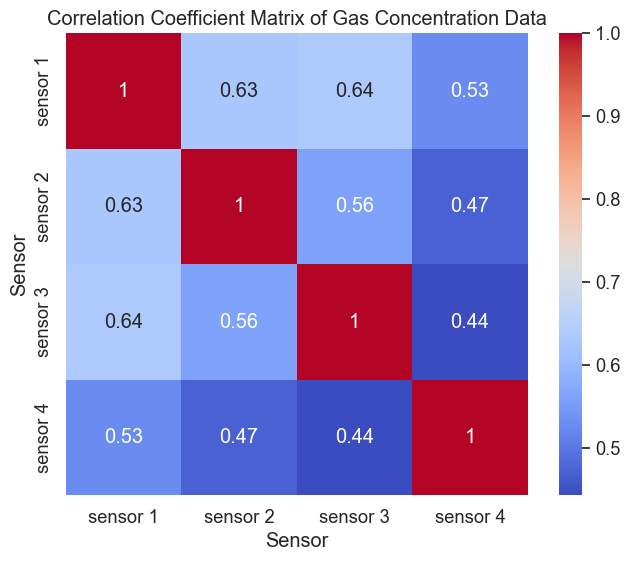

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assume known sensor coordinates and gas concentration data
sensor_data = {
    'sensor 1': {'coords': [0, 9], 'gas_concentration': np.array(calibrated_data_1)},
    'sensor 2': {'coords': [-2, 26], 'gas_concentration': np.array(calibrated_data_2)},
    'sensor 3': {'coords': [18, 26], 'gas_concentration': np.array(calibrated_data_3[0:4210])},
    'sensor 4': {'coords': [14, 12], 'gas_concentration': np.array(calibrated_data_4[0:4210])}
}

# Calculate correlation coefficients for each pair of sensors
num_sensors = len(sensor_data)
correlation_matrix = np.zeros((num_sensors, num_sensors))

sensor_names = list(sensor_data.keys())
for i in range(num_sensors):
    for j in range(num_sensors):
        if i != j:
            sensor1 = sensor_names[i]
            sensor2 = sensor_names[j]
            gas_conc1 = sensor_data[sensor1]['gas_concentration']
            gas_conc2 = sensor_data[sensor2]['gas_concentration']
            correlation_coef = pearsonr(gas_conc1, gas_conc2)[0]
            correlation_matrix[i, j] = abs(correlation_coef)

# Set diagonal elements to 1, as the correlation of a sensor with itself is always 1
np.fill_diagonal(correlation_matrix, 1)

# Plot the correlation coefficient matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, xticklabels=sensor_names, yticklabels=sensor_names, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Coefficient Matrix of Gas Concentration Data')
plt.xlabel('Sensor')
plt.ylabel('Sensor')
plt.show()


C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:183: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)



Epoch [1/100], Loss: 0.0168
Epoch [2/100], Loss: 0.0068
Epoch [3/100], Loss: 0.0038
Epoch [4/100], Loss: 0.0041
Epoch [5/100], Loss: 0.0018
Epoch [6/100], Loss: 0.0164
Epoch [7/100], Loss: 0.0040
Epoch [8/100], Loss: 0.0048
Epoch [9/100], Loss: 0.0023
Epoch [10/100], Loss: 0.0039
Epoch [11/100], Loss: 0.0037
Epoch [12/100], Loss: 0.0187
Epoch [13/100], Loss: 0.0036
Epoch [14/100], Loss: 0.0099
Epoch [15/100], Loss: 0.0126
Epoch [16/100], Loss: 0.0091
Epoch [17/100], Loss: 0.0042
Epoch [18/100], Loss: 0.0058
Epoch [19/100], Loss: 0.0025
Epoch [20/100], Loss: 0.0138
Epoch [21/100], Loss: 0.0113
Epoch [22/100], Loss: 0.0030
Epoch [23/100], Loss: 0.0105
Epoch [24/100], Loss: 0.0048
Epoch [25/100], Loss: 0.0087
Epoch [26/100], Loss: 0.0063
Epoch [27/100], Loss: 0.0030
Epoch [28/100], Loss: 0.0030
Epoch [29/100], Loss: 0.0026
Epoch [30/100], Loss: 0.0030
Epoch [31/100], Loss: 0.0029
Epoch [32/100], Loss: 0.0096
Epoch [33/100], Loss: 0.0050
Epoch [34/100], Loss: 0.0132
Epoch [35/100], Loss: 0

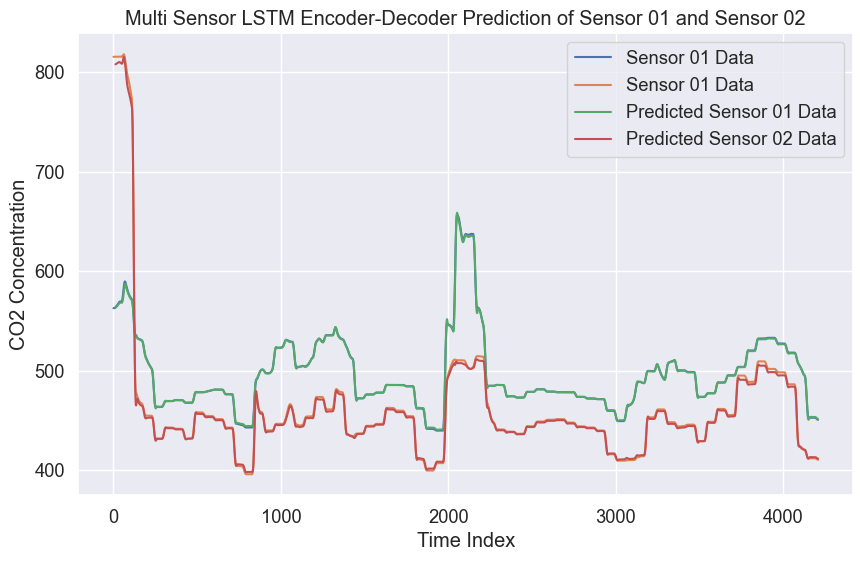

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Function to generate noisy sine wave data
def generate_noisy_data(data_1, data_2):
    """
    Generate noisy sine wave data and normalize it.

    Args:
    - data_1 (numpy array): First cleaned data array.
    - data_2 (numpy array): Second cleaned data array.

    Returns:
    - normalized_data (numpy array): Normalized data.
    - data_min (numpy array): Minimum values used for normalization.
    - data_range (numpy array): Range of values used for normalization.
    """
    # Select a portion of data and add noise (if needed)
    data1 = data_1
    data2 = data_2

    # Combine data and normalize
    data = np.stack((data1, data2), axis=1)
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    data_range = data_max - data_min
    normalized_data = (data - data_min) / data_range

    return normalized_data, data_min, data_range

# Class for Seq2Seq Model
class Seq2Seq(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        """
        Initialize Seq2Seq model.

        Args:
        - input_size (int): Dimensionality of input sequences.
        - hidden_size (int): Dimensionality of hidden state of LSTM cells.
        - output_size (int): Dimensionality of output sequences.
        - num_layers (int): Number of layers in LSTM.

        """
        super(Seq2Seq, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, num_layers)
        self.decoder = Decoder(hidden_size, output_size, num_layers)

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        """
        Forward pass of the Seq2Seq model.

        Args:
        - src (tensor): Input sequences.
        - trg (tensor): Target sequences for training.
        - teacher_forcing_ratio (float): Probability of using teacher forcing.

        Returns:
        - outputs (tensor): Predicted sequences.
        """
        batch_size = src.size(0)
        trg_len = trg.size(1)
        trg_vocab_size = trg.size(2)

        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(src.device)
        hn, cn = self.encoder(src)

        input = trg[:, 0, :]
        for t in range(1, trg_len):
            output, hn, cn = self.decoder(input.unsqueeze(1), hn, cn)
            outputs[:, t, :] = output.squeeze(1)
            teacher_force = np.random.random() < teacher_forcing_ratio
            input = trg[:, t, :] if teacher_force else output.squeeze(1)

        return outputs

# Class for Encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        """
        Initialize Encoder.

        Args:
        - input_size (int): Dimensionality of input sequences.
        - hidden_size (int): Dimensionality of hidden state of LSTM cells.
        - num_layers (int): Number of layers in LSTM.
        """
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        """
        Forward pass of the Encoder.

        Args:
        - x (tensor): Input sequence.

        Returns:
        - hn (tensor): Hidden state of the last layer.
        - cn (tensor): Cell state of the last layer.
        """
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        return hn, cn

# Class for Decoder
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size, num_layers):
        """
        Initialize Decoder.

        Args:
        - hidden_size (int): Dimensionality of hidden state of LSTM cells.
        - output_size (int): Dimensionality of output sequences.
        - num_layers (int): Number of layers in LSTM.
        """
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(output_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hn, cn):
        """
        Forward pass of the Decoder.

        Args:
        - x (tensor): Input sequence.
        - hn (tensor): Hidden state of the last layer from Encoder.
        - cn (tensor): Cell state of the last layer from Encoder.

        Returns:
        - out (tensor): Output sequence.
        - hn (tensor): Hidden state of the last layer.
        - cn (tensor): Cell state of the last layer.
        """
        out, (hn, cn) = self.lstm(x, (hn, cn))
        out = self.fc(out)
        return out, hn, cn

# Function to denormalize data
def denormalize_data(normalized_data, data_min, data_range):
    """
    Denormalize normalized data.

    Args:
    - normalized_data (numpy array or tensor): Normalized data to be denormalized.
    - data_min (numpy array): Minimum values used for normalization.
    - data_range (numpy array): Range of values used for normalization.

    Returns:
    - denormalized_data (numpy array or tensor): Denormalized data.
    """
    return normalized_data * data_range + data_min

# Function to prepare data tensors
def prepare_data(normalized_data, sequence_length):
    """
    Prepare input sequences and target sequences.

    Args:
    - normalized_data (numpy array or tensor): Normalized data to create sequences.
    - sequence_length (int): Length of each input sequence and corresponding target sequence.

    Returns:
    - X (tensor): Input sequences.
    - y (tensor): Target sequences.
    """
    X = []
    y = []

    # Create sequences and their corresponding labels
    for i in range(len(normalized_data) - sequence_length):
        X.append(normalized_data[i:i + sequence_length])
        y.append(normalized_data[i + 1:i + sequence_length + 1])

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    return X, y

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    """
    Train the Seq2Seq model.

    Args:
    - model (nn.Module): Seq2Seq model to be trained.
    - train_loader (DataLoader): DataLoader for training data.
    - criterion (torch.nn loss): Loss function for training.
    - optimizer (torch.optim): Optimizer for training.
    - num_epochs (int): Number of epochs for training.
    """
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            output = model(X_batch, y_batch)
            loss = criterion(output, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Function to make predictions
def make_predictions(model, X, y, data_min, data_range):
    """
    Make predictions using trained Seq2Seq model.

    Args:
    - model (nn.Module): Trained Seq2Seq model for making predictions.
    - X (tensor): Input sequences for prediction.
    - y (tensor): Target sequences for prediction (not used in predictions).
    - data_min (numpy array): Minimum values used for normalization.
    - data_range (numpy array): Range of values used for normalization.

    Returns:
    - denormalized_predictions (numpy array): Denormalized predicted sequences.
    """
    model.eval()
    predictions = []
    with torch.no_grad():
        for i in range(len(X)):
            X_test = X[i:i+1]
            y_test = y[i:i+1]
            output = model(X_test, y_test, teacher_forcing_ratio=0.0)
            predictions.append(output.squeeze(0)[-1].cpu().numpy())
    predictions = np.array(predictions)
    denormalized_predictions = denormalize_data(predictions, data_min, data_range)
    return denormalized_predictions

# Function to visualize predictions
def visualize_predictions(data1, data2, predicted_data):
    """
    Visualize true data and predicted data.

    Args:
    - data1 (numpy array or list): True data for the first sequence.
    - data2 (numpy array or list): True data for the second sequence.
    - predicted_data (numpy array or list): Predicted data to be visualized.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data1, label='Sensor 01 Data')
    plt.plot(data2, label='Sensor 01 Data')
    plt.plot(range(sequence_length, sequence_length + len(predicted_data)), predicted_data[:, 0], label='Predicted Sensor 01 Data')
    plt.plot(range(sequence_length, sequence_length + len(predicted_data)), predicted_data[:, 1], label='Predicted Sensor 02 Data')
    plt.title('Multi Sensor LSTM Encoder-Decoder Prediction of Sensor 01 and Sensor 02')
    plt.xlabel('Time Index')
    plt.ylabel('CO2 Concentration')
    plt.legend()
    plt.show()

# Example usage (main function)
if __name__ == "__main__":
   
    # Generate and normalize data
    normalized_data, data_min, data_range = generate_noisy_data(calibrated_data_1, calibrated_data_2)

    # Prepare data tensors
    sequence_length = 12
    X, y = prepare_data(normalized_data, sequence_length)

    # Create DataLoader
    train_loader = DataLoader(TensorDataset(X, y), batch_size=32, shuffle=True)

    # Model parameters
    input_size = 2
    hidden_size = 64
    output_size = 2
    num_layers = 2
    learning_rate = 0.001
    num_epochs = 100

    # Instantiate model, loss function, and optimizer
    model = Seq2Seq(input_size, hidden_size, output_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Make predictions
    predictions = make_predictions(model, X, y, data_min, data_range)

    # Visualize predictions
    visualize_predictions(calibrated_data_1, calibrated_data_2, predictions)
   

In [118]:
predicted_1 = predictions[:, 0]
predicted_2 = predictions[:, 1]
mae = np.mean(np.abs(calibrated_data_2[12:4210] - predicted_2))
rmse = np.sqrt(np.mean((calibrated_data_2[12:4210] - predicted_2) ** 2))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1.6436946954954563
RMSE: 2.1915241347913605


## GPR

## Spacial fusion

In [1044]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import imageio
import os

predicted_all = np.array([calibrated_data_1[0:500], calibrated_data_2[0:500], calibrated_data_3[0:500], calibrated_data_4[0:500]])
data_all = predicted_all

def create_gif(image_folder, gif_name):
    images = []
    for file_name in sorted(os.listdir(image_folder)):
        if file_name.endswith('.png'):
            file_path = os.path.join(image_folder, file_name)
            images.append(imageio.imread(file_path))
    gif_path = os.path.join(image_folder, gif_name)
    imageio.mimsave(gif_path, images, duration=0.5)
    return gif_path

# Create a directory to save images
image_folder_3d = 'gpr_frames_3d'
image_folder_cont = 'gpr_frames_cont'
os.makedirs(image_folder_3d, exist_ok=True)
os.makedirs(image_folder_cont, exist_ok=True)

# Lists to store best kernel parameters for each group
best_kernel_params = []

# Training input
x_train = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

# Create and save plots for each group of 12 data points
for i in range(0, len(data_all[0, :]), 12):
    if i + 12 > len(data_all[0, :]):
        break

    y_train = data_all[:, i:i+4]
    y_valid = data_all[:, i+4:i+8]
    y_test = data_all[:, i+8:i+12]

    # Optimize RBF kernel parameter for current group
    best_mse = float('inf')
    best_kernel_param = None
    for length_scale in np.linspace(5, 6.5, 30):
        kernel = RBF(length_scale=[length_scale]*2, length_scale_bounds='fixed')
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
        gp.fit(x_train, y_train)
        y_pred = gp.predict(x_train)
        mse = mean_squared_error(y_valid, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_kernel_param = length_scale

    # Record the best kernel parameter
    best_kernel_params.append(best_kernel_param)

    # Train the final GPR model with the best kernel parameter
    y_train_1 = np.array([y_train[0, 0], y_train[0, 1], y_train[0, 2], y_train[0, 3]])
    kernel = RBF(length_scale=[best_kernel_param]*2, length_scale_bounds='fixed')
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(x_train, y_train_1)

    # Test grid for visualization
    x1, x2 = np.meshgrid(np.linspace(-18, 32, 100), np.linspace(0, 35, 100))
    X_test = np.c_[x1.ravel(), x2.ravel()]

    # Predict over the grid
    y_pred_grid, sigma = gp.predict(X_test, return_std=True)

    # 3D figure
    fig_3d = plt.figure(figsize=(10, 8), dpi=100)  # Set size and resolution
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    ax_3d.plot_surface(x1, x2, y_pred_grid.reshape(100, 100), cmap='jet', edgecolor='k')
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('CO2 concentration (ppm)')
    ax_3d.set_title(f'3D figure of the CO2 concentration (Group {i//12 + 1})')
    plt.savefig(f'{image_folder_3d}/3d_plot_{i//12 + 1}.png', bbox_inches='tight')
    plt.close(fig_3d)

    # Contour figure
    fig_cont = plt.figure(figsize=(8, 6), dpi=100)  # Set size and resolution
    axs_cont = fig_cont.add_subplot()
    contour_plot = axs_cont.contourf(x1, x2, y_pred_grid.reshape(100, 100), cmap='jet', alpha=0.5, antialiased=True)
    axs_cont.scatter(x_train[:, 0], x_train[:, 1], c=y_train_1, cmap='jet', marker='o', edgecolor='r')
    axs_cont.set_title('Contour figure of the CO2 concentration on the whole map')
    fig_cont.colorbar(contour_plot, ax=axs_cont, label='CO2 concentration (ppm)')
    plt.savefig(f'{image_folder_cont}/contour_plot_{i//12 + 1}.png', bbox_inches='tight')
    plt.close(fig_cont)

# Create gif from saved images
gif_file_3d = create_gif(image_folder_3d, 'gpr_animation_3d.gif')
print(f"Created 3D GIF: {gif_file_3d}")

gif_file_cont = create_gif(image_folder_cont, 'gpr_animation_contour.gif')
print(f"Created Contour GIF: {gif_file_cont}")


C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



Created 3D GIF: gpr_frames_3d\gpr_animation_3d.gif
Created Contour GIF: gpr_frames_cont\gpr_animation_contour.gif


In [1045]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import imageio
import os
from scipy.ndimage import gaussian_filter
from skimage.transform import resize

# Sample data (assuming predicted_1 to predicted_4 are defined somewhere)
predicted_all = np.array([calibrated_data_1[0:500], calibrated_data_2[0:500], calibrated_data_3[0:500], calibrated_data_4[0:500]])
data_all = predicted_all

def create_gif(image_folder, gif_name):
    images = []
    for file_name in sorted(os.listdir(image_folder)):
        if file_name.endswith('.png'):
            file_path = os.path.join(image_folder, file_name)
            img = imageio.imread(file_path)
            if len(images) > 0:
                if img.shape != images[0].shape:
                    print(f"Skipping image {file_name} due to shape mismatch.")
                    continue
            images.append(img)
    gif_path = os.path.join(image_folder, gif_name)
    imageio.mimsave(gif_path, images, duration=0.5)
    return gif_path

def resize_images(image_folder):
    first_image = None
    for file_name in sorted(os.listdir(image_folder)):
        if file_name.endswith('.png'):
            file_path = os.path.join(image_folder, file_name)
            img = imageio.imread(file_path)
            if first_image is None:
                first_image = img
            else:
                if img.shape != first_image.shape:
                    img_resized = resize(img, first_image.shape, anti_aliasing=True)
                    imageio.imwrite(file_path, (img_resized * 255).astype(np.uint8))

# Create directories to save images
image_folder_3d = 'gpr_frames_3d'
image_folder_cont = 'gpr_frames_cont'
os.makedirs(image_folder_3d, exist_ok=True)
os.makedirs(image_folder_cont, exist_ok=True)

# Training input
x_train = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

# Loop through the sequence
for i in range(30, len(data_all[0]) - 12, 4):
    y_train = data_all[:, i:i+4]
    y_valid = data_all[:, i+4:i+8]
    y_test = data_all[:, i+8:i+12]

    # Optimize RBF kernel parameters for current group
    best_mse = float('inf')
    best_kernel_params = None
    for length_scale_1 in np.linspace(4, 7, 20):
        for length_scale_2 in np.linspace(4, 7, 20):
            kernel = RBF(length_scale=[length_scale_1, length_scale_2], length_scale_bounds='fixed')
            gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
            gp.fit(x_train, y_train)
            y_pred = gp.predict(x_train)
            mse = mean_squared_error(y_valid, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_kernel_params = (length_scale_1, length_scale_2)
                print(best_kernel_params)

    # Train the final GPR model with the best kernel parameters
    y_train_1 = np.array([y_train[0, 0], y_train[0, 1], y_train[0, 2], y_train[0, 3]])
    kernel = RBF(length_scale=best_kernel_params, length_scale_bounds='fixed')
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(x_train, y_train_1)

    # Define the testing grid
    x1, x2 = np.meshgrid(np.linspace(-18, 32, 100), np.linspace(0, 35, 100))
    X_test = np.c_[x1.ravel(), x2.ravel()]

    # Predict over the entire grid
    y_pred_grid, sigma = gp.predict(X_test, return_std=True)

    # Stitch predictions from smaller 2x2 grids
    grid_size = 2
    x1_values = np.linspace(-18, 32, 100)
    x2_values = np.linspace(0, 35, 100)
    full_prediction = np.zeros((100, 100))

    for i in range(0, 100, grid_size):
        for j in range(0, 100, grid_size):
            x1_subset = x1_values[i:i + grid_size]
            x2_subset = x2_values[j:j + grid_size]
            x1_grid, x2_grid = np.meshgrid(x1_subset, x2_subset)
            X_subset = np.c_[x1_grid.ravel(), x2_grid.ravel()]
            y_subset_pred, _ = gp.predict(X_subset, return_std=True)
            full_prediction[i:i + grid_size, j:j + grid_size] = y_subset_pred.reshape(grid_size, grid_size)
    
    smoothed_prediction = gaussian_filter(full_prediction, sigma=1)

    # Plot the full prediction map as a 3D surface
    fig_3d = plt.figure(figsize=(10, 8))
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    ax_3d.plot_surface(x1, x2, smoothed_prediction, cmap='jet', edgecolor='k')
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('CO2 concentration (ppm)')
    ax_3d.set_zlim(0, 600)
    plt.savefig(os.path.join(image_folder_3d, f'frame_{i}.png'), dpi=300)
    plt.close(fig_3d)

    # Plot the full prediction map as a contour plot
    fig_cont = plt.figure(figsize=(10, 8))
    plt.contourf(x1, x2, smoothed_prediction, cmap='jet')
    plt.colorbar(label='CO2 concentration (ppm)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(os.path.join(image_folder_cont, f'frame_{i}.png'), dpi=300)
    plt.close(fig_cont)

# Resize images to ensure all have the same dimensions
resize_images(image_folder_3d)
resize_images(image_folder_cont)

# Create GIFs from saved images
gif_path_3d = create_gif(image_folder_3d, 'gpr_3d.gif')
gif_path_cont = create_gif(image_folder_cont, 'gpr_contour.gif')

print(f'3D GIF saved at: {gif_path_3d}')
print(f'Contour GIF saved at: {gif_path_cont}')


(4.0, 4.0)
(4.0, 4.157894736842105)
(4.0, 4.315789473684211)
(4.0, 4.473684210526316)
(4.0, 4.631578947368421)
(4.0, 4.7894736842105265)
(4.0, 4.947368421052632)
(4.0, 5.105263157894736)
(4.0, 5.2631578947368425)
(4.0, 5.421052631578947)
(4.0, 5.578947368421053)
(4.0, 5.7368421052631575)
(4.0, 5.894736842105263)
(4.0, 6.052631578947368)
(4.0, 6.2105263157894735)
(4.0, 6.368421052631579)
(4.0, 6.526315789473684)
(4.0, 6.684210526315789)
(4.0, 6.842105263157895)
(4.0, 7.0)
(4.157894736842105, 7.0)
(4.315789473684211, 7.0)
(4.473684210526316, 7.0)
(4.631578947368421, 7.0)
(4.7894736842105265, 7.0)
(4.947368421052632, 7.0)
(5.105263157894736, 7.0)
(5.2631578947368425, 7.0)
(5.421052631578947, 7.0)
(5.578947368421053, 7.0)
(5.7368421052631575, 7.0)
(5.894736842105263, 7.0)
(6.052631578947368, 7.0)
(6.2105263157894735, 7.0)
(6.368421052631579, 7.0)
(6.526315789473684, 7.0)
(6.684210526315789, 7.0)
(6.842105263157895, 7.0)
(7.0, 7.0)
(4.0, 4.0)
(4.0, 4.157894736842105)
(4.0, 4.315789473684211

C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:36: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.

C:\Users\Jike Li\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



3D GIF saved at: gpr_frames_3d\gpr_3d.gif
Contour GIF saved at: gpr_frames_cont\gpr_contour.gif


## Population density

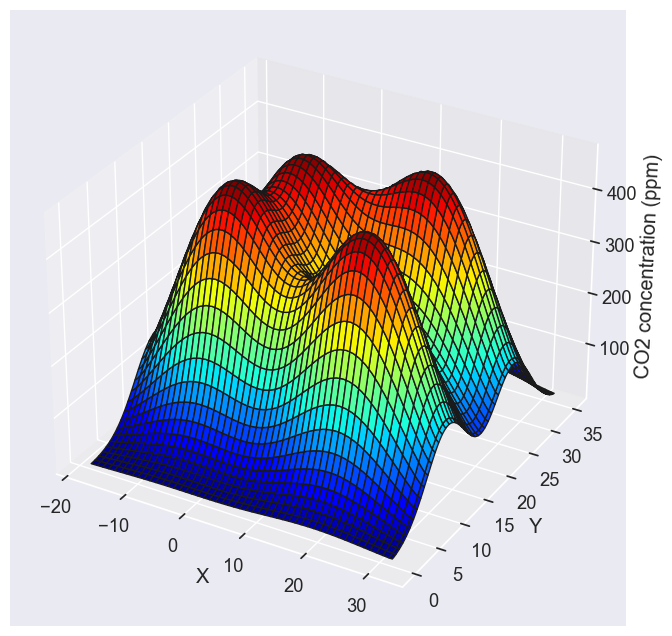

In [1136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import imageio
import os
from scipy.ndimage import gaussian_filter
from skimage.transform import resize

data_all = np.array([calibrated_data_1[0:500], calibrated_data_2[0:500], calibrated_data_3[0:500], calibrated_data_4[0:500]])

# Training input
x_train = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

# Set a fixed value for i
i = 400#200

# y_train, y_valid, y_test for the current i
y_train = data_all[:, i:i+4]
y_valid = data_all[:, i+4:i+8]
y_test = data_all[:, i+8:i+12]

# Optimize RBF kernel parameters for current group
best_mse = float('inf')
best_kernel_params = None
for length_scale_1 in np.linspace(4, 6, 20):
    for length_scale_2 in np.linspace(4, 6, 20):
        kernel = RBF(length_scale=[length_scale_1, length_scale_2], length_scale_bounds='fixed')
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
        gp.fit(x_train, y_train)
        y_pred = gp.predict(x_train)
        mse = mean_squared_error(y_valid, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_kernel_params = (length_scale_1, length_scale_2)

# Train the final GPR model with the best kernel parameters
y_train_1 = np.array([y_train[0, 0], y_train[0, 1], y_train[0, 2], y_train[0, 3]])
kernel = RBF(length_scale=best_kernel_params, length_scale_bounds='fixed')
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(x_train, y_train_1)

# Define the testing grid
x1, x2 = np.meshgrid(np.linspace(-18, 32, 100), np.linspace(0, 35, 100))
X_test = np.c_[x1.ravel(), x2.ravel()]

# Predict over the entire grid
y_pred_grid, sigma = gp.predict(X_test, return_std=True)

# Stitch predictions from smaller 2x2 grids
grid_size = 2
x1_values = np.linspace(-18, 32, 100)
x2_values = np.linspace(0, 35, 100)
full_prediction = np.zeros((100, 100))

for i in range(0, 100, grid_size):
    for j in range(0, 100, grid_size):
        x1_subset = x1_values[i:i + grid_size]
        x2_subset = x2_values[j:j + grid_size]
        x1_grid, x2_grid = np.meshgrid(x1_subset, x2_subset)
        X_subset = np.c_[x1_grid.ravel(), x2_grid.ravel()]
        y_subset_pred, _ = gp.predict(X_subset, return_std=True)
        full_prediction[i:i + grid_size, j:j + grid_size] = y_subset_pred.reshape(grid_size, grid_size)

smoothed_prediction_co2 = gaussian_filter(full_prediction, sigma=1)
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
ax_3d.plot_surface(x1, x2, smoothed_prediction_co2, cmap='jet', edgecolor='k')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('CO2 concentration (ppm)')

plt.show()



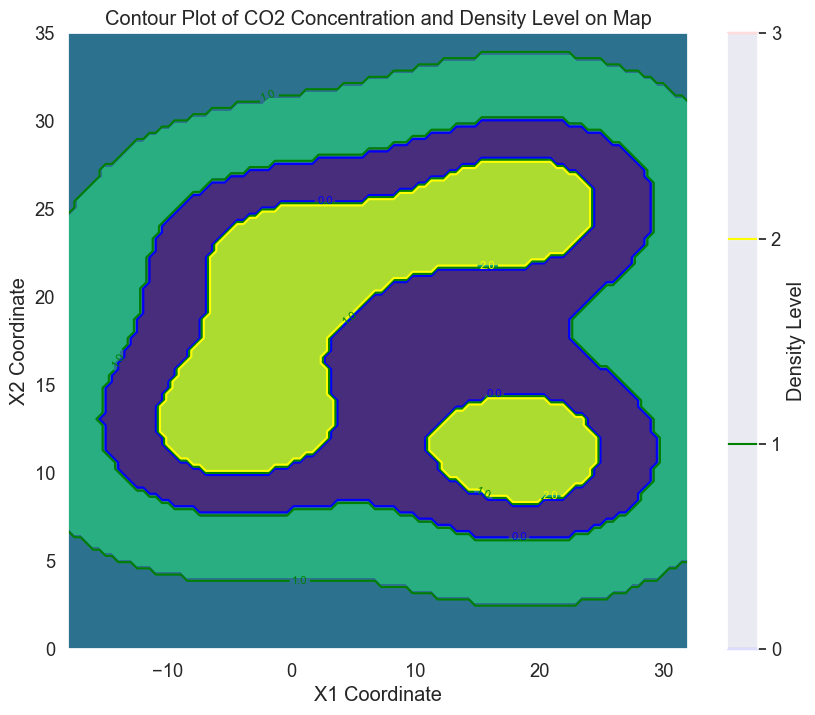

In [1143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define the map range
x1_values = np.linspace(-18, 32, 100)
x2_values = np.linspace(0, 35, 100)

# Generate random CO2 concentration data for the entire map (example)
co2_levels = smoothed_prediction_co2  # Replace with your actual data or smoothed_prediction_co2

# Flatten the CO2 concentration data
co2_levels_flat = co2_levels.flatten().reshape(-1, 1)

# Fit Gaussian Mixture Model (GMM) to the flattened CO2 concentration data
gmm = GaussianMixture(n_components=4, random_state=0)  # Set n_components to 4 for four density levels
gmm.fit(co2_levels_flat)

# Predict density levels (clusters)
density_levels = gmm.predict(co2_levels_flat)

# Reshape predicted density levels back to the map shape
density_map = density_levels.reshape(100, 100)

# Visualize the results using filled contour plot
plt.figure(figsize=(10, 8))

# Create meshgrid for plotting
X1, X2 = np.meshgrid(x1_values, x2_values)

# Plot filled contour plot with CO2 concentration and density levels
plt.contourf(X1, X2, density_map, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], cmap='viridis')

# Define contour levels and colors for better visualization
contour_levels = ['Very Low', 'Low', 'Medium', 'High']
colors = ['blue', 'green', 'yellow', 'red']

# Add contour lines with labels
contour = plt.contour(X1, X2, density_map, levels=[0, 1, 2, 3], colors=colors)
plt.clabel(contour, inline=True, fontsize=8, fmt='%s')

# Add colorbar
plt.colorbar(ticks=[0, 1, 2, 3], label='Density Level', format='%s')

# Add labels and title in English
plt.xlabel('X1 Coordinate')
plt.ylabel('X2 Coordinate')
plt.title('Contour Plot of CO2 Concentration and Density Level on Map')

# Show grid
plt.grid(True)

# Show plot
plt.show()


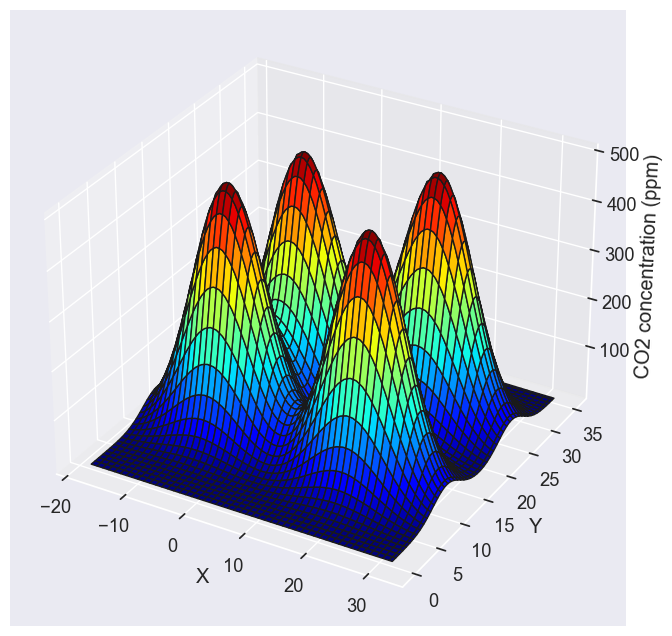

In [1146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import imageio
import os
from scipy.ndimage import gaussian_filter
from skimage.transform import resize

data_all = np.array([calibrated_data_1[0:500], calibrated_data_2[0:500], calibrated_data_3[0:500], calibrated_data_4[0:500]])

# Training input
x_train = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

# Set a fixed value for i
i = 200

# y_train, y_valid, y_test for the current i
y_train = data_all[:, i:i+4]
y_valid = data_all[:, i+4:i+8]
y_test = data_all[:, i+8:i+12]

# Optimize RBF kernel parameters for current group
best_mse = float('inf')
best_kernel_params = None
for length_scale_1 in np.linspace(4, 6, 20):
    for length_scale_2 in np.linspace(4, 6, 20):
        kernel = RBF(length_scale=[length_scale_1, length_scale_2], length_scale_bounds='fixed')
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
        gp.fit(x_train, y_train)
        y_pred = gp.predict(x_train)
        mse = mean_squared_error(y_valid, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_kernel_params = (length_scale_1, length_scale_2)

# Train the final GPR model with the best kernel parameters
y_train_1 = np.array([y_train[0, 0], y_train[0, 1], y_train[0, 2], y_train[0, 3]])
kernel = RBF(length_scale=best_kernel_params, length_scale_bounds='fixed')
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(x_train, y_train_1)

# Define the testing grid
x1, x2 = np.meshgrid(np.linspace(-18, 32, 100), np.linspace(0, 35, 100))
X_test = np.c_[x1.ravel(), x2.ravel()]

# Predict over the entire grid
y_pred_grid, sigma = gp.predict(X_test, return_std=True)

# Stitch predictions from smaller 2x2 grids
grid_size = 2
x1_values = np.linspace(-18, 32, 100)
x2_values = np.linspace(0, 35, 100)
full_prediction = np.zeros((100, 100))

for i in range(0, 100, grid_size):
    for j in range(0, 100, grid_size):
        x1_subset = x1_values[i:i + grid_size]
        x2_subset = x2_values[j:j + grid_size]
        x1_grid, x2_grid = np.meshgrid(x1_subset, x2_subset)
        X_subset = np.c_[x1_grid.ravel(), x2_grid.ravel()]
        y_subset_pred, _ = gp.predict(X_subset, return_std=True)
        full_prediction[i:i + grid_size, j:j + grid_size] = y_subset_pred.reshape(grid_size, grid_size)

smoothed_prediction_co2 = gaussian_filter(full_prediction, sigma=1)
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
ax_3d.plot_surface(x1, x2, smoothed_prediction_co2, cmap='jet', edgecolor='k')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('CO2 concentration (ppm)')

plt.show()



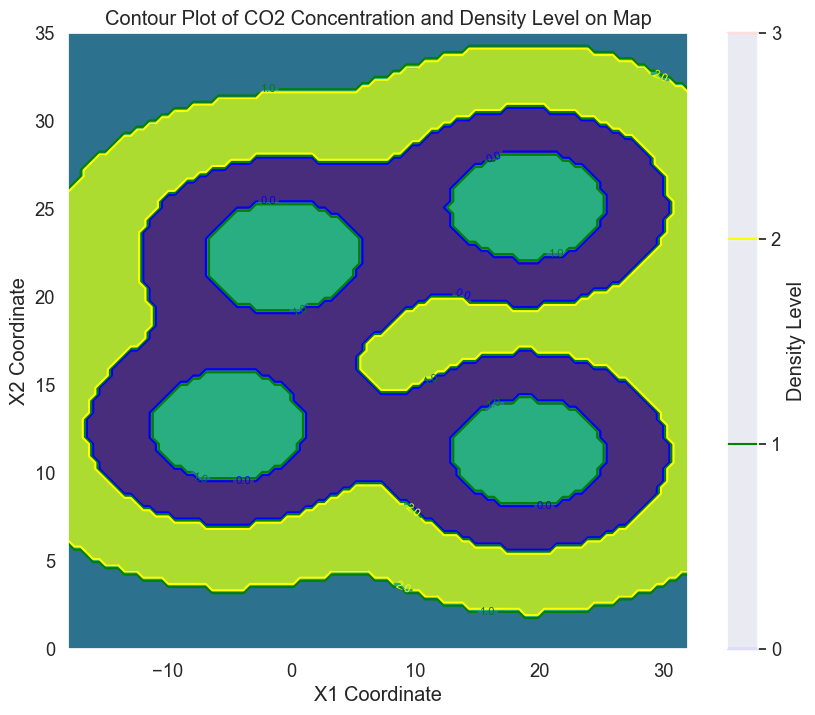

In [1147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define the map range
x1_values = np.linspace(-18, 32, 100)
x2_values = np.linspace(0, 35, 100)

# Generate random CO2 concentration data for the entire map (example)
co2_levels = smoothed_prediction_co2  # Replace with your actual data or smoothed_prediction_co2

# Flatten the CO2 concentration data
co2_levels_flat = co2_levels.flatten().reshape(-1, 1)

# Fit Gaussian Mixture Model (GMM) to the flattened CO2 concentration data
gmm = GaussianMixture(n_components=4, random_state=0)  # Set n_components to 4 for four density levels
gmm.fit(co2_levels_flat)

# Predict density levels (clusters)
density_levels = gmm.predict(co2_levels_flat)

# Reshape predicted density levels back to the map shape
density_map = density_levels.reshape(100, 100)

# Visualize the results using filled contour plot
plt.figure(figsize=(10, 8))

# Create meshgrid for plotting
X1, X2 = np.meshgrid(x1_values, x2_values)

# Plot filled contour plot with CO2 concentration and density levels
plt.contourf(X1, X2, density_map, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], cmap='viridis')

# Define contour levels and colors for better visualization
contour_levels = ['Very Low', 'Low', 'Medium', 'High']
colors = ['blue', 'green', 'yellow', 'red']

# Add contour lines with labels
contour = plt.contour(X1, X2, density_map, levels=[0, 1, 2, 3], colors=colors)
plt.clabel(contour, inline=True, fontsize=8, fmt='%s')

# Add colorbar
plt.colorbar(ticks=[0, 1, 2, 3], label='Density Level', format='%s')

# Add labels and title in English
plt.xlabel('X1 Coordinate')
plt.ylabel('X2 Coordinate')
plt.title('Contour Plot of CO2 Concentration and Density Level on Map')

# Show grid
plt.grid(True)

# Show plot
plt.show()


## Time fusion

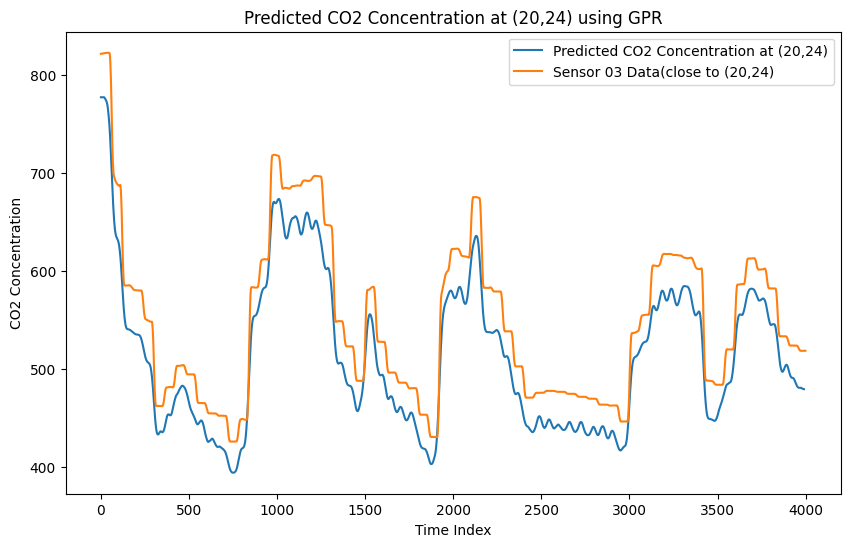

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import imageio
import os

# Sample data (assuming predicted_1 to predicted_4 are defined somewhere)
data_all = np.array([calibrated_data_1[0:4000], calibrated_data_2[0:4000], calibrated_data_3[0:4000], calibrated_data_4[0:4000]])
pred_all = []
# Lists to store best kernel parameters for each group
best_kernel_params = []

# Training input
x_train = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

# Create and save plots for each group of 12 data points
for i in range(0, len(data_all[0, :]), 4):
    if i + 10 > len(data_all[0, :]):
        break

    y_train = data_all[:, i:i+4]
    y_valid = data_all[:, i+4:i+8]
    y_test = data_all[:, i+8:i+12]

    # Optimize RBF kernel parameter for current group
    best_mse = float('inf')
    best_kernel_param = None
    for length_scale in np.linspace(6, 8, 100):
        kernel = RBF(length_scale=[length_scale]*2, length_scale_bounds='fixed')
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
        gp.fit(x_train, y_train)
        y_pred = gp.predict(x_train)
        mse = mean_squared_error(y_valid, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_kernel_param = length_scale
        best_kernel_params.append(best_kernel_param)

    # Train the final GPR model with the best kernel parameter
    y_train_1 = np.array([y_train[0, :], y_train[1, :], y_train[2, :], y_train[3, :]])
    kernel = RBF(length_scale=[best_kernel_param]*2, length_scale_bounds='fixed')
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(x_train, y_train_1)

    # Predict over the grid
    X_test =  np.array([[20, 24]])
    y_pred_grid, sigma = gp.predict(X_test, return_std=True)
    pred_all.append(y_pred_grid)

data =pred_all
merged_data = np.concatenate([arr.flatten() for arr in data])
merged_data = merged_data.astype(float)
order = (1, 1, 3)  # ARIMA model orders
threshold = 1     # Z-score threshold for outlier detection
window_size = 25   # Moving average window size
merged_data = detect_and_remove_outliers(merged_data, order=order, threshold=threshold, window_size=window_size)
merged_data = detect_and_remove_outliers(merged_data, order=order, threshold=threshold, window_size=window_size)

plt.figure(figsize=(10, 6))  
plt.plot(merged_data, linestyle='-',label='Predicted CO2 Concentration at (20,24)')
plt.plot(calibrated_data_3[0:4000],label='Sensor 03 Data(close to (20,24)')
plt.xlabel('Time Index')  
plt.ylabel('CO2 Concentration')  
plt.title('Predicted CO2 Concentration at (20,24) using GPR')  
plt.legend() 
plt.show()


In [32]:
mse

-307553.961422613

In [33]:
mae = np.mean(np.abs(np.array(merged_data) - np.array(calibrated_data_3[0:3992])))

print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Compute the Mean Squared Error
mse = np.mean((np.array(merged_data) - np.array(calibrated_data_3[0:3992]) )** 2)

# Compute the Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 35.0813
Root Mean Squared Error (RMSE): 36.5415


: 

## MA Prediction

Mean Absolute Error (MAE): 5.1018


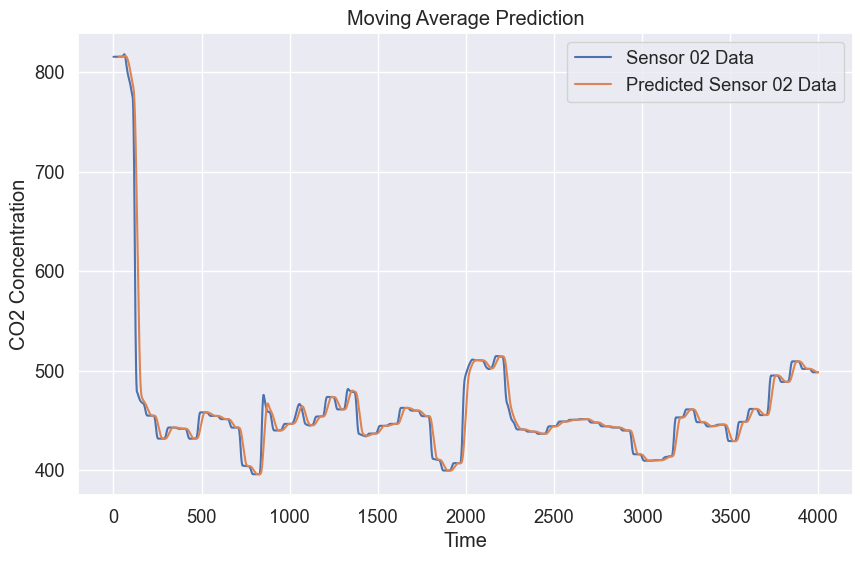

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Assuming you already have the data_cleaned_2 dataset
sin_data = calibrated_data_2[0:4000]

# Initial series and forecast series
original_series = sin_data.copy()
forecast_series = []

# Lists for true values and predicted values
true_values = []
predicted_values = []

# Window size for moving average
window_size = 30

# Sliding window forecasting
for i in range(window_size, len(original_series)):
    window_data = original_series[i-window_size:i]
    
    # Calculate moving average as the forecast value
    forecast = np.mean(window_data)
    forecast_series.append(forecast)
    
    # Record true value and forecasted value
    true_value = original_series[i]
    true_values.append(true_value)
    predicted_values.append(forecast)
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_values, predicted_values)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize original data and moving average forecast results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sin_data)), sin_data, label='Sensor 02 Data')
plt.plot(np.arange(window_size, len(sin_data)), forecast_series, label='Predicted Sensor 02 Data')
plt.title('Moving Average Prediction')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


In [127]:
y_true = true_values
y_pred = predicted_values
r2 = r2_score(y_true, y_pred)

print(f"R^2 Score: {r2}")

NameError: name 'r2_score' is not defined

## Lasso 

MSE: 147.6509
MAE: 4.4646


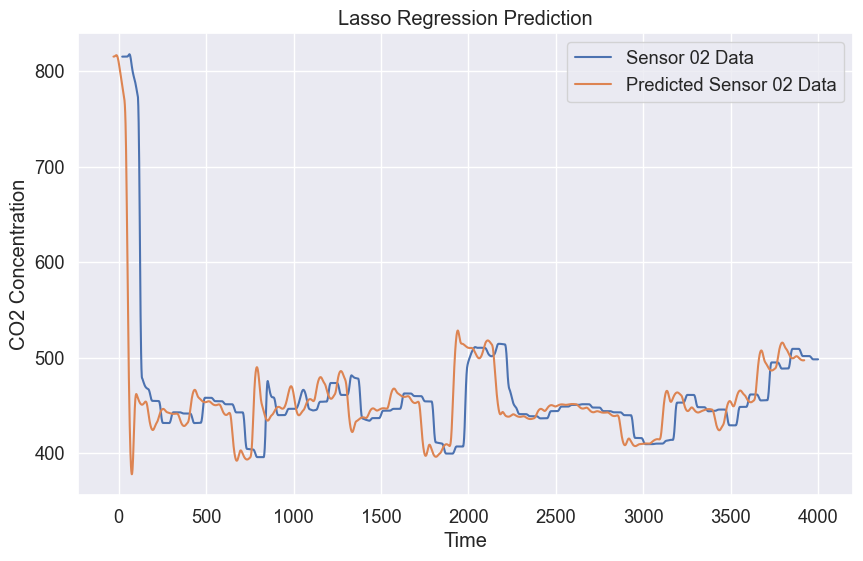

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming you already have the data_cleaned_2 dataset
sin_data = calibrated_data_2[0:4000]

# Initial series and forecast series
original_series = sin_data.copy()
forecast_series = []

# Lists for true values and predicted values
true_values = []
predicted_values = []

# Sliding window size and step
window_size = 50
step = 1

# Sliding window forecasting
for i in range(0, len(original_series) - window_size + 1, step):
    window_data = original_series[i:i+window_size]
    
    # Prepare features (X) and target (y)
    X = np.arange(len(window_data)).reshape(-1, 1)  # Time steps as features
    y = window_data.copy()  # Data in current window as target
    
    # Create and fit Lasso regression model
    model = Lasso(alpha=0.1)  # Adjustable alpha parameter
    model.fit(X, y)
    
    # Predict the value at the next time step
    next_time_step = len(window_data)  # Index of the next time step
    forecast = model.predict([[next_time_step]])[0]
    forecast_series.append(forecast)
    
    # Record true value and predicted value
    if i + window_size >= 21:  # Start recording true and predicted values from the 21st data point
        true_value = original_series[i + window_size]  # True value at the next time step
        true_values.append(true_value)
        predicted_values.append(forecast)
    
    # Append the forecasted value to the original series for the next window prediction
    original_series = np.append(original_series, forecast)

# Ensure true_values and predicted_values have the same length
if len(true_values) != len(predicted_values):
    raise ValueError("Lengths of true_values and predicted_values do not match.")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_values, predicted_values)
print(f"MSE: {mse:.4f}")
mae = np.mean(abs(np.array(true_values)-np.array(predicted_values)))
print(f"MAE: {mae:.4f}")

# Visualize original data and sliding window forecast results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(20, len(sin_data)), sin_data[20:], label='Sensor 02 Data')
plt.plot(np.arange(20 - window_size, 20 - window_size + len(forecast_series)), forecast_series, label='Predicted Sensor 02 Data')
plt.title('Lasso Regression Prediction')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [1082]:
y_true = true_values
y_pred = predicted_values
r2 = r2_score(y_true, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.9827370652986317


##  Kalman Filter Estimate(Multi-sensor)

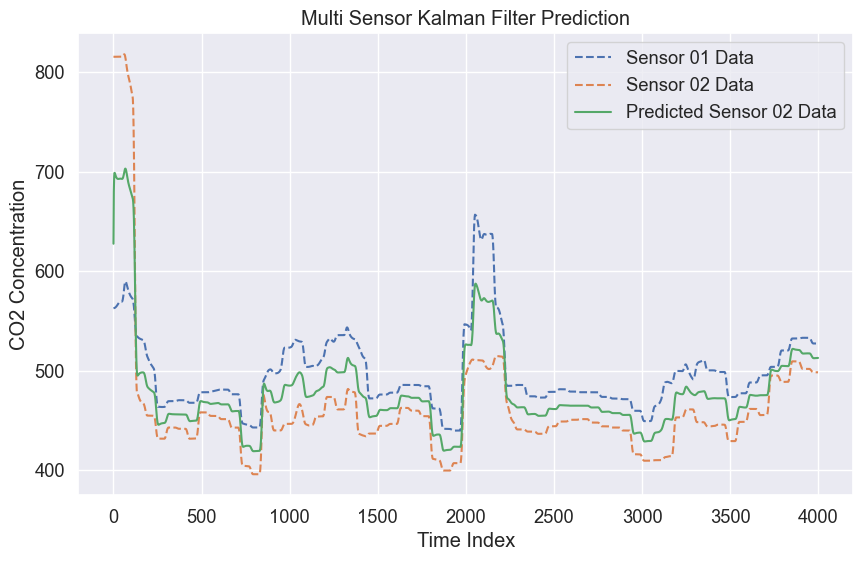

Mean Absolute Error (MAE) for Kalman Filter Estimate: 24.6376


In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Kalman Filter class
class KalmanFilter:
    def __init__(self, A, B, H, Q, R, P, x):
        # Initialize Kalman Filter parameters
        self.A = A  # State transition matrix
        self.B = B  # Control input matrix
        self.H = H  # Observation matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Observation noise covariance matrix
        self.P = P  # State estimation error covariance matrix
        self.x = x  # Initial state estimate

    def predict(self, u=np.array([[0]])):
        # Predict the next state and update the covariance matrix
        self.x = self.A @ self.x + self.B @ u
        self.P = self.A @ self.P @ self.A.T + self.Q
        return self.x

    def update(self, z):
        # Update the state estimate and covariance matrix based on the measurement
        y = z - self.H @ self.x  # Calculate the measurement residual
        S = self.H @ self.P @ self.H.T + self.R  # Calculate the innovation covariance
        K = self.P @ self.H.T @ np.linalg.inv(S)  # Calculate the Kalman gain
        self.x = self.x + K @ y  # Update the state estimate
        I = np.eye(self.P.shape[0])  # Identity matrix
        self.P = (I - K @ self.H) @ self.P  # Update the state estimation error covariance
        return self.x

# Define the system parameters
dt = 0.1  # Time step
A = np.array([[1, dt], [0, 1]])  # State transition matrix: assumes constant velocity model
B = np.array([[0.5*dt**2], [dt]])  # Control input matrix: assumes constant acceleration
H = np.array([[1, 0]])  # Observation matrix: only observing position
Q = np.array([[0.01, 0], [0, 0.01]])  # Process noise covariance matrix: adjust based on process noise
R = np.array([[0.1]])  # Observation noise covariance matrix: adjust based on sensor noise
P = np.eye(2)  # Initial state estimation error covariance matrix
x = np.array([[0], [0]])  # Initial state estimate: [position, velocity]

# Create a Kalman Filter object with the defined parameters
kf = KalmanFilter(A, B, H, Q, R, P, x)

# Load sensor data (replace with your actual data)
num_steps = 4000
sensor1_measurements = calibrated_data_1[0:4000]
sensor2_measurements = calibrated_data_2[0:4000]

# Perform state estimation and data fusion using the Kalman Filter
estimated_positions = []
for t in range(num_steps):
    # Use measurements from both sensors for the update step
    z = np.array([[sensor1_measurements[t] + sensor2_measurements[t]]]) / 2  # Simple average fusion
    kf.predict()  # Predict the next state
    estimated_position = kf.update(z)  # Update based on the fused measurement
    estimated_positions.append(estimated_position[0, 0])  # Store the estimated position

# Calculate the Mean Absolute Error (MAE) for the first 12 time steps
mae = np.mean(np.abs(estimated_positions[:12] - sensor1_measurements[:12]))
# Adjust the estimated positions based on the calculated MAE
estimated = estimated_positions - mae 

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), sensor1_measurements, label='Sensor 01 Data', linestyle='dashed')
plt.plot(range(num_steps), sensor2_measurements, label='Sensor 02 Data', linestyle='dashed')
plt.plot(range(num_steps), estimated_positions, label='Predicted Sensor 02 Data')
plt.xlabel('Time Index')
plt.ylabel('CO2 Concentration')
plt.title('Multi Sensor Kalman Filter Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Print the overall MAE of the Kalman Filter estimate
print(f"Mean Absolute Error (MAE) for Kalman Filter Estimate: {np.mean(np.abs(estimated_positions - sensor1_measurements)):.4f}")

In [241]:
y_true = sensor1_measurements
y_pred = estimated_positions
r2 = r2_score(y_true, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.7686163284543422


## Weighted Average Fusion

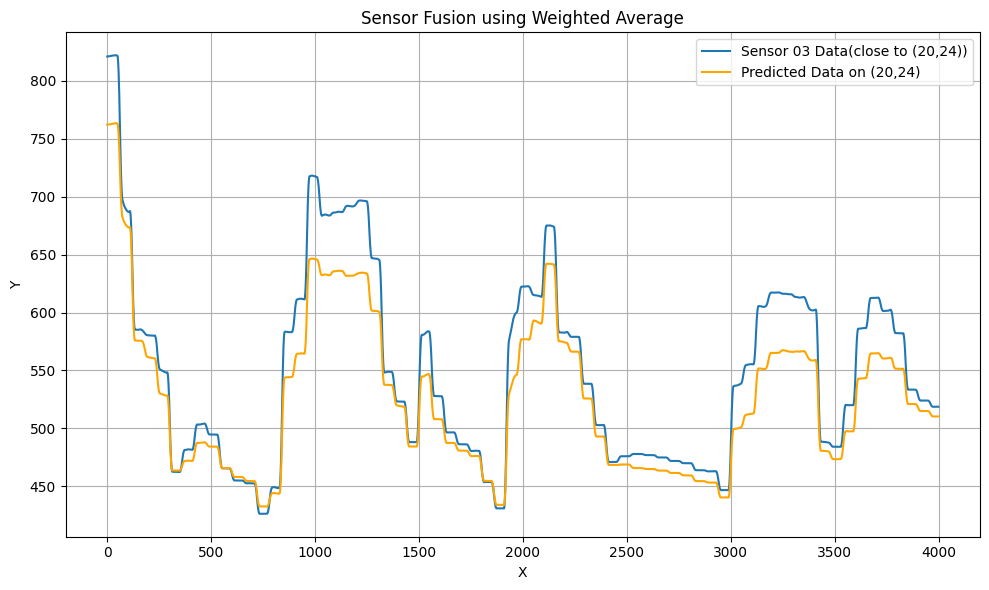

Mean Absolute Error (MAE) for weighted average: 23.1452
Root Mean Squared Error (RMSE): 30.1923


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Sensor coordinates
sensor_coords = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

# Sensor predicted data (example data, assuming each sensor has a data vector of length 20)
predicted_data_1 = calibrated_data_1[0:4000] 
predicted_data_2 = calibrated_data_2[0:4000]
predicted_data_3 = calibrated_data_3[0:4000]
predicted_data_4 = calibrated_data_4[0:4000]

# Stack predicted data into a matrix
predicted_data_matrix = np.vstack((predicted_data_1, predicted_data_2, predicted_data_3, predicted_data_4))

# Target coordinate to predict
target_coord = np.array([20, 24])

# Calculate distances between each sensor and the target coordinate
distances = np.linalg.norm(sensor_coords - target_coord, axis=1)

# Calculate weights (simple inverse distance weights)
weights = 1 / distances

# Normalize weights to sum up to 1
weights /= np.sum(weights)

# Perform weighted average to predict target data
predicted_target_data = np.dot(weights, predicted_data_matrix)

# Visualization
plt.figure(figsize=(10, 6))

# Plot one of the predicted sensor data (just as an example)
plt.plot(predicted_data_3, label='Sensor 03 Data(close to (20,24))')  # Change label and data accordingly

# Plot the predicted target data using weighted average
plt.plot(predicted_target_data, linestyle='-', color='orange', label='Predicted Data on (20,24)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sensor Fusion using Weighted Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Mean Absolute Error (MAE) for the weighted average prediction
mae = np.mean(np.abs(predicted_target_data - predicted_data_3))
print(f"Mean Absolute Error (MAE) for weighted average: {mae:.4f}")
# Compute the Mean Squared Error
mse = np.mean((predicted_target_data - predicted_data_3) ** 2)

# Compute the Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


In [247]:
y_true = predicted_data_3
y_pred = predicted_target_data
r2 = r2_score(y_true, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.6995535737349895


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


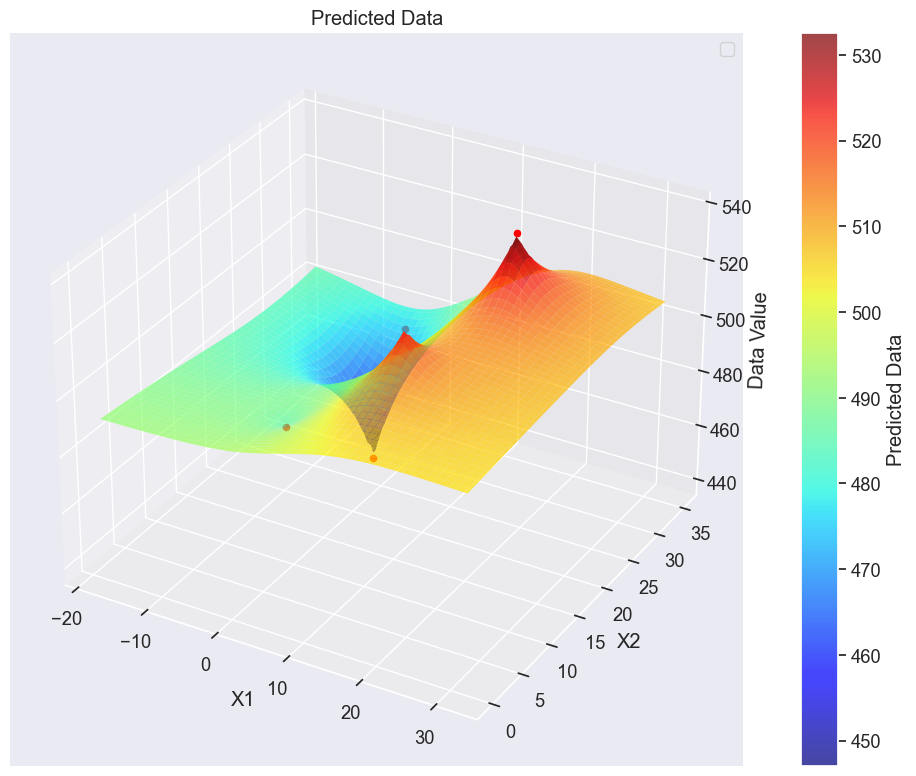

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define sensor coordinates
sensor_coords = np.array([[0, 9], [-2, 26], [18, 26], [14, 12]])

predicted_data_1 = calibrated_data_1[2300] 
predicted_data_2 = calibrated_data_2[2300] 
predicted_data_3 = calibrated_data_3[2300] 
predicted_data_4 = calibrated_data_4[2300]

# Stack predicted data into an array
predicted_data_array = np.array([predicted_data_1, predicted_data_2, predicted_data_3, predicted_data_4])

# Define grid range
x1_values = np.linspace(-18, 32, 100)
x2_values = np.linspace(0, 35, 100)

# Create mesh grid
X1, X2 = np.meshgrid(x1_values, x2_values)

# Prepare to store predictions
predictions = np.zeros((len(x2_values), len(x1_values)))

# Calculate predictions for each point in the grid
for i in range(len(x1_values)):
    for j in range(len(x2_values)):
        target_coord = np.array([x1_values[i], x2_values[j]])
        
        # Calculate distances between each sensor and the target coordinate
        distances = np.linalg.norm(sensor_coords - target_coord, axis=1)
        
        # Calculate weights (simple inverse distance weights)
        weights = 1 / distances
        
        # Normalize weights to sum up to 1
        weights /= np.sum(weights)
        
        # Perform weighted average to predict target data
        predicted_target_data = np.dot(weights, predicted_data_array)
        
        # Store prediction
        predictions[j, i] = predicted_target_data

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax_3d = fig.add_subplot(111, projection='3d')

# Plot the surface of predicted data
surf = ax_3d.plot_surface(X1, X2, predictions, cmap='jet', edgecolor='none', alpha=0.7)

# Plot sensor data points
for sensor_idx, sensor_value in enumerate(predicted_data_array):
    ax_3d.scatter(sensor_coords[sensor_idx, 0], sensor_coords[sensor_idx, 1], sensor_value, color='red')

# Customize labels and appearance
fig.colorbar(surf, ax=ax_3d, label='Predicted Data')
ax_3d.set_xlabel('X1')
ax_3d.set_ylabel('X2')
ax_3d.set_zlabel('Data Value')
ax_3d.set_title('Predicted Data')
ax_3d.legend()
ax_3d.grid(True)
plt.tight_layout()
plt.show()
